In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import seaborn as sns
import numpy as np
# importing required libraries for normalizing data
from sklearn.preprocessing import StandardScaler,LabelBinarizer,MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
# representation of model layers
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import joblib
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB

2025-05-05 02:22:18.744736: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746411739.020688      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746411739.105803      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **ĐỌC DỮ LIỆU 34 NHÃN**

📌 Nhãn Mirai-greeth_flood: Thêm 5,042 dòng, tổng cộng 5,042 dòng
📌 Nhãn DDoS-TCP_Flood: Thêm 23,044 dòng, tổng cộng 23,044 dòng
📌 Nhãn DDoS-RSTFINFlood: Thêm 20,625 dòng, tổng cộng 20,625 dòng
📌 Nhãn DDoS-UDP_Flood: Thêm 27,807 dòng, tổng cộng 27,807 dòng
📌 Nhãn DDoS-ICMP_Flood: Thêm 37,281 dòng, tổng cộng 37,281 dòng
📌 Nhãn DDoS-ACK_Fragmentation: Thêm 1,468 dòng, tổng cộng 1,468 dòng
📌 Nhãn DDoS-SynonymousIP_Flood: Thêm 18,637 dòng, tổng cộng 18,637 dòng
📌 Nhãn DDoS-PSHACK_Flood: Thêm 21,226 dòng, tổng cộng 21,226 dòng
📌 Nhãn Mirai-udpplain: Thêm 4,643 dòng, tổng cộng 4,643 dòng
📌 Nhãn DDoS-SYN_Flood: Thêm 20,806 dòng, tổng cộng 20,806 dòng
📌 Nhãn MITM-ArpSpoofing: Thêm 1,603 dòng, tổng cộng 1,603 dòng
📌 Nhãn BenignTraffic: Thêm 5,645 dòng, tổng cộng 5,645 dòng
📌 Nhãn Mirai-greip_flood: Thêm 3,666 dòng, tổng cộng 3,666 dòng
📌 Nhãn DoS-UDP_Flood: Thêm 16,779 dòng, tổng cộng 16,779 dòng
📌 Nhãn DNS_Spoofing: Thêm 969 dòng, tổng cộng 969 dòng
📌 Nhãn DoS-TCP_Flood: Thêm 13,715 dòng, tổng 

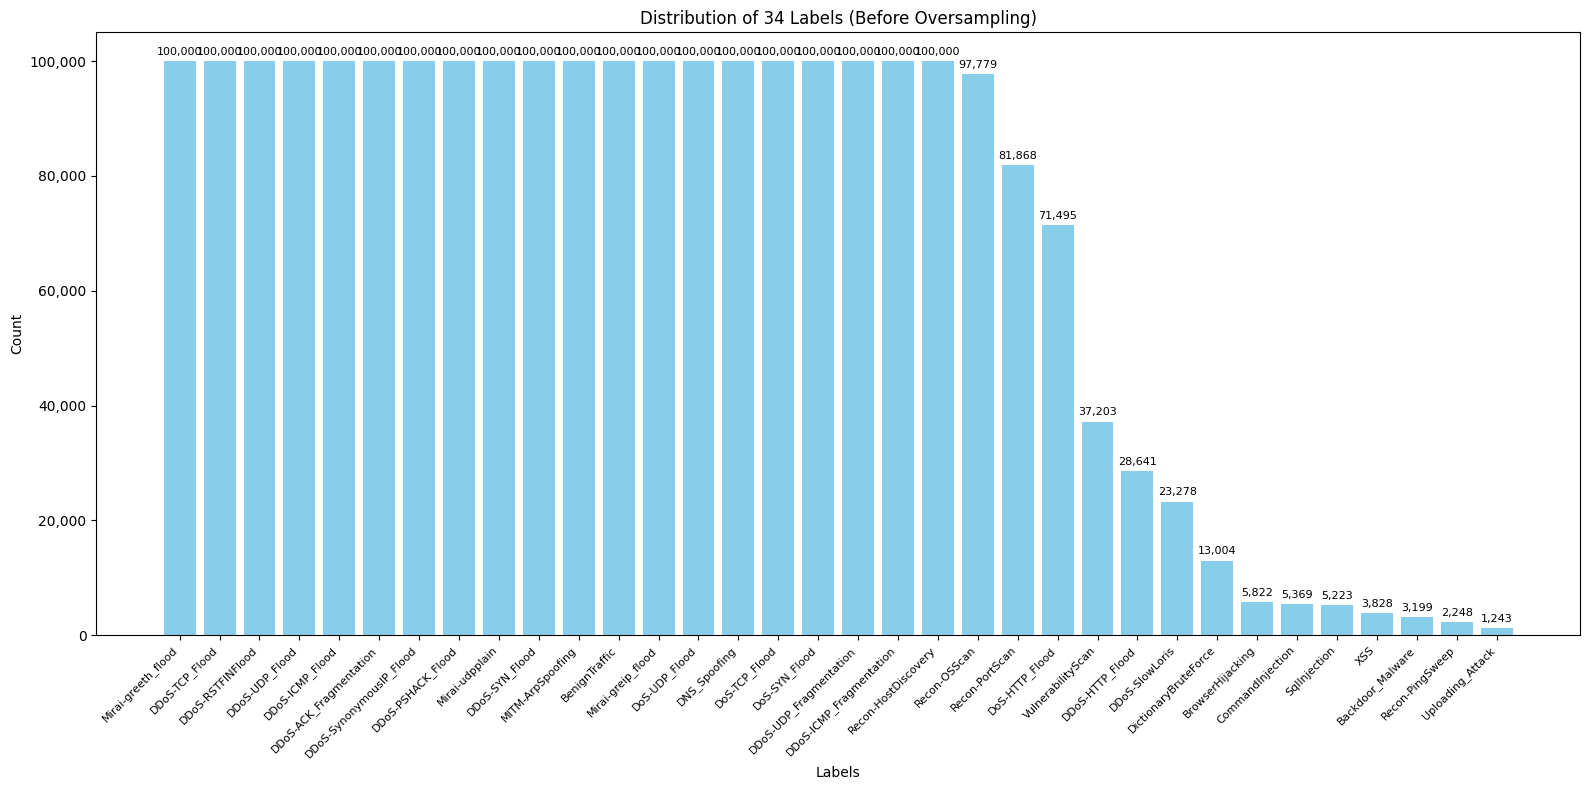

📌 Nhãn Mirai-greeth_flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-TCP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-RSTFINFlood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-UDP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-ICMP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-ACK_Fragmentation: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-SynonymousIP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-PSHACK_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn Mirai-udpplain: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-SYN_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn MITM-ArpSpoofing: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn BenignTraffic: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn Mirai-greip_flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DoS-UDP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DNS_Spoofing: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DoS-TCP_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DoS-SYN_Flood: Đã có 100,000 dòng, giữ nguyên
📌 Nhãn DDoS-UDP_Fragmentation: Đã có 100,000 dòng, giữ n

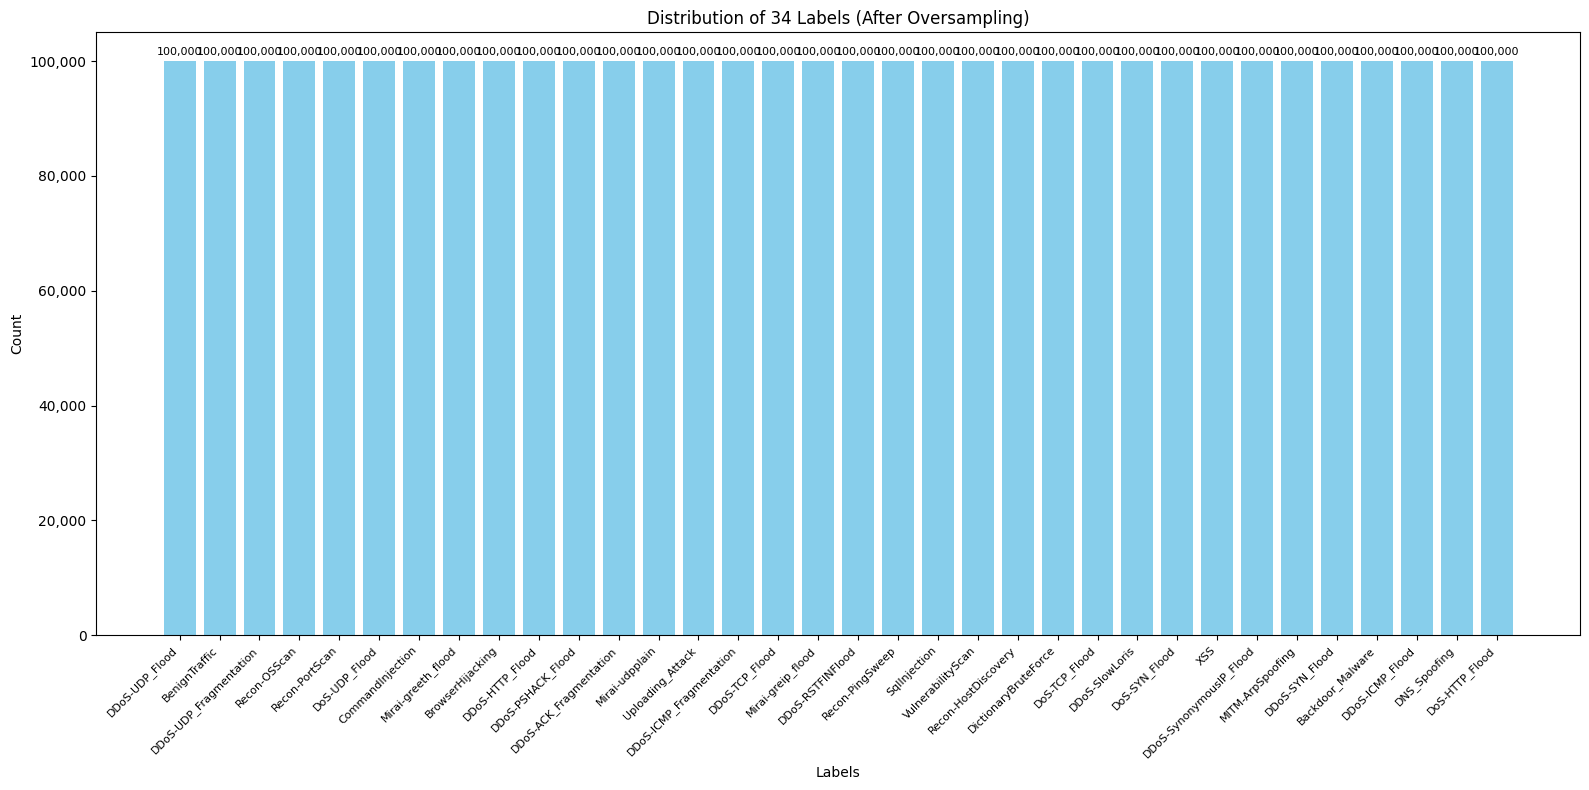

In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import cudf  # Dùng cuDF để xử lý dữ liệu nhanh hơn trên GPU
import numpy as np
from sklearn.utils import resample

# Định nghĩa thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Danh sách 34 nhãn gốc từ CICIoT2023
labels = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Khởi tạo dictionary để theo dõi số dòng của từng nhãn
label_counts = {label: 0 for label in labels}

# Giới hạn tối đa và tối thiểu 200,000 dòng cho mỗi nhãn
MAX_ROWS_PER_LABEL = 100_000
MIN_ROWS_PER_LABEL = 100_000

# Hàm đọc file và lọc dữ liệu
def read_file(filename, index):
    try:
        # Đọc file CSV bằng cuDF
        df = cudf.read_csv(filename)
        
        # Kiểm tra cột 'label'
        if 'label' not in df.columns:
            print(f"❌ File {filename}: Không tìm thấy cột 'label'!")
            return None
        
        # Lọc dữ liệu dựa trên giới hạn 200K cho mỗi nhãn
        valid_rows = []
        unique_labels = df['label'].unique().to_pandas().tolist()
        for label in unique_labels:
            if label not in labels:
                continue  # Bỏ qua nhãn không thuộc danh sách 34 nhãn
            
            current_count = label_counts.get(label, 0)
            remaining_quota = MAX_ROWS_PER_LABEL - current_count
            
            if remaining_quota <= 0:
                print(f"⚠ Nhãn {label} đã đủ {MAX_ROWS_PER_LABEL:,} dòng, không đọc thêm!")
                continue
            
            # Lấy các dòng thuộc nhãn này
            label_df = df[df['label'] == label]
            rows_to_take = min(len(label_df), remaining_quota)
            
            if rows_to_take > 0:
                valid_rows.append(label_df[:rows_to_take])
                label_counts[label] = current_count + rows_to_take
                print(f"📌 Nhãn {label}: Thêm {rows_to_take:,} dòng, tổng cộng {label_counts[label]:,} dòng")
        
        # Gộp các dòng hợp lệ
        if valid_rows:
            df_filtered = cudf.concat(valid_rows, ignore_index=True)
            print(f"📌 File {index}: Giữ {df_filtered.shape[0]:,} dòng sau khi lọc giới hạn")
            return df_filtered
        else:
            print(f"⚠ File {index}: Không có dữ liệu nào được giữ lại!")
            return None
    except Exception as e:
        print(f"❌ Lỗi khi đọc file {filename}: {e}")
        return None

# Đọc dữ liệu từ thư mục
data_dir = "/kaggle/input/cic-iot-2023/"
file_list = glob.glob(f"{data_dir}*.csv")[:168]  # Lấy tối đa 134 file

# Đọc tuần tự từng file
dfs = []
for idx, fname in enumerate(file_list):
    df = read_file(fname, idx)
    if df is not None:
        dfs.append(df)

# Nối dữ liệu và xử lý cân bằng
if dfs:
    df_full = cudf.concat(dfs, ignore_index=True)
    print(f"✅ Dữ liệu đã được nối! Kích thước: {df_full.shape}")
    print(f"📋 Nhãn duy nhất: {df_full['label'].unique().to_pandas().tolist()}")
    
    # Chuyển sang pandas để xử lý oversampling
    df_pandas = df_full.to_pandas()
    
    # Kiểm tra phân bố nhãn trước khi cân bằng
    print("\n📋 Phân bố nhãn trước khi cân bằng:")
    label_distribution = df_pandas["label"].value_counts()
    print(label_distribution)
    
    # Vẽ biểu đồ phân bố nhãn trước khi cân bằng
    fig, ax = plt.subplots(figsize=(16, 8))
    bars = ax.bar(label_distribution.index, label_distribution.values, color='skyblue')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax.set_xlabel('Labels')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of 34 Labels (Before Oversampling)')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/label_distribution_before_oversampling_34labels.png')
    plt.show()
    
    # Chuẩn bị dữ liệu cho oversampling
    balanced_dfs = []
    unique_labels = df_pandas['label'].unique()
    
    # Áp dụng oversampling thủ công cho mỗi nhãn
    for label in unique_labels:
        if label not in labels:
            continue
        label_df = df_pandas[df_pandas['label'] == label]
        current_count = len(label_df)
        
        if current_count < MIN_ROWS_PER_LABEL:
            # Oversampling bằng resample
            oversampled_df = resample(
                label_df,
                replace=True,  # Cho phép sao chép mẫu
                n_samples=MIN_ROWS_PER_LABEL,  # Đạt 200K
                random_state=42
            )
            print(f"📌 Oversampling nhãn {label}: Từ {current_count:,} lên {MIN_ROWS_PER_LABEL:,} dòng")
            balanced_dfs.append(oversampled_df)
        else:
            print(f"📌 Nhãn {label}: Đã có {current_count:,} dòng, giữ nguyên")
            balanced_dfs.append(label_df)
    
    # Gộp dữ liệu đã cân bằng
    df_balanced = pd.concat(balanced_dfs, ignore_index=True)
    
    # Chuyển lại thành cuDF để đồng bộ
    df_full = cudf.from_pandas(df_balanced)
    
    # Kiểm tra phân bố nhãn sau khi cân bằng
    print("\n📋 Phân bố nhãn sau khi cân bằng bằng oversampling:")
    balanced_label_distribution = df_full["label"].value_counts().to_pandas()
    print(balanced_label_distribution)
    
    # Vẽ biểu đồ phân bố nhãn sau khi cân bằng
    fig, ax = plt.subplots(figsize=(16, 8))
    bars = ax.bar(balanced_label_distribution.index, balanced_label_distribution.values, color='skyblue')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax.set_xlabel('Labels')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of 34 Labels (After Oversampling)')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/label_distribution_after_oversampling_34labels.png')
    plt.show()
    
   
    
else:
    print("⚠ Không có file nào được đọc thành công hoặc tất cả dữ liệu rỗng!")

# **ÁNH XẠ NHÃN**

📋 Nhãn duy nhất trong dữ liệu: ['Mirai-greeth_flood', 'DDoS-TCP_Flood', 'DDoS-RSTFINFlood', 'DDoS-UDP_Flood', 'DDoS-ICMP_Flood', 'DDoS-ACK_Fragmentation', 'DDoS-SynonymousIP_Flood', 'DDoS-PSHACK_Flood', 'Mirai-udpplain', 'DDoS-SYN_Flood', 'MITM-ArpSpoofing', 'BenignTraffic', 'Mirai-greip_flood', 'DoS-UDP_Flood', 'DNS_Spoofing', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DDoS-UDP_Fragmentation', 'DDoS-ICMP_Fragmentation', 'Recon-OSScan', 'Recon-HostDiscovery', 'Recon-PortScan', 'DoS-HTTP_Flood', 'VulnerabilityScan', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris', 'DictionaryBruteForce', 'CommandInjection', 'SqlInjection', 'BrowserHijacking', 'Backdoor_Malware', 'Recon-PingSweep', 'XSS', 'Uploading_Attack']
📌 Số đặc trưng được chọn: 46
⚠️ Cảnh báo: Tìm thấy 46 đặc trưng, kỳ vọng 45 đặc trưng sau khi loại bỏ 'label'!

📊 Ánh xạ nhãn (34 nhãn):
Nhãn: Backdoor_Malware -> Mã: 0
Nhãn: BenignTraffic -> Mã: 1
Nhãn: BrowserHijacking -> Mã: 2
Nhãn: CommandInjection -> Mã: 3
Nhãn: DDoS-ACK_Fragmentation -> Mã: 4
Nhãn

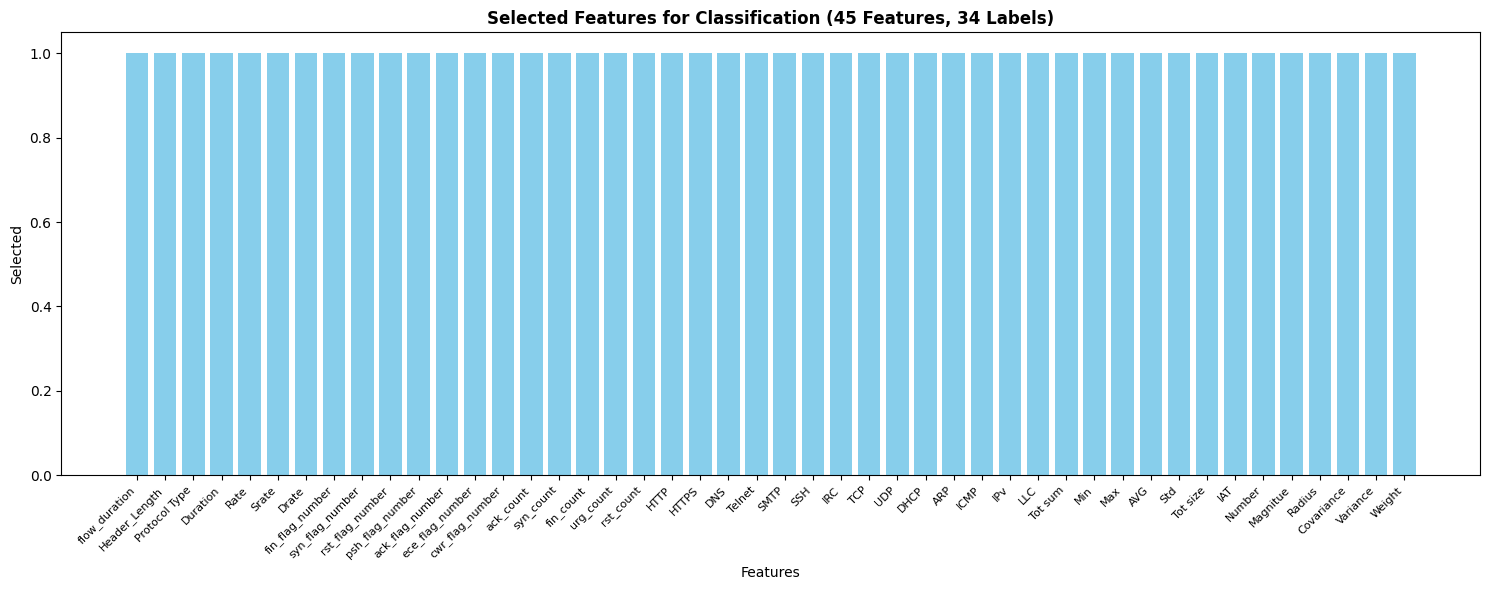

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.impute import KNNImputer
import pickle
import os
import matplotlib.pyplot as plt

# Đường dẫn lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Giả định df_full là DataFrame từ cell đọc dữ liệu trước đó (cuDF)
# Chuyển từ cuDF sang Pandas
df_original = df_full.to_pandas()

# Kiểm tra dữ liệu đầu vào
if df_original.empty or 'label' not in df_original.columns:
    raise ValueError("❌ Dữ liệu đầu vào rỗng hoặc thiếu cột 'label'!")

# Xử lý giá trị thiếu cho cột số
numeric_columns = df_original.select_dtypes(include=[np.number]).columns
df_original[numeric_columns] = df_original[numeric_columns].fillna(df_original[numeric_columns].mean())

# Tách đặc trưng và nhãn
X = df_original.drop(columns=['label']).select_dtypes(include=[np.number])
y = df_original['label']

# Kiểm tra nhãn duy nhất
print("📋 Nhãn duy nhất trong dữ liệu:", y.unique().tolist())
if len(y.unique()) != 34:
    print(f"⚠️ Cảnh báo: Tìm thấy {len(y.unique())} nhãn, kỳ vọng 34 nhãn!")

# Lấy tất cả đặc trưng (loại bỏ cột 'label')
selected_features = list(X.columns)
print(f"📌 Số đặc trưng được chọn: {len(selected_features)}")
if len(selected_features) != 45:
    print(f"⚠️ Cảnh báo: Tìm thấy {len(selected_features)} đặc trưng, kỳ vọng 45 đặc trưng sau khi loại bỏ 'label'!")

# Kiểm tra xem các đặc trưng có tồn tại trong dữ liệu không
missing_features = [f for f in selected_features if f not in X.columns]
if missing_features:
    raise ValueError(f"❌ Các đặc trưng sau không tồn tại trong dữ liệu: {missing_features}")

# Lấy chỉ số của các đặc trưng
feature_indices = [list(X.columns).index(f) for f in selected_features]

# Áp dụng các đặc trưng (giữ nguyên toàn bộ 45 đặc trưng)
X = X[selected_features]

# Chia dữ liệu thành tập train, val, test
X_temp, X_test, Y_temp, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.1875, stratify=Y_temp, random_state=42)

# Mã hóa nhãn (34 nhãn gốc)
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_val_encoded = label_encoder.transform(Y_val)
Y_test_encoded = label_encoder.transform(Y_test)
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# In ánh xạ nhãn trước khi lưu
print("\n📊 Ánh xạ nhãn (34 nhãn):")
for label, idx in sorted(label_mapping.items(), key=lambda x: x[1]):
    print(f"Nhãn: {label} -> Mã: {idx}")

# Kiểm tra phân bố nhãn
print("\n📊 Phân bố nhãn trong tập huấn luyện:")
print(pd.Series(Y_train_encoded).value_counts().rename(label_mapping))
print("\n📊 Phân bố nhãn trong tập validation:")
print(pd.Series(Y_val_encoded).value_counts().rename(label_mapping))
print("\n📊 Phân bố nhãn trong tập kiểm tra:")
print(pd.Series(Y_test_encoded).value_counts().rename(label_mapping))

# Xử lý NaN và outlier bằng KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

# Chuẩn hóa dữ liệu bằng RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Kiểm tra giá trị sau khi chọn đặc trưng
print("🔍 Giá trị tối đa và tối thiểu trong X_train_scaled:")
print(pd.DataFrame(X_train_scaled, columns=selected_features).describe().loc[['min', 'max']])
print("🔍 Giá trị tối đa và tối thiểu trong X_val_scaled:")
print(pd.DataFrame(X_val_scaled, columns=selected_features).describe().loc[['min', 'max']])
print("🔍 Giá trị tối đa và tối thiểu trong X_test_scaled:")
print(pd.DataFrame(X_test_scaled, columns=selected_features).describe().loc[['min', 'max']])

# Lưu dữ liệu đã xử lý
np.save(f"{output_dir}/X_train_scaled_34labels.npy", X_train_scaled)
np.save(f"{output_dir}/Y_train_encoded_34labels.npy", Y_train_encoded)
np.save(f"{output_dir}/X_val_scaled_34labels.npy", X_val_scaled)
np.save(f"{output_dir}/Y_val_encoded_34labels.npy", Y_val_encoded)
np.save(f"{output_dir}/X_test_scaled_34labels.npy", X_test_scaled)
np.save(f"{output_dir}/Y_test_encoded_34labels.npy", Y_test_encoded)

# Lưu các đối tượng xử lý
with open(f"{output_dir}/label_encoder_34labels.pkl", 'wb') as f:
    pickle.dump(label_encoder, f)
with open(f"{output_dir}/scaler_34labels.pkl", 'wb') as f:
    pickle.dump(scaler, f)
with open(f"{output_dir}/imputer_34labels.pkl", 'wb') as f:
    pickle.dump(imputer, f)
with open(f"{output_dir}/selected_features_34labels.pkl", 'wb') as f:
    pickle.dump(selected_features, f)

# Lưu ánh xạ nhãn
with open(f"{output_dir}/label_mapping_34labels.pkl", 'wb') as f:
    pickle.dump(label_mapping, f)

# In thông tin chi tiết
print(f"✅ Dữ liệu đã xử lý và lưu trong '{output_dir}'!")
print(f"📌 Số đặc trưng được chọn: {len(selected_features)}")
print(f"📋 Các đặc trưng được chọn: {selected_features}")

# Vẽ biểu đồ danh sách đặc trưng được chọn
plt.figure(figsize=(15, 6))  # Tăng kích thước để hiển thị 45 đặc trưng
plt.bar(selected_features, [1] * len(selected_features), color='skyblue')
plt.title('Selected Features for Classification (45 Features, 34 Labels)', fontsize=12, fontweight='bold')
plt.xlabel('Features', fontsize=10)
plt.ylabel('Selected', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.savefig(f"{output_dir}/selected_features_34labels.png")
plt.show()

# **CHUYỂN ĐỔI ĐẶC TRƯNG FUZZY**

In [3]:
import numpy as np
import joblib
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import os

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Tải dữ liệu đã xử lý
X_train_scaled = np.load(f"{output_dir}/X_train_scaled_34labels.npy")
Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
X_val_scaled = np.load(f"{output_dir}/X_val_scaled_34labels.npy")
Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
X_test_scaled = np.load(f"{output_dir}/X_test_scaled_34labels.npy")
Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")

# Kiểm tra shape dữ liệu
print(f"📌 Shape dữ liệu: train {X_train_scaled.shape}, val {X_val_scaled.shape}, test {X_test_scaled.shape}")
if X_train_scaled.shape[1] != 46:
    raise ValueError(f"❌ Số đặc trưng không phải 46, tìm thấy {X_train_scaled.shape[1]} đặc trưng!")
if len(np.unique(Y_train_encoded)) != 34:
    raise ValueError(f"❌ Số nhãn không phải 34, tìm thấy {len(np.unique(Y_train_encoded))} nhãn!")

# Chia 46 đặc trưng thành 5 nhóm (4 nhóm 9 đặc trưng, 1 nhóm 10 đặc trưng)
n_groups = 5
base_group_size = 46 // n_groups  # 9 đặc trưng mỗi nhóm
remainder = 46 % n_groups  # 1 đặc trưng dư
group_sizes = [base_group_size + 1 if i < remainder else base_group_size for i in range(n_groups)]
group_boundaries = np.cumsum([0] + group_sizes)
X_train_grouped = []
X_val_grouped = []
X_test_grouped = []

print("🔄 Tạo đặc trưng xác suất nhóm bằng XGBoost...")
for i in range(n_groups):
    start_idx = group_boundaries[i]
    end_idx = group_boundaries[i + 1]
    X_train_group = X_train_scaled[:, start_idx:end_idx]  # Shape: [n_samples, 9 hoặc 10]
    X_val_group = X_val_scaled[:, start_idx:end_idx]
    X_test_group = X_test_scaled[:, start_idx:end_idx]

    # Kiểm tra shape của nhóm
    print(f"Nhóm {i+1}: Shape X_train_group: {X_train_group.shape}")

    # Huấn luyện XGBoost trên nhóm đặc trưng
    xgb = XGBClassifier(
        n_estimators=50,
        max_depth=8,
        min_child_weight=10,
        tree_method="hist",
        device="cuda",
        random_state=42,
        objective="multi:softprob",
        num_class=34
    )
    xgb.fit(X_train_group, Y_train_encoded)

    # Tạo xác suất dự đoán
    train_probs = xgb.predict_proba(X_train_group)  # Shape: [n_samples, 34]
    val_probs = xgb.predict_proba(X_val_group)
    test_probs = xgb.predict_proba(X_test_group)

    X_train_grouped.append(train_probs)
    X_val_grouped.append(val_probs)
    X_test_grouped.append(test_probs)

    # Lưu mô hình XGBoost
    joblib.dump(xgb, f"{output_dir}/xgb_group_{i}_34labels.joblib")
    print(f"✅ Đã xử lý nhóm {i+1}/{n_groups}")

# Gộp đặc trưng xác suất
X_train_grouped = np.concatenate(X_train_grouped, axis=1)  # Shape: [n_samples, 5*34 = 170]
X_val_grouped = np.concatenate(X_val_grouped, axis=1)
X_test_grouped = np.concatenate(X_test_grouped, axis=1)

# Kiểm tra shape sau khi gộp
print(f"📌 Shape X_train_grouped: {X_train_grouped.shape}")

# Kết hợp với top-k đặc trưng gốc
k = 10  # Chọn 10 đặc trưng quan trọng nhất
xgb_full = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    min_child_weight=10,
    tree_method="hist",
    device="cuda",
    random_state=42,
    objective="multi:softprob",
    num_class=34
)
xgb_full.fit(X_train_scaled, Y_train_encoded)
feature_importance = xgb_full.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1][:k]

# Kết hợp đặc trưng xác suất và đặc trưng gốc
X_train_combined = np.concatenate([X_train_grouped, X_train_scaled[:, sorted_idx]], axis=1)  # Shape: [n_samples, 170+10 = 180]
X_val_combined = np.concatenate([X_val_grouped, X_val_scaled[:, sorted_idx]], axis=1)
X_test_combined = np.concatenate([X_test_grouped, X_test_scaled[:, sorted_idx]], axis=1)

# Kiểm tra shape sau khi kết hợp
print(f"📌 Shape X_train_combined: {X_train_combined.shape}")

# Chuẩn hóa lại dữ liệu
scaler = StandardScaler()
X_train_combined = scaler.fit_transform(X_train_combined)
X_val_combined = scaler.transform(X_val_combined)
X_test_combined = scaler.transform(X_test_combined)

# Lưu dữ liệu
np.save(f"{output_dir}/X_train_combined_34labels.npy", X_train_combined)
np.save(f"{output_dir}/X_val_combined_34labels.npy", X_val_combined)
np.save(f"{output_dir}/X_test_combined_34labels.npy", X_test_combined)
joblib.dump(scaler, f"{output_dir}/scaler_combined_34labels.joblib")

# In thông tin
print(f"✅ Đã tạo đặc trưng kết hợp!")
print(f"📌 Shape: train {X_train_combined.shape}, val {X_val_combined.shape}, test {X_test_combined.shape}")
print(f"📌 Số đặc trưng: {X_train_combined.shape[1]} (170 xác suất + 10 gốc)")
print(f"📌 Top-10 đặc trưng gốc (chỉ số): {sorted_idx}")

📌 Shape dữ liệu: train (2210000, 46), val (510000, 46), test (680000, 46)
🔄 Tạo đặc trưng xác suất nhóm bằng XGBoost...
Nhóm 1: Shape X_train_group: (2210000, 10)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [02:28:52] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


✅ Đã xử lý nhóm 1/5
Nhóm 2: Shape X_train_group: (2210000, 9)
✅ Đã xử lý nhóm 2/5
Nhóm 3: Shape X_train_group: (2210000, 9)
✅ Đã xử lý nhóm 3/5
Nhóm 4: Shape X_train_group: (2210000, 9)
✅ Đã xử lý nhóm 4/5
Nhóm 5: Shape X_train_group: (2210000, 9)
✅ Đã xử lý nhóm 5/5
📌 Shape X_train_grouped: (2210000, 170)
📌 Shape X_train_combined: (2210000, 180)
✅ Đã tạo đặc trưng kết hợp!
📌 Shape: train (2210000, 180), val (510000, 180), test (680000, 180)
📌 Số đặc trưng: 180 (170 xác suất + 10 gốc)
📌 Top-10 đặc trưng gốc (chỉ số): [ 7 30 24  8 39 45 10 31 19 16]


# **LẤY ĐẶC TRƯNG GIẢM CHIỀU FUZZY BẰNG PCA**

In [ ]:
!pip install dask

In [ ]:
import pandas as pd
import numpy as np
import time
import gc
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from tqdm import tqdm
import joblib
import pickle
import os
import matplotlib.pyplot as plt
import dask.array as da
import torch  # Để xử lý dữ liệu trên GPU

# Đường dẫn lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Giả định df_full đã được đọc trước đó
df_original = df_full.to_pandas()

# Xử lý giá trị thiếu
numeric_columns = df_original.select_dtypes(include=[np.number]).columns
df_original[numeric_columns] = df_original[numeric_columns].fillna(df_original[numeric_columns].mean())

# Tách đặc trưng và nhãn
X = df_original.drop(columns=['label']).select_dtypes(include=[np.number])
y = df_original['label']

# 30 đặc trưng đã chọn
selected_features = [
    'IAT', 'Tot size', 'Max', 'Tot sum', 'Magnitue', 'AVG', 'Min', 'Header_Length', 
    'Protocol Type', 'rst_count', 'Weight', 'Number', 'Variance', 'Std', 'Radius', 
    'Covariance', 'Duration', 'urg_count', 'flow_duration', 'Rate', 'Srate', 'TCP', 
    'ack_flag_number', 'syn_count', 'HTTPS', 'ack_count', 'syn_flag_number', 'ICMP', 
    'fin_count', 'UDP'
]

# Kiểm tra đặc trưng
missing_features = [f for f in selected_features if f not in X.columns]
if missing_features:
    raise ValueError(f"❌ Các đặc trưng sau không tồn tại: {missing_features}")

X = X[selected_features]
selected_indices = [list(X.columns).index(f) for f in selected_features]

# Chia dữ liệu
from sklearn.model_selection import train_test_split
X_temp, X_test, Y_temp, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.1875, stratify=Y_temp, random_state=42)

# Lưu số mẫu để dùng sau
np.save(f"{output_dir}/n_train_samples.npy", X_train.shape[0])
np.save(f"{output_dir}/n_val_samples.npy", X_val.shape[0])
np.save(f"{output_dir}/n_test_samples.npy", X_test.shape[0])

# Mã hóa nhãn
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_val_encoded = label_encoder.transform(Y_val)
Y_test_encoded = label_encoder.transform(Y_test)
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Xử lý NaN và chuẩn hóa
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Giải phóng bộ nhớ
del df_original, X, y, X_temp, Y_temp, X_train, X_val, X_test, Y_train, Y_val, Y_test
del X_train_imputed, X_val_imputed, X_test_imputed
gc.collect()

# Hàm xử lý fuzzy theo batch với Dask
def convert_to_fuzzy_features_xgb_batch(X_train, Y_train, X_val, X_test, selected_features, selected_indices, n_labels=34, n_estimators=50, batch_size=6):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    X_train_fuzzy_batches = []
    X_val_fuzzy_batches = []
    X_test_fuzzy_batches = []

    for batch_start in tqdm(range(0, len(selected_indices), batch_size), desc="Xử lý batch đặc trưng fuzzy"):
        batch_indices = selected_indices[batch_start:batch_start + batch_size]
        batch_features = selected_features[batch_start:batch_start + batch_size]
        
        X_train_fuzzy_batch = []
        X_val_fuzzy_batch = []
        X_test_fuzzy_batch = []

        for idx, i in enumerate(batch_indices):
            # Chuyển dữ liệu sang GPU
            X_train_feature = torch.tensor(X_train[:, i].reshape(-1, 1), dtype=torch.float32).to(device)
            X_val_feature = torch.tensor(X_val[:, i].reshape(-1, 1), dtype=torch.float32).to(device)
            X_test_feature = torch.tensor(X_test[:, i].reshape(-1, 1), dtype=torch.float32).to(device)

            xgb = XGBClassifier(
                n_estimators=n_estimators,
                max_depth=10,
                min_child_weight=10,
                tree_method="hist",
                device="cuda",
                random_state=44,
                objective="multi:softprob"
            )
            # Huấn luyện trên CPU vì XGBoost yêu cầu NumPy array
            xgb.fit(X_train_feature.cpu().numpy(), Y_train)

            # Dự đoán trên CPU
            train_probs = xgb.predict_proba(X_train_feature.cpu().numpy()).astype(np.float32)
            val_probs = xgb.predict_proba(X_val_feature.cpu().numpy()).astype(np.float32)
            test_probs = xgb.predict_proba(X_test_feature.cpu().numpy()).astype(np.float32)

            if train_probs.shape[1] < n_labels:
                missing_labels = n_labels - train_probs.shape[1]
                train_probs = np.pad(train_probs, ((0, 0), (0, missing_labels)), mode='constant')
                val_probs = np.pad(val_probs, ((0, 0), (0, missing_labels)), mode='constant')
                test_probs = np.pad(test_probs, ((0, 0), (0, missing_labels)), mode='constant')

            X_train_fuzzy_batch.append(train_probs)
            X_val_fuzzy_batch.append(val_probs)
            X_test_fuzzy_batch.append(test_probs)

            joblib.dump(xgb, f"{output_dir}/xgb_feature_{batch_features[idx]}_34labels.joblib")

        X_train_fuzzy_batch = np.concatenate(X_train_fuzzy_batch, axis=1)
        X_val_fuzzy_batch = np.concatenate(X_val_fuzzy_batch, axis=1)
        X_test_fuzzy_batch = np.concatenate(X_test_fuzzy_batch, axis=1)

        np.savez_compressed(
            f"{output_dir}/X_train_fuzzy_batch_{batch_start//batch_size}.npz",
            X_train_fuzzy_batch=X_train_fuzzy_batch
        )
        np.savez_compressed(
            f"{output_dir}/X_val_fuzzy_batch_{batch_start//batch_size}.npz",
            X_val_fuzzy_batch=X_val_fuzzy_batch
        )
        np.savez_compressed(
            f"{output_dir}/X_test_fuzzy_batch_{batch_start//batch_size}.npz",
            X_test_fuzzy_batch=X_test_fuzzy_batch
        )

        del X_train_fuzzy_batch, X_val_fuzzy_batch, X_test_fuzzy_batch
        gc.collect()
        torch.cuda.empty_cache()

    # Sử dụng Dask để nối các batch
    X_train_fuzzy_chunks = []
    X_val_fuzzy_chunks = []
    X_test_fuzzy_chunks = []
    for batch_idx in range(0, len(selected_indices), batch_size):
        batch_data = np.load(f"{output_dir}/X_train_fuzzy_batch_{batch_idx//batch_size}.npz")
        X_train_fuzzy_chunks.append(da.from_array(batch_data['X_train_fuzzy_batch'], chunks=(10000, -1)))
        batch_data = np.load(f"{output_dir}/X_val_fuzzy_batch_{batch_idx//batch_size}.npz")
        X_val_fuzzy_chunks.append(da.from_array(batch_data['X_val_fuzzy_batch'], chunks=(10000, -1)))
        batch_data = np.load(f"{output_dir}/X_test_fuzzy_batch_{batch_idx//batch_size}.npz")
        X_test_fuzzy_chunks.append(da.from_array(batch_data['X_test_fuzzy_batch'], chunks=(10000, -1)))

    X_train_fuzzy = da.concatenate(X_train_fuzzy_chunks, axis=1)
    X_val_fuzzy = da.concatenate(X_val_fuzzy_chunks, axis=1)
    X_test_fuzzy = da.concatenate(X_test_fuzzy_chunks, axis=1)

    # Lưu Dask array thành stack của các file .npy
    train_stack_dir = f"{output_dir}/X_train_fuzzy_stack"
    val_stack_dir = f"{output_dir}/X_val_fuzzy_stack"
    test_stack_dir = f"{output_dir}/X_test_fuzzy_stack"
    os.makedirs(train_stack_dir, exist_ok=True)
    os.makedirs(val_stack_dir, exist_ok=True)
    os.makedirs(test_stack_dir, exist_ok=True)

    da.to_npy_stack(train_stack_dir, X_train_fuzzy, axis=0)
    da.to_npy_stack(val_stack_dir, X_val_fuzzy, axis=0)
    da.to_npy_stack(test_stack_dir, X_test_fuzzy, axis=0)

    # Tùy chọn: Chuyển về single .npy file nếu RAM đủ
    try:
        X_train_fuzzy = X_train_fuzzy.compute()
        X_val_fuzzy = X_val_fuzzy.compute()
        X_test_fuzzy = X_test_fuzzy.compute()

        # Lưu vào file .npy
        np.save(f"{output_dir}/X_train_fuzzy_xgb_34labels.npy", X_train_fuzzy)
        np.save(f"{output_dir}/X_val_fuzzy_xgb_34labels.npy", X_val_fuzzy)
        np.save(f"{output_dir}/X_test_fuzzy_xgb_34labels.npy", X_test_fuzzy)
    except MemoryError:
        print("⚠️ RAM không đủ để compute Dask array. Sử dụng stack .npy files hoặc custom DataLoader.")

    return X_train_fuzzy, X_val_fuzzy, X_test_fuzzy

# Tính đặc trưng fuzzy
start_time = time.time()
X_train_fuzzy, X_val_fuzzy, X_test_fuzzy = convert_to_fuzzy_features_xgb_batch(
    X_train_scaled, Y_train_encoded, X_val_scaled, X_test_scaled,
    selected_features=selected_features, selected_indices=selected_indices, n_labels=34, batch_size=6
)
print(f"⏱ Thời gian xử lý: {time.time() - start_time:.2f}s")

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        print(f"⚠️ {name} chứa giá trị NaN hoặc Inf")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_fuzzy = check_and_clean_data(X_train_fuzzy, "X_train_fuzzy")
X_val_fuzzy = check_and_clean_data(X_val_fuzzy, "X_val_fuzzy")
X_test_fuzzy = check_and_clean_data(X_test_fuzzy, "X_test_fuzzy")

# Lưu dữ liệu
np.save(f"{output_dir}/Y_train_encoded_34labels.npy", Y_train_encoded)
np.save(f"{output_dir}/Y_val_encoded_34labels.npy", Y_val_encoded)
np.save(f"{output_dir}/Y_test_encoded_34labels.npy", Y_test_encoded)

# Lưu các đối tượng
with open(f"{output_dir}/label_encoder_34labels.pkl", 'wb') as f:
    pickle.dump(label_encoder, f)
with open(f"{output_dir}/scaler_34labels.pkl", 'wb') as f:
    pickle.dump(scaler, f)
with open(f"{output_dir}/imputer_34labels.pkl", 'wb') as f:
    pickle.dump(imputer, f)
with open(f"{output_dir}/selected_features_34labels.pkl", 'wb') as f:
    pickle.dump(selected_features, f)

print(f"✅ Dữ liệu fuzzy đã xử lý và lưu trong '{output_dir}'!")
print(f"📌 Số đặc trưng fuzzy: 1020 (30 đặc trưng × 34 nhãn)")
print(f"📋 Đặc trưng được sử dụng: {selected_features}")

# Vẽ biểu đồ đặc trưng
plt.figure(figsize=(15, 5))
plt.bar(selected_features, [1] * len(selected_features), color='lightblue')
plt.title('30 Đặc trưng cho Biến đổi Fuzzy (34 Nhãn)', fontsize=12, fontweight='bold')
plt.xlabel('Đặc trưng', fontsize=10)
plt.ylabel('Đã chọn', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.savefig(f"{output_dir}/selected_features_34labels.png")
plt.show()

# **MÔ HÌNH DCN-V2 FUZZY ĐẶC TRƯNG**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast

# FocalLoss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# GhostBN1d
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# CrossLayer
class CrossLayer(nn.Module):
    def __init__(self, input_dim):
        super(CrossLayer, self).__init__()
        self.weight = nn.Parameter(torch.randn(input_dim, input_dim) * 0.01)
        self.bias = nn.Parameter(torch.zeros(input_dim))
        self.norm = nn.LayerNorm(input_dim)
        nn.init.xavier_normal_(self.weight, gain=0.1)
        nn.init.zeros_(self.bias)

    def forward(self, x_0, x_l):
        assert x_0.dim() == 2 and x_l.dim() == 2, f"Expected 2D tensors, got x_0: {x_0.shape}, x_l: {x_l.shape}"
        x_l_w = torch.matmul(x_l, self.weight)
        x_l_w_b = x_l_w + self.bias
        x_0_dot = x_0 * x_l_w_b
        x_l_plus_1 = x_0_dot + x_l
        x_l_plus_1 = self.norm(x_l_plus_1)
        return x_l_plus_1

# DCNV2
class DCNV2(nn.Module):
    def __init__(self, input_dim, num_classes, n_cross_layers=3, n_deep_layers=3, deep_layer_dim=128):
        super(DCNV2, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)
        self.cross_layers = nn.ModuleList([CrossLayer(input_dim) for _ in range(n_cross_layers)])
        deep_layers = []
        prev_dim = input_dim
        for _ in range(n_deep_layers):
            deep_layers.extend([
                nn.Linear(prev_dim, deep_layer_dim),
                nn.BatchNorm1d(deep_layer_dim),
                nn.ReLU(),
                nn.Dropout(0.1)
            ])
            prev_dim = deep_layer_dim
        self.deep = nn.Sequential(*deep_layers)
        self.combine_fc = nn.Linear(input_dim + deep_layer_dim, num_classes)
        nn.init.xavier_normal_(self.combine_fc.weight, gain=0.1)
        nn.init.zeros_(self.combine_fc.bias)
        self.importance_layer = nn.Linear(input_dim, input_dim)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        x_0 = x
        x_cross = x
        for i, layer in enumerate(self.cross_layers):
            x_cross = layer(x_0, x_cross)
            if torch.isnan(x_cross).any():
                tqdm.write(f"NaN detected in CrossLayer {i+1}")
                break
        x_deep = self.deep(x)
        if torch.isnan(x_deep).any():
            tqdm.write("NaN detected in Deep layers")
        combined = torch.cat([x_cross, x_deep], dim=1)
        output = self.combine_fc(combined)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
results_dir = "results"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu fuzzy (10 đặc trưng fuzzy, 34 nhãn)
try:
    X_train_fuzzy = np.load(f"{output_dir}/X_train_fuzzy_xgb_34labels.npy")  # Shape: (n_train, 340)
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_fuzzy = np.load(f"{output_dir}/X_val_fuzzy_xgb_34labels.npy")      # Shape: (n_val, 340)
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_fuzzy = np.load(f"{output_dir}/X_test_fuzzy_xgb_34labels.npy")    # Shape: (n_test, 340)
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write("✅ Đã tải dữ liệu fuzzy XGBoost và nhãn (34 nhãn)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf trong dữ liệu
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_fuzzy = check_and_clean_data(X_train_fuzzy, "X_train_fuzzy")
X_val_fuzzy = check_and_clean_data(X_val_fuzzy, "X_val_fuzzy")
X_test_fuzzy = check_and_clean_data(X_test_fuzzy, "X_test_fuzzy")

# Chuẩn hóa dữ liệu
X_train_fuzzy = (X_train_fuzzy - X_train_fuzzy.mean(axis=0)) / (X_train_fuzzy.std(axis=0) + 1e-6)
X_val_fuzzy = (X_val_fuzzy - X_val_fuzzy.mean(axis=0)) / (X_val_fuzzy.std(axis=0) + 1e-6)
X_test_fuzzy = (X_test_fuzzy - X_test_fuzzy.mean(axis=0)) / (X_test_fuzzy.std(axis=0) + 1e-6)

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_fuzzy, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_fuzzy, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_fuzzy, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)

# DataLoader
batch_size = 2048  # Giảm batch_size để tiết kiệm VRAM
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_encoded, minlength=34)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình và tối ưu hóa
input_dim = X_train_fuzzy.shape[1]  # 10*34 = 340
model = DCNV2(input_dim=input_dim, num_classes=34, n_cross_layers=3, n_deep_layers=3, deep_layer_dim=128).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 100
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Danh sách 34 nhãn
label_names = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Huấn luyện với gradient accumulation
tqdm.write("Bắt đầu huấn luyện DCN-V2 với Focal + Sparsity Loss (Không Early Stopping)")
torch.manual_seed(44)
accumulation_steps = 2  # Tích lũy gradient qua 2 bước
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    optimizer.zero_grad()
    with tqdm(train_loader, desc=f"Huấn luyện Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for i, (X_batch, Y_batch) in enumerate(pbar):
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"Phát hiện NaN trong total_loss tại batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss / accumulation_steps).backward()
            grad_norm = 0.0  # Khởi tạo mặc định
            if (i + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean()
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Xác thực (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    # Lưu mô hình nếu F1 tốt hơn
    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/dcnv2_34labels_fuzzy_top10.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/dcnv2_34labels_fuzzy_top10_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/dcnv2_34labels_fuzzy_top10_final.pth")

# Lưu dữ liệu đánh giá
np.save(f"{results_dir}/train_losses_34labels_fuzzy_top10_dcnv2.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_fuzzy_top10_dcnv2.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_fuzzy_top10_dcnv2.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_fuzzy_top10_dcnv2.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_fuzzy_top10_dcnv2.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_fuzzy_top10_dcnv2.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_fuzzy_top10_dcnv2.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_fuzzy_top10_dcnv2.npy", np.array(epoch_times))

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/dcnv2_34labels_fuzzy_top10.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Kiểm tra", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

# Chuyển thành numpy array
test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

# Tính toán các chỉ số
pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

# Phân tích nhầm lẫn trên tập test
confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Ma trận nhầm lẫn (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Ma trận nhầm lẫn không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

# Lưu dữ liệu cho biểu đồ
if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Cảnh báo: Kích thước mask không đồng nhất: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_top10_dcnv2.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_fuzzy_top10_dcnv2.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_fuzzy_top10_dcnv2.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_fuzzy_top10_dcnv2.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_fuzzy_top10_dcnv2.npy", avg_mask)

# Tính giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)
total_time = sum(epoch_times)

# Lưu kết quả vào file
with open(f"{results_dir}/DCN-v2_34labels_fuzzy_top10.txt", 'w') as f:
    f.write("Kết quả huấn luyện DCN-V2 (34 nhãn, 10 đặc trưng fuzzy)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/DCN-v2_34labels_fuzzy_top10.txt")

# In thông tin shape
tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"  # Thư mục chứa selected_features_top10_34labels.pkl

# Tải dữ liệu với kiểm tra lỗi
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_fuzzy_top10_dcnv2.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_fuzzy_top10_dcnv2.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_fuzzy_top10_dcnv2.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_fuzzy_top10_dcnv2.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_fuzzy_top10_dcnv2.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_fuzzy_top10_dcnv2.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_fuzzy_top10_dcnv2.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_fuzzy_top10_dcnv2.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_top10_dcnv2.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_fuzzy_top10_dcnv2.npy")
    print("✅ Đã tải tất cả dữ liệu cần thiết cho DCN-V2 (34 nhãn, fuzzy top 10)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 100  # 100 epoch
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'Backdoor_Malware', 1: 'BenignTraffic', 2: 'BrowserHijacking', 3: 'CommandInjection',
    4: 'DDoS-ACK_Fragmentation', 5: 'DDoS-HTTP_Flood', 6: 'DDoS-ICMP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-PSHACK_Flood', 9: 'DDoS-RSTFINFlood', 10: 'DDoS-SYN_Flood', 11: 'DDoS-SlowLoris',
    12: 'DDoS-SynonymousIP_Flood', 13: 'DDoS-TCP_Flood', 14: 'DDoS-UDP_Flood', 15: 'DDoS-UDP_Fragmentation',
    16: 'DNS_Spoofing', 17: 'DictionaryBruteForce', 18: 'DoS-HTTP_Flood', 19: 'DoS-SYN_Flood',
    20: 'DoS-TCP_Flood', 21: 'DoS-UDP_Flood', 22: 'MITM-ArpSpoofing', 23: 'Mirai-greeth_flood',
    24: 'Mirai-greip_flood', 25: 'Mirai-udpplain', 26: 'Recon-HostDiscovery', 27: 'Recon-OSScan',
    28: 'Recon-PingSweep', 29: 'Recon-PortScan', 30: 'SqlInjection', 31: 'Uploading_Attack',
    32: 'VulnerabilityScan', 33: 'XSS'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))  # Lấy 20 màu từ tab20
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))  # Lấy 12 màu từ Set3
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))  # Lấy 12 màu từ Paired
# Kết hợp các bảng màu và đảm bảo đủ 34 màu khác nhau
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))  # Tổng cộng 34 màu
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Chuẩn bị dữ liệu cho biểu đồ
epochs = np.arange(len(train_losses))
train_accuracies_plot = train_accuracies
val_accuracies_plot = val_accuracies
train_losses_plot = train_losses
val_losses_plot = val_losses
epochs_mapped = epochs  # Sử dụng trực tiếp 0-99

# 1️⃣ & 2️⃣ Vẽ biểu đồ Loss và Accuracy cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ Loss (bên trái)
ax1.plot(epochs_mapped, train_losses_plot, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs_mapped, val_losses_plot, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 99)
ax1.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
loss_min = min(train_losses_plot[1:].min(), val_losses_plot[1:].min())
loss_max = max(train_losses_plot[1:].max(), val_losses_plot[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_loss = np.mean(train_losses_plot[1:])
avg_val_loss = np.mean(val_losses_plot[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
# Thêm chú thích giá trị tại epoch cuối
ax1.annotate(f"{train_losses_plot[-1]:.4f}", (99, train_losses_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses_plot[-1]:.4f}", (99, val_losses_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Biểu đồ Accuracy (bên phải)
ax2.plot(epochs_mapped, train_accuracies_plot, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs_mapped, val_accuracies_plot, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 99)
ax2.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
acc_min = min(train_accuracies_plot[1:].min(), val_accuracies_plot[1:].min())
acc_max = max(train_accuracies_plot[1:].max(), val_accuracies_plot[1:].max())
ax2.set_ylim(acc_min - 0.1, acc_max + 0.1)
ax2.set_yticks(np.linspace(acc_min - 0.1, acc_max + 0.1, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_accuracy = np.mean(train_accuracies_plot[1:])
avg_val_accuracy = np.mean(val_accuracies_plot[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
# Thêm chú thích giá trị tại epoch cuối
ax2.annotate(f"{train_accuracies_plot[-1]:.2f}%", (99, train_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies_plot[-1]:.2f}%", (99, val_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

# Thêm tiêu đề chính
plt.suptitle("DCN-V2: Learning Curves (34 Labels, Fuzzy Top 10)\n100 Epochs", 
             fontsize=16, y=1.05)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)

# Lưu biểu đồ
plt.savefig(f"{results_dir}/learning_curves_dcnv2_34labels_fuzzy_top10.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))  # Tăng kích thước lớn hơn để các ô rõ ràng
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
# Điều chỉnh kích thước font để dễ đọc
for text in disp.text_.ravel():
    text.set_fontsize(10)  # Tăng kích thước font của số liệu trong ô
plt.title("DCN-V2: Confusion Matrix (Test, 34 Labels, Fuzzy Top 10)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_dcnv2_34labels_fuzzy_top10.png")
plt.show()

# 4️⃣ ROC-AUC (Multi-class, one-vs-rest, vẽ đủ 34 nhãn)
plt.figure(figsize=(12, 10))
for i in range(34):  # Vẽ cho tất cả 34 nhãn
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("DCN-V2: ROC Curve (All 34 Labels, Fuzzy Top 10, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)  # Chia legend thành 2 cột để dễ đọc
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_dcnv2_34labels_fuzzy_top10_all.png", bbox_inches="tight")
plt.show()

# Tính macro-average ROC-AUC cho tất cả nhãn
macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 Macro-average ROC-AUC Score (Multi-class, 34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

# Kiểm tra số mẫu
if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    # Apply PCA với n_components=3
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        
        # 3D Plot
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):  # Vẽ cho tất cả 34 nhãn
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("DCN-V2: PCA 3D Visualization (34 Labels, Fuzzy Top 10)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)  # Chia legend thành 2 cột
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_dcnv2_34labels_fuzzy_top10.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
# Giả định feature_importance có shape (batch_size, input_dim), lấy trung bình theo batch
if len(feature_importance.shape) == 2:
    avg_importance = np.mean(feature_importance, axis=0)
else:
    avg_importance = feature_importance

# Tạo nhãn cho các đặc trưng (input_dim=340, từ 10 đặc trưng * 34 nhãn)
input_dim = 340  # Từ code huấn luyện/test
# Giả định 10 đặc trưng được chọn (cần danh sách cụ thể từ file xử lý dữ liệu)
try:
    selected_features = np.load(f"{output_dir}/selected_features_top10_34labels.pkl", allow_pickle=True)
except Exception as e:
    print(f"❌ Lỗi khi tải selected_features_top10_34labels.pkl: {str(e)}")
    # Sử dụng danh sách giả định nếu file không tồn tại
    selected_features = ['IAT', 'Tot size', 'Max', 'Tot sum', 'Magnitue', 'AVG', 'Min', 'Header_Length', 'Protocol Type', 'rst_count']

feature_labels = []
for i in range(input_dim):
    feature_idx = i // 34  # Đặc trưng thứ mấy trong 10 đặc trưng
    label_idx = i % 34     # Nhãn thứ mấy trong 34 nhãn
    feature_labels.append(f"{selected_features[feature_idx]}_P{label_map[label_idx]}")

# Vẽ biểu đồ Feature Importance (chỉ hiển thị top 20 để tránh rối)
top_k = 20
top_indices = np.argsort(avg_importance)[-top_k:]
top_importance = avg_importance[top_indices]
top_labels = [feature_labels[i] for i in top_indices]

plt.figure(figsize=(14, 6))
plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("DCN-V2: Top 20 Feature Importance (34 Labels, Fuzzy Top 10)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_dcnv2_34labels_fuzzy_top10.png")
plt.show()

# 7️⃣ Thời gian huấn luyện trung bình
avg_time = np.mean(epoch_times)
print(f"⏱️ Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ In giá trị trung bình của Loss và Accuracy
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)

print("\n📊 Giá trị trung bình (100 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **MÔ HÌNH TABR**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast

# FocalLoss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# GhostBN1d
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# Retrieval-Augmented Layer
class RetrievalAugmentedLayer(nn.Module):
    def __init__(self, embed_dim, num_classes, k=5):
        super(RetrievalAugmentedLayer, self).__init__()
        self.k = k
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.attention = nn.Linear(embed_dim, 1)

    def forward(self, x_embed, labels=None):
        batch_size = x_embed.size(0)
        distances = torch.cdist(x_embed, x_embed)
        distances.fill_diagonal_(float('inf'))
        _, indices = torch.topk(distances, k=self.k, dim=1, largest=False)
        
        if labels is not None:
            neighbor_labels = labels[indices]
            neighbor_one_hot = F.one_hot(neighbor_labels, num_classes=self.num_classes).float()
        else:
            neighbor_one_hot = torch.zeros(batch_size, self.k, self.num_classes, device=x_embed.device)
        
        neighbor_embeddings = x_embed[indices]
        attention_scores = self.attention(neighbor_embeddings).squeeze(-1)
        attention_weights = F.softmax(attention_scores, dim=1)
        context = torch.einsum('bk,bkc->bc', attention_weights, neighbor_one_hot)
        return context

# TabR
class TabR(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=64, n_layers=2, n_heads=4, ff_dim=128, dropout=0.1, k_neighbors=5):
        super(TabR, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.n_layers = n_layers
        self.n_heads = n_heads
        self.ff_dim = ff_dim
        self.dropout = dropout
        self.k_neighbors = k_neighbors

        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)  # Sửa lỗi: thay 'inputtah_dim' thành 'input_dim'
        self.embedding = nn.Linear(input_dim, embed_dim)
        transformer_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=n_heads,
            dim_feedforward=ff_dim,
            dropout=dropout,
            activation='gelu',
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(transformer_layer, num_layers=n_layers)
        self.retrieval = RetrievalAugmentedLayer(embed_dim, num_classes, k=k_neighbors)
        self.importance_layer = nn.Linear(input_dim, input_dim)
        self.fc_output = nn.Linear(embed_dim + num_classes, num_classes)

        nn.init.xavier_normal_(self.embedding.weight)
        nn.init.xavier_normal_(self.importance_layer.weight)
        nn.init.xavier_normal_(self.fc_output.weight)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x, labels=None):
        x = torch.clamp(self.bn(x), -50, 50)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        x_embed = self.embedding(x)
        transformer_out = self.transformer(x_embed.unsqueeze(1)).squeeze(1)
        context = self.retrieval(x_embed, labels)
        combined = torch.cat([transformer_out, context], dim=1)
        output = self.fc_output(combined)
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu fuzzy từ XGBoost (34 nhãn)
try:
    X_train_fuzzy = np.load(f"{output_dir}/X_train_fuzzy_xgb_34labels.npy")
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_fuzzy = np.load(f"{output_dir}/X_val_fuzzy_xgb_34labels.npy")
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_fuzzy = np.load(f"{output_dir}/X_test_fuzzy_xgb_34labels.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write("✅ Đã tải dữ liệu fuzzy XGBoost và nhãn (34 nhãn)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_fuzzy = check_and_clean_data(X_train_fuzzy, "X_train_fuzzy")
X_val_fuzzy = check_and_clean_data(X_val_fuzzy, "X_val_fuzzy")
X_test_fuzzy = check_and_clean_data(X_test_fuzzy, "X_test_fuzzy")

# Chuẩn hóa dữ liệu
try:
    X_train_fuzzy = (X_train_fuzzy - X_train_fuzzy.mean(axis=0)) / (X_train_fuzzy.std(axis=0) + 1e-6)
    X_val_fuzzy = (X_val_fuzzy - X_val_fuzzy.mean(axis=0)) / (X_val_fuzzy.std(axis=0) + 1e-6)
    X_test_fuzzy = (X_test_fuzzy - X_test_fuzzy.mean(axis=0)) / (X_test_fuzzy.std(axis=0) + 1e-6)
except Exception as e:
    tqdm.write(f"❌ Lỗi khi chuẩn hóa dữ liệu: {str(e)}")
    raise

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_fuzzy)) or np.any(np.isinf(X_train_fuzzy)):
    tqdm.write("⚠️ X_train_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_fuzzy)) or np.any(np.isinf(X_val_fuzzy)):
    tqdm.write("⚠️ X_val_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_fuzzy)) or np.any(np.isinf(X_test_fuzzy)):
    tqdm.write("⚠️ X_test_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_fuzzy, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_fuzzy, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_fuzzy, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)

# DataLoader
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_encoded)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình
input_dim = X_train_fuzzy.shape[1]  # 340 (10 đặc trưng × 34 nhãn)
model = TabR(
    input_dim=input_dim,
    num_classes=34,  # 34 nhãn
    embed_dim=64,
    n_layers=2,
    n_heads=4,
    ff_dim=128,
    dropout=0.1,
    k_neighbors=5
).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 100
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Ánh xạ nhãn cho 34 nhãn
label_names = [
    'Backdoor_Malware', 'BenignTraffic', 'BrowserHijacking', 'CommandInjection',
    'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-ICMP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-PSHACK_Flood', 'DDoS-RSTFINFlood', 'DDoS-SYN_Flood', 'DDoS-SlowLoris',
    'DDoS-SynonymousIP_Flood', 'DDoS-TCP_Flood', 'DDoS-UDP_Flood', 'DDoS-UDP_Fragmentation',
    'DNS_Spoofing', 'DictionaryBruteForce', 'DoS-HTTP_Flood', 'DoS-SYN_Flood',
    'DoS-TCP_Flood', 'DoS-UDP_Flood', 'MITM-ArpSpoofing', 'Mirai-greeth_flood',
    'Mirai-greip_flood', 'Mirai-udpplain', 'Recon-HostDiscovery', 'Recon-OSScan',
    'Recon-PingSweep', 'Recon-PortScan', 'SqlInjection', 'Uploading_Attack',
    'VulnerabilityScan', 'XSS'
]

# Huấn luyện
tqdm.write("Training TabR with Focal + Sparsity Loss (34 Labels, Batch Retrieval)")
torch.manual_seed(44)
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Training Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for X_batch, Y_batch in pbar:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            optimizer.zero_grad()
            
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch, labels=Y_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"NaN detected in total_loss at batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss).backward()
            scaler.unscale_(optimizer)
            grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
            scaler.step(optimizer)
            scaler.update()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Validation (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch, labels=Y_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Confusion Matrix:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    # Lưu mô hình sau mỗi epoch
    torch.save(model.state_dict(), f"{results_dir}/tabr_34labels_fuzzy_xgb_epoch_{epoch+1}.pth")
    tqdm.write(f"📦 Lưu mô hình tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/tabr_34labels_fuzzy_xgb_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/tabr_34labels_fuzzy_xgb_final.pth")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/tabr_34labels_fuzzy_xgb_final.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Testing", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Confusion Matrix (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Confusion Matrix không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Confusion Matrix:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Warning: Inconsistent mask shapes: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

# Lưu kết quả
np.save(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_xgb_tabr.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_fuzzy_xgb_tabr.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_fuzzy_xgb_tabr.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_fuzzy_xgb_tabr.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_fuzzy_xgb_tabr.npy", avg_mask)
np.save(f"{results_dir}/train_losses_34labels_fuzzy_xgb_tabr.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_fuzzy_xgb_tabr.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_fuzzy_xgb_tabr.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_fuzzy_xgb_tabr.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_fuzzy_xgb_tabr.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_fuzzy_xgb_tabr.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_fuzzy_xgb_tabr.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_fuzzy_xgb_tabr.npy", np.array(epoch_times))

avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)
total_time = sum(epoch_times)

with open(f"{results_dir}/TabR_34labels_fuzzy_xgb.txt", 'w') as f:
    f.write("Kết quả huấn luyện TabR (34 nhãn)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/TabR_34labels_fuzzy_xgb.txt")

tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"  # Thư mục chứa selected_features_top10_34labels.pkl

# Tải dữ liệu với kiểm tra lỗi
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_fuzzy_xgb_tabr.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_fuzzy_xgb_tabr.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_fuzzy_xgb_tabr.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_fuzzy_xgb_tabr.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_fuzzy_xgb_tabr.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_fuzzy_xgb_tabr.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_fuzzy_xgb_tabr.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_fuzzy_xgb_tabr.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_xgb_tabr.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_fuzzy_xgb_tabr.npy")
    print("✅ Đã tải tất cả dữ liệu cần thiết cho TabR (34 nhãn, fuzzy XGBoost)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 100  # 100 epoch
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'Backdoor_Malware', 1: 'BenignTraffic', 2: 'BrowserHijacking', 3: 'CommandInjection',
    4: 'DDoS-ACK_Fragmentation', 5: 'DDoS-HTTP_Flood', 6: 'DDoS-ICMP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-PSHACK_Flood', 9: 'DDoS-RSTFINFlood', 10: 'DDoS-SYN_Flood', 11: 'DDoS-SlowLoris',
    12: 'DDoS-SynonymousIP_Flood', 13: 'DDoS-TCP_Flood', 14: 'DDoS-UDP_Flood', 15: 'DDoS-UDP_Fragmentation',
    16: 'DNS_Spoofing', 17: 'DictionaryBruteForce', 18: 'DoS-HTTP_Flood', 19: 'DoS-SYN_Flood',
    20: 'DoS-TCP_Flood', 21: 'DoS-UDP_Flood', 22: 'MITM-ArpSpoofing', 23: 'Mirai-greeth_flood',
    24: 'Mirai-greip_flood', 25: 'Mirai-udpplain', 26: 'Recon-HostDiscovery', 27: 'Recon-OSScan',
    28: 'Recon-PingSweep', 29: 'Recon-PortScan', 30: 'SqlInjection', 31: 'Uploading_Attack',
    32: 'VulnerabilityScan', 33: 'XSS'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))  # Lấy 20 màu từ tab20
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))  # Lấy 12 màu từ Set3
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))  # Lấy 12 màu từ Paired
# Kết hợp các bảng màu và đảm bảo đủ 34 màu khác nhau
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))  # Tổng cộng 34 màu
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Chuẩn bị dữ liệu cho biểu đồ
epochs = np.arange(len(train_losses))
train_accuracies_plot = train_accuracies
val_accuracies_plot = val_accuracies
train_losses_plot = train_losses
val_losses_plot = val_losses
epochs_mapped = epochs  # Sử dụng trực tiếp 0-99

# 1️⃣ & 2️⃣ Vẽ biểu đồ Loss và Accuracy cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ Loss (bên trái)
ax1.plot(epochs_mapped, train_losses_plot, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs_mapped, val_losses_plot, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 99)
ax1.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
loss_min = min(train_losses_plot[1:].min(), val_losses_plot[1:].min())
loss_max = max(train_losses_plot[1:].max(), val_losses_plot[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_loss = np.mean(train_losses_plot[1:])
avg_val_loss = np.mean(val_losses_plot[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
# Thêm chú thích giá trị tại epoch cuối
ax1.annotate(f"{train_losses_plot[-1]:.4f}", (99, train_losses_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses_plot[-1]:.4f}", (99, val_losses_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Biểu đồ Accuracy (bên phải)
ax2.plot(epochs_mapped, train_accuracies_plot, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs_mapped, val_accuracies_plot, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 99)
ax2.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
acc_min = min(train_accuracies_plot[1:].min(), val_accuracies_plot[1:].min())
acc_max = max(train_accuracies_plot[1:].max(), val_accuracies_plot[1:].max())
ax2.set_ylim(acc_min - 0.1, acc_max + 0.1)
ax2.set_yticks(np.linspace(acc_min - 0.1, acc_max + 0.1, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_accuracy = np.mean(train_accuracies_plot[1:])
avg_val_accuracy = np.mean(val_accuracies_plot[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
# Thêm chú thích giá trị tại epoch cuối
ax2.annotate(f"{train_accuracies_plot[-1]:.2f}%", (99, train_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies_plot[-1]:.2f}%", (99, val_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

# Thêm tiêu đề chính
plt.suptitle("TabR: Learning Curves (34 Labels, Fuzzy XGBoost)\n100 Epochs", 
             fontsize=16, y=1.05)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)

# Lưu biểu đồ
plt.savefig(f"{results_dir}/learning_curves_tabr_34labels_fuzzy_xgb.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))  # Tăng kích thước lớn hơn để các ô rõ ràng
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
# Điều chỉnh kích thước font để dễ đọc
for text in disp.text_.ravel():
    text.set_fontsize(10)  # Tăng kích thước font của số liệu trong ô
plt.title("TabR: Confusion Matrix (Test, 34 Labels, Fuzzy XGBoost)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_tabr_34labels_fuzzy_xgb.png")
plt.show()

# 4️⃣ ROC-AUC (Multi-class, one-vs-rest, vẽ đủ 34 nhãn)
plt.figure(figsize=(12, 10))
for i in range(34):  # Vẽ cho tất cả 34 nhãn
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("TabR: ROC Curve (All 34 Labels, Fuzzy XGBoost, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)  # Chia legend thành 2 cột để dễ đọc
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_tabr_34labels_fuzzy_xgb_all.png", bbox_inches="tight")
plt.show()

# Tính macro-average ROC-AUC cho tất cả nhãn
macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 Macro-average ROC-AUC Score (Multi-class, 34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

# Kiểm tra số mẫu
if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    # Apply PCA với n_components=3
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        
        # 3D Plot
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):  # Vẽ cho tất cả 34 nhãn
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("TabR: PCA 3D Visualization (34 Labels, Fuzzy XGBoost)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)  # Chia legend thành 2 cột
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_tabr_34labels_fuzzy_xgb.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
# Giả định feature_importance có shape (batch_size, input_dim), lấy trung bình theo batch
if len(feature_importance.shape) == 2:
    avg_importance = np.mean(feature_importance, axis=0)
else:
    avg_importance = feature_importance

# Tạo nhãn cho các đặc trưng (input_dim=340, từ 10 đặc trưng * 34 nhãn)
input_dim = 340  # Từ code huấn luyện/test
# Giả định 10 đặc trưng được chọn (cần danh sách cụ thể từ file xử lý dữ liệu)
try:
    selected_features = np.load(f"{output_dir}/selected_features_top10_34labels.pkl", allow_pickle=True)
except Exception as e:
    print(f"❌ Lỗi khi tải selected_features_top10_34labels.pkl: {str(e)}")
    # Sử dụng danh sách giả định nếu file không tồn tại
    selected_features = ['IAT', 'Tot size', 'Max', 'Tot sum', 'Magnitue', 'AVG', 'Min', 'Header_Length', 'Protocol Type', 'rst_count']

feature_labels = []
for i in range(input_dim):
    feature_idx = i // 34  # Đặc trưng thứ mấy trong 10 đặc trưng
    label_idx = i % 34     # Nhãn thứ mấy trong 34 nhãn
    feature_labels.append(f"{selected_features[feature_idx]}_P{label_map[label_idx]}")

# Vẽ biểu đồ Feature Importance (chỉ hiển thị top 20 để tránh rối)
top_k = 20
top_indices = np.argsort(avg_importance)[-top_k:]
top_importance = avg_importance[top_indices]
top_labels = [feature_labels[i] for i in top_indices]

plt.figure(figsize=(14, 6))
plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("TabR: Top 20 Feature Importance (34 Labels, Fuzzy XGBoost)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_tabr_34labels_fuzzy_xgb.png")
plt.show()

# 7️⃣ Thời gian huấn luyện trung bình
avg_time = np.mean(epoch_times)
print(f"⏱️ Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ In giá trị trung bình của Loss và Accuracy
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)

print("\n📊 Giá trị trung bình (100 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **MÔ HÌNH FT-TRAN**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast

# Định nghĩa các lớp FocalLoss, GhostBN1d và FTTransformerPure
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

class FTTransformerPure(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=192, num_layers=6, num_heads=4, ff_hidden_dim=768, dropout=0.1):
        super(FTTransformerPure, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.num_layers = num_layers
        self.num_heads = num_heads
        self.ff_hidden_dim = ff_hidden_dim
        self.dropout = dropout

        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)
        self.feature_embed = nn.Linear(input_dim, embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, dim_feedforward=ff_hidden_dim, 
            dropout=dropout, activation='gelu', batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.ln = nn.LayerNorm(embed_dim)
        self.fc_output = nn.Linear(embed_dim, num_classes)
        self.importance_layer = nn.Linear(embed_dim, input_dim)

        # Khởi tạo trọng số
        nn.init.xavier_normal_(self.feature_embed.weight, gain=0.1)
        nn.init.xavier_normal_(self.fc_output.weight, gain=0.1)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)
        nn.init.zeros_(self.feature_embed.bias)
        nn.init.zeros_(self.fc_output.bias)
        nn.init.zeros_(self.importance_layer.bias)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        x = self.feature_embed(x)  # Shape: [batch_size, embed_dim]
        x = self.ln(x)
        x = self.transformer(x.unsqueeze(1)).squeeze(1)  # Shape: [batch_size, embed_dim]
        embeddings = self.ln(x)
        output = self.fc_output(embeddings)  # Shape: [batch_size, num_classes]

        # Tính feature importance và sparsity loss
        importance = torch.sigmoid(self.importance_layer(embeddings))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        if torch.isnan(output).any() or torch.isnan(sparsity_loss).any():
            tqdm.write(f"NaN detected in output or sparsity_loss")
        
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu fuzzy từ XGBoost (34 nhãn)
try:
    X_train_fuzzy = np.load(f"{output_dir}/X_train_fuzzy_xgb_34labels.npy")
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_fuzzy = np.load(f"{output_dir}/X_val_fuzzy_xgb_34labels.npy")
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_fuzzy = np.load(f"{output_dir}/X_test_fuzzy_xgb_34labels.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write("✅ Đã tải dữ liệu fuzzy XGBoost và nhãn (34 nhãn)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf trong dữ liệu
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_fuzzy = check_and_clean_data(X_train_fuzzy, "X_train_fuzzy")
X_val_fuzzy = check_and_clean_data(X_val_fuzzy, "X_val_fuzzy")
X_test_fuzzy = check_and_clean_data(X_test_fuzzy, "X_test_fuzzy")

# Chuẩn hóa dữ liệu
try:
    X_train_fuzzy = (X_train_fuzzy - X_train_fuzzy.mean(axis=0)) / (X_train_fuzzy.std(axis=0) + 1e-6)
    X_val_fuzzy = (X_val_fuzzy - X_val_fuzzy.mean(axis=0)) / (X_val_fuzzy.std(axis=0) + 1e-6)
    X_test_fuzzy = (X_test_fuzzy - X_test_fuzzy.mean(axis=0)) / (X_test_fuzzy.std(axis=0) + 1e-6)
except Exception as e:
    tqdm.write(f"❌ Lỗi khi chuẩn hóa dữ liệu: {str(e)}")
    raise

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_fuzzy)) or np.any(np.isinf(X_train_fuzzy)):
    tqdm.write("⚠️ X_train_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_fuzzy)) or np.any(np.isinf(X_val_fuzzy)):
    tqdm.write("⚠️ X_val_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_fuzzy)) or np.any(np.isinf(X_test_fuzzy)):
    tqdm.write("⚠️ X_test_fuzzy vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_fuzzy, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_fuzzy, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_fuzzy, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)

# DataLoader
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_encoded)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình và tối ưu hóa
input_dim = X_train_fuzzy.shape[1]  # 340 (10 đặc trưng × 34 nhãn)
model = FTTransformerPure(
    input_dim=input_dim,
    num_classes=34,  # Cập nhật thành 34 nhãn
    embed_dim=192,
    num_layers=6,
    num_heads=4,
    ff_hidden_dim=768,
    dropout=0.1
).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 100
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []  # Bổ sung lưu trữ F1-score
val_precisions = []  # Bổ sung lưu trữ Precision
val_recalls = []  # Bổ sung lưu trữ Recall
epoch_times = []

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Ánh xạ nhãn cho bài toán 34 nhãn
label_names = [
    'Backdoor_Malware', 'BenignTraffic', 'BrowserHijacking', 'CommandInjection',
    'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-ICMP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-PSHACK_Flood', 'DDoS-RSTFINFlood', 'DDoS-SYN_Flood', 'DDoS-SlowLoris',
    'DDoS-SynonymousIP_Flood', 'DDoS-TCP_Flood', 'DDoS-UDP_Flood', 'DDoS-UDP_Fragmentation',
    'DNS_Spoofing', 'DictionaryBruteForce', 'DoS-HTTP_Flood', 'DoS-SYN_Flood',
    'DoS-TCP_Flood', 'DoS-UDP_Flood', 'MITM-ArpSpoofing', 'Mirai-greeth_flood',
    'Mirai-greip_flood', 'Mirai-udpplain', 'Recon-HostDiscovery', 'Recon-OSScan',
    'Recon-PingSweep', 'Recon-PortScan', 'SqlInjection', 'Uploading_Attack',
    'VulnerabilityScan', 'XSS'
]

# Huấn luyện
tqdm.write("Training FT-Transformer with Focal + Sparsity Loss (34 Labels)")
torch.manual_seed(44)
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Training Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for X_batch, Y_batch in pbar:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            optimizer.zero_grad()
            
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"NaN detected in total_loss at batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss).backward()
            scaler.unscale_(optimizer)
            grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
            scaler.step(optimizer)
            scaler.update()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Validation (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)  # Cập nhật cho 34 nhãn
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    # Phân tích nhầm lẫn
    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Confusion Matrix:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    # Lưu mô hình sau mỗi epoch (đồng bộ với TabR)
    torch.save(model.state_dict(), f"{results_dir}/fttransformer_34labels_fuzzy_xgb_epoch_{epoch+1}.pth")
    tqdm.write(f"📦 Lưu mô hình tại epoch {epoch+1}")

    # Lưu mô hình nếu F1 tốt hơn
    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/fttransformer_34labels_fuzzy_xgb_best.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất (F1: {best_f1:.4f}) tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/fttransformer_34labels_fuzzy_xgb_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/fttransformer_34labels_fuzzy_xgb_final.pth")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/fttransformer_34labels_fuzzy_xgb_best.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Testing", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

# Chuyển thành numpy array
test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

# Tính toán các chỉ số
pred_counts = np.bincount(test_preds, minlength=34)  # Cập nhật cho 34 nhãn
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

# Phân tích nhầm lẫn trên tập test
confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Confusion Matrix (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Confusion Matrix không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Confusion Matrix:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

# Xử lý feature importance
if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Warning: Inconsistent mask shapes: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

# Lưu dữ liệu cho biểu đồ (đồng bộ với TabR)
np.save(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_xgb_fttransformer.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_fuzzy_xgb_fttransformer.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_fuzzy_xgb_fttransformer.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_fuzzy_xgb_fttransformer.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_fuzzy_xgb_fttransformer.npy", avg_mask)
np.save(f"{results_dir}/train_losses_34labels_fuzzy_xgb_fttransformer.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_fuzzy_xgb_fttransformer.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_fuzzy_xgb_fttransformer.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_fuzzy_xgb_fttransformer.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_fuzzy_xgb_fttransformer.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_fuzzy_xgb_fttransformer.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_fuzzy_xgb_fttransformer.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_fuzzy_xgb_fttransformer.npy", np.array(epoch_times))

# Tính các giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)
total_time = sum(epoch_times)

# Lưu kết quả vào file văn bản (đồng bộ với TabR)
with open(f"{results_dir}/FTTransformer_34labels_fuzzy_xgb.txt", 'w') as f:
    f.write("Kết quả huấn luyện FT-Transformer (34 nhãn)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/FTTransformer_34labels_fuzzy_xgb.txt")

# In shape của các dữ liệu đã lưu
tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"  # Thư mục chứa selected_features_top10_34labels.pkl

# Tải dữ liệu với kiểm tra lỗi
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_fuzzy_xgb_fttransformer.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_fuzzy_xgb_fttransformer.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_fuzzy_xgb_fttransformer.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_fuzzy_xgb_fttransformer.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_fuzzy_xgb_fttransformer.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_fuzzy_xgb_fttransformer.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_fuzzy_xgb_fttransformer.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_fuzzy_xgb_fttransformer.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_fuzzy_xgb_fttransformer.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_fuzzy_xgb_fttransformer.npy")
    print("✅ Đã tải tất cả dữ liệu cần thiết cho FT-Transformer (34 nhãn, fuzzy XGBoost)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 100  # 100 epoch
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'Backdoor_Malware', 1: 'BenignTraffic', 2: 'BrowserHijacking', 3: 'CommandInjection',
    4: 'DDoS-ACK_Fragmentation', 5: 'DDoS-HTTP_Flood', 6: 'DDoS-ICMP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-PSHACK_Flood', 9: 'DDoS-RSTFINFlood', 10: 'DDoS-SYN_Flood', 11: 'DDoS-SlowLoris',
    12: 'DDoS-SynonymousIP_Flood', 13: 'DDoS-TCP_Flood', 14: 'DDoS-UDP_Flood', 15: 'DDoS-UDP_Fragmentation',
    16: 'DNS_Spoofing', 17: 'DictionaryBruteForce', 18: 'DoS-HTTP_Flood', 19: 'DoS-SYN_Flood',
    20: 'DoS-TCP_Flood', 21: 'DoS-UDP_Flood', 22: 'MITM-ArpSpoofing', 23: 'Mirai-greeth_flood',
    24: 'Mirai-greip_flood', 25: 'Mirai-udpplain', 26: 'Recon-HostDiscovery', 27: 'Recon-OSScan',
    28: 'Recon-PingSweep', 29: 'Recon-PortScan', 30: 'SqlInjection', 31: 'Uploading_Attack',
    32: 'VulnerabilityScan', 33: 'XSS'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))  # Lấy 20 màu từ tab20
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))  # Lấy 12 màu từ Set3
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))  # Lấy 12 màu từ Paired
# Kết hợp các bảng màu và đảm bảo đủ 34 màu khác nhau
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))  # Tổng cộng 34 màu
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Chuẩn bị dữ liệu cho biểu đồ
epochs = np.arange(len(train_losses))
train_accuracies_plot = train_accuracies
val_accuracies_plot = val_accuracies
train_losses_plot = train_losses
val_losses_plot = val_losses
epochs_mapped = epochs  # Sử dụng trực tiếp 0-99

# 1️⃣ & 2️⃣ Vẽ biểu đồ Loss và Accuracy cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ Loss (bên trái)
ax1.plot(epochs_mapped, train_losses_plot, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs_mapped, val_losses_plot, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 99)
ax1.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
loss_min = min(train_losses_plot[1:].min(), val_losses_plot[1:].min())
loss_max = max(train_losses_plot[1:].max(), val_losses_plot[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_loss = np.mean(train_losses_plot[1:])
avg_val_loss = np.mean(val_losses_plot[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
# Thêm chú thích giá trị tại epoch cuối
ax1.annotate(f"{train_losses_plot[-1]:.4f}", (99, train_losses_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses_plot[-1]:.4f}", (99, val_losses_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Biểu đồ Accuracy (bên phải)
ax2.plot(epochs_mapped, train_accuracies_plot, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs_mapped, val_accuracies_plot, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 99)
ax2.set_xticks(np.arange(0, 100, 20))

# Điều chỉnh trục Y để làm nổi bật sự biến thiên
acc_min = min(train_accuracies_plot[1:].min(), val_accuracies_plot[1:].min())
acc_max = max(train_accuracies_plot[1:].max(), val_accuracies_plot[1:].max())
ax2.set_ylim(acc_min - 0.1, acc_max + 0.1)
ax2.set_yticks(np.linspace(acc_min - 0.1, acc_max + 0.1, 6))

# Thêm đường ngang tại giá trị trung bình
avg_train_accuracy = np.mean(train_accuracies_plot[1:])
avg_val_accuracy = np.mean(val_accuracies_plot[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
# Thêm chú thích giá trị tại epoch cuối
ax2.annotate(f"{train_accuracies_plot[-1]:.2f}%", (99, train_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies_plot[-1]:.2f}%", (99, val_accuracies_plot[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

# Thêm tiêu đề chính
plt.suptitle("FT-Transformer: Learning Curves (34 Labels, Fuzzy XGBoost)\n100 Epochs", 
             fontsize=16, y=1.05)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)

# Lưu biểu đồ
plt.savefig(f"{results_dir}/learning_curves_fttransformer_34labels_fuzzy_xgb.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))  # Tăng kích thước lớn hơn để các ô rõ ràng
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
# Điều chỉnh kích thước font để dễ đọc
for text in disp.text_.ravel():
    text.set_fontsize(10)  # Tăng kích thước font của số liệu trong ô
plt.title("FT-Transformer: Confusion Matrix (Test, 34 Labels, Fuzzy XGBoost)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_fttransformer_34labels_fuzzy_xgb.png")
plt.show()

# 4️⃣ ROC-AUC (Multi-class, one-vs-rest, vẽ đủ 34 nhãn)
plt.figure(figsize=(12, 10))
for i in range(34):  # Vẽ cho tất cả 34 nhãn
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("FT-Transformer: ROC Curve (All 34 Labels, Fuzzy XGBoost, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)  # Chia legend thành 2 cột để dễ đọc
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_fttransformer_34labels_fuzzy_xgb_all.png", bbox_inches="tight")
plt.show()

# Tính macro-average ROC-AUC cho tất cả nhãn
macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 Macro-average ROC-AUC Score (Multi-class, 34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

# Kiểm tra số mẫu
if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    # Apply PCA với n_components=3
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        
        # 3D Plot
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):  # Vẽ cho tất cả 34 nhãn
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("FT-Transformer: PCA 3D Visualization (34 Labels, Fuzzy XGBoost)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)  # Chia legend thành 2 cột
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_fttransformer_34labels_fuzzy_xgb.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
# Giả định feature_importance có shape (batch_size, input_dim), lấy trung bình theo batch
if len(feature_importance.shape) == 2:
    avg_importance = np.mean(feature_importance, axis=0)
else:
    avg_importance = feature_importance

# Tạo nhãn cho các đặc trưng (input_dim=340, từ 10 đặc trưng * 34 nhãn)
input_dim = 340  # Từ code huấn luyện/test
# Giả định 10 đặc trưng được chọn (cần danh sách cụ thể từ file xử lý dữ liệu)
try:
    selected_features = np.load(f"{output_dir}/selected_features_top10_34labels.pkl", allow_pickle=True)
except Exception as e:
    print(f"❌ Lỗi khi tải selected_features_top10_34labels.pkl: {str(e)}")
    # Sử dụng danh sách giả định nếu file không tồn tại
    selected_features = ['IAT', 'Tot size', 'Max', 'Tot sum', 'Magnitue', 'AVG', 'Min', 'Header_Length', 'Protocol Type', 'rst_count']

feature_labels = []
for i in range(input_dim):
    feature_idx = i // 34  # Đặc trưng thứ mấy trong 10 đặc trưng
    label_idx = i % 34     # Nhãn thứ mấy trong 34 nhãn
    feature_labels.append(f"{selected_features[feature_idx]}_P{label_map[label_idx]}")

# Vẽ biểu đồ Feature Importance (chỉ hiển thị top 20 để tránh rối)
top_k = 20
top_indices = np.argsort(avg_importance)[-top_k:]
top_importance = avg_importance[top_indices]
top_labels = [feature_labels[i] for i in top_indices]

plt.figure(figsize=(14, 6))
plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("FT-Transformer: Top 20 Feature Importance (34 Labels, Fuzzy XGBoost)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_fttransformer_34labels_fuzzy_xgb.png")
plt.show()

# 7️⃣ Thời gian huấn luyện trung bình
avg_time = np.mean(epoch_times)
print(f"⏱️ Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ In giá trị trung bình của Loss và Accuracy
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)

print("\n📊 Giá trị trung bình (100 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **===============================================================================================================================================**

# **DCN-V2 PCA**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast
import gc

# FocalLoss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# GhostBN1d
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=128):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# CrossLayer
class CrossLayer(nn.Module):
    def __init__(self, input_dim):
        super(CrossLayer, self).__init__()
        self.weight = nn.Parameter(torch.randn(input_dim, input_dim) * 0.01)
        self.bias = nn.Parameter(torch.zeros(input_dim))
        self.norm = nn.LayerNorm(input_dim)
        nn.init.xavier_normal_(self.weight, gain=0.1)
        nn.init.zeros_(self.bias)

    def forward(self, x_0, x_l):
        assert x_0.dim() == 2 and x_l.dim() == 2, f"Expected 2D tensors, got x_0: {x_0.shape}, x_l: {x_l.shape}"
        x_l_w = torch.matmul(x_l, self.weight)
        x_l_w_b = x_l_w + self.bias
        x_0_dot = x_0 * x_l_w_b
        x_l_plus_1 = x_0_dot + x_l
        x_l_plus_1 = self.norm(x_l_plus_1)
        return x_l_plus_1

# DCNV2
class DCNV2(nn.Module):
    def __init__(self, input_dim, num_classes, n_cross_layers=3, n_deep_layers=3, deep_layer_dim=128):
        super(DCNV2, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.bn = GhostBN1d(input_dim, virtual_batch_size=128)
        self.cross_layers = nn.ModuleList([CrossLayer(input_dim) for _ in range(n_cross_layers)])
        deep_layers = []
        prev_dim = input_dim
        for _ in range(n_deep_layers):
            deep_layers.extend([
                nn.Linear(prev_dim, deep_layer_dim),
                nn.BatchNorm1d(deep_layer_dim),
                nn.ReLU(),
                nn.Dropout(0.1)
            ])
            prev_dim = deep_layer_dim
        self.deep = nn.Sequential(*deep_layers)
        self.combine_fc = nn.Linear(input_dim + deep_layer_dim, num_classes)
        nn.init.xavier_normal_(self.combine_fc.weight, gain=0.1)
        nn.init.zeros_(self.combine_fc.bias)
        self.importance_layer = nn.Linear(input_dim, input_dim)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        x_0 = x
        x_cross = x
        for i, layer in enumerate(self.cross_layers):
            x_cross = layer(x_0, x_cross)
            if torch.isnan(x_cross).any():
                tqdm.write(f"NaN detected in CrossLayer {i+1}")
                break
        x_deep = self.deep(x)
        if torch.isnan(x_deep).any():
            tqdm.write("NaN detected in Deep layers")
        combined = torch.cat([x_cross, x_deep], dim=1)
        output = self.combine_fc(combined)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
results_dir = "results"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu xác suất nhóm (170 đặc trưng, 34 nhãn)
try:
    X_train_combined = np.load(f"{output_dir}/X_train_combined_34labels.npy")[:, :170]  # Lấy 170 đặc trưng xác suất
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_combined = np.load(f"{output_dir}/X_val_combined_34labels.npy")[:, :170]
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_34labels.npy")[:, :170]
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write(f"✅ Đã tải dữ liệu xác suất nhóm (170 đặc trưng, 34 nhãn)")
    tqdm.write(f"X_train_combined shape: {X_train_combined.shape}")
    tqdm.write(f"X_val_combined shape: {X_val_combined.shape}")
    tqdm.write(f"X_test_combined shape: {X_test_combined.shape}")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf trong dữ liệu
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_combined = check_and_clean_data(X_train_combined, "X_train_combined")
X_val_combined = check_and_clean_data(X_val_combined, "X_val_combined")
X_test_combined = check_and_clean_data(X_test_combined, "X_test_combined")

# Chuẩn hóa dữ liệu
X_train_combined = (X_train_combined - X_train_combined.mean(axis=0)) / (X_train_combined.std(axis=0) + 1e-6)
X_val_combined = (X_val_combined - X_val_combined.mean(axis=0)) / (X_val_combined.std(axis=0) + 1e-6)
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tqdm.write(f"Device: {device}")
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_combined, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)
del X_train_combined, X_val_combined, X_test_combined, Y_train_encoded, Y_val_encoded, Y_test_encoded
gc.collect()
torch.cuda.empty_cache()

# DataLoader
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_tensor.cpu().numpy(), minlength=34)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình và tối ưu hóa
input_dim = X_train_tensor.shape[1]  # 170
model = DCNV2(input_dim=input_dim, num_classes=34, n_cross_layers=3, n_deep_layers=3, deep_layer_dim=128).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 100
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Danh sách 34 nhãn
label_names = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Huấn luyện với gradient accumulation
tqdm.write("Bắt đầu huấn luyện DCN-V2 với Focal + Sparsity Loss (Không Early Stopping)")
torch.manual_seed(44)
accumulation_steps = 16
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    optimizer.zero_grad()
    with tqdm(train_loader, desc=f"Huấn luyện Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for i, (X_batch, Y_batch) in enumerate(pbar):
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"Phát hiện NaN trong total_loss tại batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss / accumulation_steps).backward()
            grad_norm = 0.0
            if (i + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean()
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Xác thực (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    # Lưu mô hình nếu F1 tốt hơn
    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/dcnv2_34labels_170features.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/dcnv2_34labels_170features_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/dcnv2_34labels_170features_final.pth")

# Lưu dữ liệu đánh giá
np.save(f"{results_dir}/train_losses_34labels_170features_dcnv2.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_170features_dcnv2.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_170features_dcnv2.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_170features_dcnv2.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_170features_dcnv2.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_170features_dcnv2.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_170features_dcnv2.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_170features_dcnv2.npy", np.array(epoch_times))

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/dcnv2_34labels_170features.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Kiểm tra", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

# Chuyển thành numpy array
test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

# Tính toán các chỉ số
pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

# Phân tích nhầm lẫn trên tập test
confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Ma trận nhầm lẫn (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Ma trận nhầm lẫn không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

# Lưu dữ liệu cho biểu đồ
if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Cảnh báo: Kích thước mask không đồng nhất: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_34labels_170features_dcnv2.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_170features_dcnv2.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_170features_dcnv2.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_170features_dcnv2.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_170features_dcnv2.npy", avg_mask)

# Tính giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)
total_time = sum(epoch_times)

# Lưu kết quả vào file
with open(f"{results_dir}/DCN-v2_34labels_170features.txt", 'w') as f:
    f.write("Kết quả huấn luyện DCN-V2 (34 nhãn, 170 đặc trưng xác suất)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/DCN-v2_34labels_170features.txt")

# In thông tin shape
tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Thư mục lưu dữ liệu
output_dir = "processed_data"
results_dir = "results"

# Tải dữ liệu với kiểm tra lỗi
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_170features_dcnv2.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_170features_dcnv2.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_170features_dcnv2.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_170features_dcnv2.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_170features_dcnv2.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_170features_dcnv2.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_170features_dcnv2.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_34labels.npy")[:, :170]
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_170features_dcnv2.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_170features_dcnv2.npy")
    print(f"✅ Đã tải tất cả dữ liệu cần thiết cho DCN-V2 (34 nhãn, 170 features)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
num_epochs = len(train_losses)
if train_losses.shape != (num_epochs,) or val_losses.shape != (num_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (num_epochs,) or val_accuracies.shape != (num_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if X_test_combined.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong X_test_combined ({X_test_combined.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    X_test_combined = X_test_combined[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'DDoS-ICMP_Flood', 1: 'DDoS-UDP_Flood', 2: 'DDoS-TCP_Flood', 3: 'DDoS-PSHACK_Flood',
    4: 'DDoS-SYN_Flood', 5: 'DDoS-RSTFINFlood', 6: 'DDoS-SynonymousIP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-UDP_Fragmentation', 9: 'DDoS-ACK_Fragmentation', 10: 'DDoS-HTTP_Flood', 11: 'DDoS-SlowLoris',
    12: 'DoS-UDP_Flood', 13: 'DoS-TCP_Flood', 14: 'DoS-SYN_Flood', 15: 'DoS-HTTP_Flood',
    16: 'Recon-HostDiscovery', 17: 'Recon-OSScan', 18: 'Recon-PortScan', 19: 'Recon-PingSweep',
    20: 'VulnerabilityScan', 21: 'MITM-ArpSpoofing', 22: 'DNS_Spoofing', 23: 'DictionaryBruteForce',
    24: 'BrowserHijacking', 25: 'XSS', 26: 'Uploading_Attack', 27: 'SqlInjection', 28: 'CommandInjection',
    29: 'Backdoor_Malware', 30: 'Mirai-greeth_flood', 31: 'Mirai-udpplain', 32: 'Mirai-greip_flood',
    33: 'BenignTraffic'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Kiểm tra dữ liệu Loss và Accuracy để debug
print(f"Train Loss - Min: {train_losses.min():.4f}, Max: {train_losses.max():.4f}, Mean: {train_losses.mean():.4f}")
print(f"Val Loss - Min: {val_losses.min():.4f}, Max: {val_losses.max():.4f}, Mean: {val_losses.mean():.4f}")
print(f"Train Accuracy - Min: {train_accuracies.min():.2f}%, Max: {train_accuracies.max():.2f}%, Mean: {train_accuracies.mean():.2f}%")
print(f"Val Accuracy - Min: {val_accuracies.min():.2f}%, Max: {val_accuracies.max():.2f}%, Mean: {val_accuracies.mean():.2f}%")

# Chuẩn bị dữ liệu cho biểu đồ
epochs = np.arange(num_epochs)
train_accuracies_plot = train_accuracies
val_accuracies_plot = val_accuracies
train_losses_plot = train_losses
val_losses_plot = val_losses
epochs_mapped = epochs

# 1️⃣ & 2️⃣ Vẽ biểu đồ Loss và Accuracy cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ Loss (bên trái)
ax1.plot(epochs_mapped, train_losses_plot, label="Train Loss", linestyle="-", color="blue", linewidth=2.5)
ax1.plot(epochs_mapped, val_losses_plot, label="Val Loss", linestyle="-", color="orange", linewidth=2.5)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("Learning Curve - Loss", fontsize=16)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, num_epochs - 1)
ax1.set_xticks(np.arange(0, num_epochs, max(1, num_epochs // 5)))

# Tối ưu hóa trục Y cho Loss
loss_min = min(train_losses_plot.min(), val_losses_plot.min())
loss_max = max(train_losses_plot.max(), val_losses_plot.max())
loss_range = loss_max - loss_min
padding = loss_range * 0.1  # Đệm 10% khoảng giá trị
ax1.set_ylim(loss_min - padding, loss_max + padding)
ax1.set_yticks(np.linspace(loss_min - padding, loss_max + padding, 6))

# Tính giá trị trung bình và thêm đường ngang
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")

# Thêm chú thích giá trị tại epoch cuối
ax1.annotate(f"{train_losses_plot[-1]:.4f}", 
             (num_epochs-1, train_losses_plot[-1]), 
             textcoords="offset points", xytext=(10, 10), ha="left", color="blue", fontsize=10)
ax1.annotate(f"{val_losses_plot[-1]:.4f}", 
             (num_epochs-1, val_losses_plot[-1]), 
             textcoords="offset points", xytext=(10, -15), ha="left", color="orange", fontsize=10)
ax1.legend(loc="upper right", fontsize=12)

# Biểu đồ Accuracy (bên phải)
ax2.plot(epochs_mapped, train_accuracies_plot, label="Train Accuracy", linestyle="-", color="blue", linewidth=2.5)
ax2.plot(epochs_mapped, val_accuracies_plot, label="Val Accuracy", linestyle="-", color="orange", linewidth=2.5)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("Learning Curve - Accuracy", fontsize=16)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, num_epochs - 1)
ax2.set_xticks(np.arange(0, num_epochs, max(1, num_epochs // 5)))

# Tối ưu hóa trục Y cho Accuracy
acc_min = min(train_accuracies_plot.min(), val_accuracies_plot.min())
acc_max = max(train_accuracies_plot.max(), val_accuracies_plot.max())
acc_range = acc_max - acc_min
padding = acc_range * 0.1  # Đệm 10% khoảng giá trị
ax2.set_ylim(acc_min - padding, acc_max + padding)
ax2.set_yticks(np.linspace(acc_min - padding, acc_max + padding, 6))

# Tính giá trị trung bình và thêm đường ngang
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")

# Thêm chú thích giá trị tại epoch cuối
ax2.annotate(f"{train_accuracies_plot[-1]:.2f}%", 
             (num_epochs-1, train_accuracies_plot[-1]), 
             textcoords="offset points", xytext=(10, 10), ha="left", color="blue", fontsize=10)
ax2.annotate(f"{val_accuracies_plot[-1]:.2f}%", 
             (num_epochs-1, val_accuracies_plot[-1]), 
             textcoords="offset points", xytext=(10, -15), ha="left", color="orange", fontsize=10)
ax2.legend(loc="lower right", fontsize=12)

# Thêm tiêu đề chính
plt.suptitle(f"DCN-V2: Learning Curves (34 Labels, 170 Features)\n{num_epochs} Epochs", 
             fontsize=16, y=1.05)

# Điều chỉnh khoảng cách giữa hai biểu đồ
plt.subplots_adjust(wspace=0.3)

# Lưu biểu đồ
plt.savefig(f"{results_dir}/learning_curves_dcnv2_34labels_170features.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
plt.title(f"DCN-V2: Confusion Matrix (Test, 34 Labels, 170 Features)")
plt.grid(False)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_dcnv2_34labels_170features.png")
plt.show()

# 4️⃣ ROC-AUC (Multi-class, One-vs-Rest)
plt.figure(figsize=(8, 6))
for i in range(34):
    fpr, tpr, _ = roc_curve(test_labels == i, test_probs[:, i])
    roc_auc = roc_auc_score(test_labels == i, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title(f"DCN-V2: ROC Curves (34 Labels, 170 Features, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_dcnv2_34labels_170features.png", bbox_inches="tight")
plt.show()

# Tính ROC-AUC trung bình (macro)
roc_auc_macro = roc_auc_score(test_labels, test_probs, multi_class="ovr", average="macro")
print(f"📈 ROC-AUC Score (Macro, One-vs-Rest): {roc_auc_macro:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of X_test_combined: {X_test_combined.shape}")
n_samples, n_features = X_test_combined.shape

if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    print("⚠️ X_test_combined contains NaN or Inf values. Cleaning data...")
    X_test_combined = np.nan_to_num(X_test_combined, nan=0.0, posinf=1e6, neginf=-1e6)

if n_samples < 3:
    print(f"⚠️ Only {n_samples} samples available. Skipping PCA 3D.")
elif n_features < 3:
    print(f"⚠️ X_test_combined has only {n_features} features (required at least 3 for PCA 3D). Skipping PCA 3D.")
else:
    max_samples = 10000
    if n_samples > max_samples:
        indices = np.random.choice(n_samples, max_samples, replace=False)
        X_test_combined_reduced = X_test_combined[indices]
        test_labels_reduced = test_labels[indices]
        print(f"Reduced to {max_samples} samples for PCA 3D visualization.")
    else:
        X_test_combined_reduced = X_test_combined
        test_labels_reduced = test_labels

    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(X_test_combined_reduced)
        print(f"PCA transformed shape: {pca_result.shape}")
        
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        for label in np.unique(test_labels_reduced):
            idx = test_labels_reduced == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7)
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title(f"DCN-V2: PCA 3D Visualization (34 Labels, 170 Features)", fontsize=14)
        ax.legend(title="Classes", fontsize=8, ncol=2)
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_dcnv2_34labels_170features.png")
        plt.show()
    except ValueError as e:
        print(f"❌ PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
if len(feature_importance.shape) != 1 or feature_importance.shape[0] != 170:
    print(f"⚠️ Unexpected shape of feature_importance: {feature_importance.shape}. Expected (170,).")
    if len(feature_importance.shape) == 2:
        feature_importance = np.mean(feature_importance, axis=0)
    else:
        raise ValueError("Cannot process feature_importance with this shape.")

input_dim = 170
feature_labels = [f"Feature_{i}" for i in range(input_dim)]  # Không có thông tin cụ thể về đặc trưng

plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=feature_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title(f"DCN-V2: Feature Importance (34 Labels, 170 Features)", fontsize=14)
plt.xticks(rotation=90, ha="right", fontsize=6)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_dcnv2_34labels_170features.png")
plt.show()

# 7️⃣ Thời gian huấn luyện trung bình
avg_time = np.mean(epoch_times)
print(f"⏱️ Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ In giá trị trung bình của Loss và Accuracy
avg_train_loss = np.mean(train_losses_plot)
avg_val_loss = np.mean(val_losses_plot)
avg_train_accuracy = np.mean(train_accuracies_plot)
avg_val_accuracy = np.mean(val_accuracies_plot)

print("\n📊 Giá trị trung bình (100 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **TABR**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.amp import GradScaler, autocast
import gc

# FocalLoss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# GhostBN1d
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=128):  # Đồng bộ với DCNV2
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# Retrieval-Augmented Layer
class RetrievalAugmentedLayer(nn.Module):
    def __init__(self, embed_dim, num_classes, k=5):
        super(RetrievalAugmentedLayer, self).__init__()
        self.k = k
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.attention = nn.Linear(embed_dim, 1)

    def forward(self, x_embed, labels=None):
        batch_size = x_embed.size(0)
        distances = torch.cdist(x_embed, x_embed)
        distances.fill_diagonal_(float('inf'))
        _, indices = torch.topk(distances, k=self.k, dim=1, largest=False)
        
        if labels is not None:
            neighbor_labels = labels[indices]
            neighbor_one_hot = F.one_hot(neighbor_labels, num_classes=self.num_classes).float()
        else:
            neighbor_one_hot = torch.zeros(batch_size, self.k, self.num_classes, device=x_embed.device)
        
        neighbor_embeddings = x_embed[indices]
        attention_scores = self.attention(neighbor_embeddings).squeeze(-1)
        attention_weights = F.softmax(attention_scores, dim=1)
        context = torch.einsum('bk,bkc->bc', attention_weights, neighbor_one_hot)
        return context

# TabR
class TabR(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=128, n_layers=3, n_heads=8, ff_dim=256, dropout=0.1, k_neighbors=5):
        super(TabR, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.n_layers = n_layers
        self.n_heads = n_heads
        self.ff_dim = ff_dim
        self.dropout = dropout
        self.k_neighbors = k_neighbors

        self.bn = GhostBN1d(input_dim, virtual_batch_size=128)  # Đồng bộ với DCNV2
        self.embedding = nn.Linear(input_dim, embed_dim)
        transformer_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=n_heads,
            dim_feedforward=ff_dim,
            dropout=dropout,
            activation='gelu',
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(transformer_layer, num_layers=n_layers)
        self.retrieval = RetrievalAugmentedLayer(embed_dim, num_classes, k=k_neighbors)
        self.importance_layer = nn.Linear(input_dim, input_dim)
        self.fc_output = nn.Linear(embed_dim + num_classes, num_classes)

        nn.init.xavier_normal_(self.embedding.weight, gain=0.1)
        nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)
        nn.init.xavier_normal_(self.fc_output.weight, gain=0.1)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x, labels=None):
        x = torch.clamp(self.bn(x), -50, 50)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        x_embed = self.embedding(x)
        transformer_out = self.transformer(x_embed.unsqueeze(1)).squeeze(1)
        context = self.retrieval(x_embed, labels)
        combined = torch.cat([transformer_out, context], dim=1)
        output = self.fc_output(combined)
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
results_dir = "results"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu xác suất nhóm (170 đặc trưng, 34 nhãn)
try:
    X_train_combined = np.load(f"{output_dir}/X_train_combined_34labels.npy")[:, :170]
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_combined = np.load(f"{output_dir}/X_val_combined_34labels.npy")[:, :170]
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_34labels.npy")[:, :170]
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write(f"✅ Đã tải dữ liệu xác suất nhóm (170 đặc trưng, 34 nhãn)")
    tqdm.write(f"X_train_combined shape: {X_train_combined.shape}")
    tqdm.write(f"X_val_combined shape: {X_val_combined.shape}")
    tqdm.write(f"X_test_combined shape: {X_test_combined.shape}")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_combined = check_and_clean_data(X_train_combined, "X_train_combined")
X_val_combined = check_and_clean_data(X_val_combined, "X_val_combined")
X_test_combined = check_and_clean_data(X_test_combined, "X_test_combined")

# Chuẩn hóa dữ liệu
X_train_combined = (X_train_combined - X_train_combined.mean(axis=0)) / (X_train_combined.std(axis=0) + 1e-6)
X_val_combined = (X_val_combined - X_val_combined.mean(axis=0)) / (X_val_combined.std(axis=0) + 1e-6)
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_combined)) or np.any(np.isinf(X_train_combined)):
    tqdm.write("⚠️ X_train_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_combined)) or np.any(np.isinf(X_val_combined)):
    tqdm.write("⚠️ X_val_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    tqdm.write("⚠️ X_test_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tqdm.write(f"Device: {device}")
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_combined, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)
del X_train_combined, X_val_combined, X_test_combined, Y_train_encoded, Y_val_encoded, Y_test_encoded
gc.collect()
torch.cuda.empty_cache()

# DataLoader
batch_size = 4096  # Đồng bộ với DCNV2
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_tensor.cpu().numpy(), minlength=34)  # Đồng bộ với DCNV2
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình
input_dim = X_train_tensor.shape[1]  # 170
model = TabR(
    input_dim=input_dim,
    num_classes=34,
    embed_dim=128,  # Tăng để xử lý bài toán phức tạp hơn
    n_layers=3,     # Đồng bộ với số tầng của DCNV2
    n_heads=8,      # Tăng để phù hợp với embed_dim
    ff_dim=256,     # Tăng để phù hợp với embed_dim
    dropout=0.1,
    k_neighbors=5
).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)  # Đồng bộ với DCNV2
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)  # Đồng bộ
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)  # Đồng bộ
scaler = GradScaler('cuda')

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss  # Đồng bộ với DCNV2
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 150  # Đồng bộ với DCNV2
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Danh sách 34 nhãn (đồng bộ với DCNV2)
label_names = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Huấn luyện với gradient accumulation (đồng bộ với DCNV2)
tqdm.write("Bắt đầu huấn luyện TabR với Focal + Sparsity Loss (34 nhãn, 170 đặc trưng)")
torch.manual_seed(44)
accumulation_steps = 16  # Đồng bộ với DCNV2
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    optimizer.zero_grad()
    with tqdm(train_loader, desc=f"Huấn luyện Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for i, (X_batch, Y_batch) in enumerate(pbar):
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch, labels=Y_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"Phát hiện NaN trong total_loss tại batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss / accumulation_steps).backward()
            grad_norm = 0.0
            if (i + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Xác thực (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast('cuda'):
                    outputs, sparsity_loss, _ = model(X_batch, labels=Y_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)  # Cập nhật cho 34 nhãn
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    # Lưu mô hình nếu F1 tốt hơn (đồng bộ với DCNV2)
    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/tabr_34labels_170features.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/tabr_34labels_170features_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/tabr_34labels_170features_final.pth")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/tabr_34labels_170features.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Kiểm tra", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast('cuda'):
                outputs, sparsity_loss, masks = model(X_batch)  # Không cần labels trong test
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

# Chuyển thành numpy array
test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

# Tính toán các chỉ số
pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

# Phân tích nhầm lẫn trên tập test
confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Ma trận nhầm lẫn (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Ma trận nhầm lẫn không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

# Lưu dữ liệu cho biểu đồ
if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Cảnh báo: Kích thước mask không đồng nhất: {shapes}")
        avg_mask = np.zeros((batch_size, inputaccessibility_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_34labels_170features_tabr.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_170features_tabr.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_170features_tabr.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_170features_tabr.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_170features_tabr.npy", avg_mask)
np.save(f"{results_dir}/train_losses_34labels_170features_tabr.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_170features_tabr.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_170features_tabr.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_170features_tabr.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_170features_tabr.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_170features_tabr.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_170features_tabr.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_170features_tabr.npy", np.array(epoch_times))

# Tính giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)
total_time = sum(epoch_times)
avg_epoch_time = total_time / len(epoch_times) if epoch_times else 0
np.save(f"{results_dir}/total_time_34labels_170features_tabr.npy", np.array([total_time]))
np.save(f"{results_dir}/avg_epoch_time_34labels_170features_tabr.npy", np.array([avg_epoch_time]))

# Lưu kết quả vào file
with open(f"{results_dir}/TabR_34labels_170features.txt", 'w') as f:
    f.write("Kết quả huấn luyện TabR (34 nhãn, 170 đặc trưng xác suất)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/TabR_34labels_170features.txt")

# In thông tin shape
tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Average Epoch Time: {avg_epoch_time:.2f}s")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

**VẼ SƠ ĐỒ TABR**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import os

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'DDoS-ICMP_Flood', 1: 'DDoS-UDP_Flood', 2: 'DDoS-TCP_Flood', 3: 'DDoS-PSHACK_Flood',
    4: 'DDoS-SYN_Flood', 5: 'DDoS-RSTFINFlood', 6: 'DDoS-SynonymousIP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-UDP_Fragmentation', 9: 'DDoS-ACK_Fragmentation', 10: 'DDoS-HTTP_Flood', 11: 'DDoS-SlowLoris',
    12: 'DoS-UDP_Flood', 13: 'DoS-TCP_Flood', 14: 'DoS-SYN_Flood', 15: 'DoS-HTTP_Flood',
    16: 'Recon-HostDiscovery', 17: 'Recon-OSScan', 18: 'Recon-PortScan', 19: 'Recon-PingSweep',
    20: 'VulnerabilityScan', 21: 'MITM-ArpSpoofing', 22: 'DNS_Spoofing', 23: 'DictionaryBruteForce',
    24: 'BrowserHijacking', 25: 'XSS', 26: 'Uploading_Attack', 27: 'SqlInjection', 28: 'CommandInjection',
    29: 'Backdoor_Malware', 30: 'Mirai-greeth_flood', 31: 'Mirai-udpplain', 32: 'Mirai-greip_flood',
    33: 'BenignTraffic'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Tải dữ liệu
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_170features_tabr.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_170features_tabr.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_170features_tabr.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_170features_tabr.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_170features_tabr.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_170features_tabr.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_170features_tabr.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_170features_tabr.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_170features_tabr.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_170features_tabr.npy")
    print("✅ Đã tải dữ liệu cho TabR (34 nhãn, 170 đặc trưng)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 150
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# 1️⃣ & 2️⃣ Learning Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
epochs = np.arange(150)

# Loss
ax1.plot(epochs, train_losses, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs, val_losses, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("TabR: Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 149)
ax1.set_xticks(np.arange(0, 150, 30))
loss_min = min(train_losses[1:].min(), val_losses[1:].min())
loss_max = max(train_losses[1:].max(), val_losses[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))
avg_train_loss = np.mean(train_losses[1:])
avg_val_loss = np.mean(val_losses[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
ax1.annotate(f"{train_losses[-1]:.4f}", (149, train_losses[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses[-1]:.4f}", (149, val_losses[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Accuracy
ax2.plot(epochs, train_accuracies, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs, val_accuracies, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("TabR: Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 149)
ax2.set_xticks(np.arange(0, 150, 30))
acc_min = min(train_accuracies[1:].min(), val_accuracies[1:].min())
acc_max = max(train_accuracies[1:].max(), val_accuracies[1:].max())
ax2.set_ylim(acc_min - 0.1, acc_max + 0.1)
ax2.set_yticks(np.linspace(acc_min - 0.1, acc_max + 0.1, 6))
avg_train_accuracy = np.mean(train_accuracies[1:])
avg_val_accuracy = np.mean(val_accuracies[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
ax2.annotate(f"{train_accuracies[-1]:.2f}%", (149, train_accuracies[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies[-1]:.2f}%", (149, val_accuracies[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

plt.suptitle("TabR: Learning Curves (34 Labels, 170 Features)\n150 Epochs", fontsize=16, y=1.05)
plt.subplots_adjust(wspace=0.3)
plt.savefig(f"{results_dir}/learning_curves_tabr_34labels_170features.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
for text in disp.text_.ravel():
    text.set_fontsize(10)
plt.title("TabR: Confusion Matrix (Test, 34 Labels, 170 Features)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_tabr_34labels_170features.png")
plt.show()

# 4️⃣ ROC-AUC
plt.figure(figsize=(12, 10))
for i in range(34):
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("TabR: ROC Curve (34 Labels, 170 Features, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_tabr_34labels_170features.png", bbox_inches="tight")
plt.show()

macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 TabR Macro-average ROC-AUC Score (34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("TabR: PCA 3D Visualization (34 Labels, 170 Features)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_tabr_34labels_170features.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
if len(feature_importance.shape) == 2:
    avg_importance = np.mean(feature_importance, axis=0)
else:
    avg_importance = feature_importance

input_dim = 170
selected_features = [f"Prob_{i+1}" for i in range(170)]
feature_labels = selected_features

top_k = 20
top_indices = np.argsort(avg_importance)[-top_k:]
top_importance = avg_importance[top_indices]
top_labels = [feature_labels[i] for i in top_indices]

plt.figure(figsize=(14, 6))
plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("TabR: Top 20 Feature Importance (34 Labels, 170 Features)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_tabr_34labels_170features.png")
plt.show()

# 7️⃣ Thời gian huấn luyện
avg_time = np.mean(epoch_times)
print(f"⏱️ TabR Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ Giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_accuracy = np.mean(train_accuracies)
avg_val_accuracy = np.mean(val_accuracies)

print("\n📊 TabR Giá trị trung bình (150 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **TABNET**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.cuda.amp import GradScaler, autocast
import gc

# FocalLoss (giữ nguyên)
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# GhostBN1d (đồng bộ virtual_batch_size=128)
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=128):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

# Entmax15 (giữ nguyên)
def entmax15(x, dim=-1):
    x = F.softmax(x * 1.5, dim=dim)
    return x

# TabNet (cập nhật num_classes=34, input_dim=170)
class TabNet(nn.Module):
    def __init__(self, input_dim, num_classes, n_d=64, n_a=64, n_steps=5, gamma=1.3, lambda_sparse=5e-4):
        super(TabNet, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.n_d = n_d
        self.n_a = n_a
        self.n_steps = n_steps
        self.gamma = gamma
        self.lambda_sparse = lambda_sparse

        self.bn = GhostBN1d(input_dim, virtual_batch_size=128)
        self.initial_fc = nn.Linear(input_dim, n_d + n_a)
        nn.init.xavier_normal_(self.initial_fc.weight, gain=0.1)
        nn.init.zeros_(self.initial_fc.bias)

        self.attention_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(n_a, input_dim),
                nn.BatchNorm1d(input_dim),
                nn.ReLU()
            ) for _ in range(n_steps)
        ])
        self.decision_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(input_dim, n_d),
                nn.BatchNorm1d(n_d),
                nn.ReLU(),
                nn.Dropout(0.1)
            ) for _ in range(n_steps)
        ])

        self.fc_output = nn.Linear(n_d * n_steps, num_classes)
        nn.init.xavier_normal_(self.fc_output.weight, gain=0.1)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        prior = torch.ones_like(x)
        outputs = []
        sparsity_loss = 0
        masks = []

        for step in range(self.n_steps):
            att = self.initial_fc(x)
            att_d, att_a = att[:, :self.n_d], att[:, self.n_d:]
            mask = self.attention_layers[step](att_a)
            mask = entmax15(mask, dim=1)
            
            entropy = -torch.sum(mask * torch.log(mask + 1e-8), dim=1)
            sparsity_loss += torch.mean(entropy) / self.n_steps / self.input_dim
            masks.append(mask)

            prior = prior * (self.gamma - mask)
            masked_x = x * mask
            out = self.decision_layers[step](masked_x)
            outputs.append(out)

        combined = torch.cat(outputs, dim=1)
        output = self.fc_output(combined)
        return output, sparsity_loss, masks

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu (170 đặc trưng, 34 nhãn)
try:
    X_train_combined = np.load(f"{output_dir}/X_train_combined_34labels.npy")[:, :170]
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_combined = np.load(f"{output_dir}/X_val_combined_34labels.npy")[:, :170]
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_34labels.npy")[:, :170]
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write(f"✅ Đã tải dữ liệu (170 đặc trưng, 34 nhãn)")
    tqdm.write(f"X_train_combined shape: {X_train_combined.shape}")
    tqdm.write(f"X_val_combined shape: {X_val_combined.shape}")
    tqdm.write(f"X_test_combined shape: {X_test_combined.shape}")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} contains NaN or Inf values")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_combined = check_and_clean_data(X_train_combined, "X_train_combined")
X_val_combined = check_and_clean_data(X_val_combined, "X_val_combined")
X_test_combined = check_and_clean_data(X_test_combined, "X_test_combined")

# Chuẩn hóa dữ liệu
X_train_combined = (X_train_combined - X_train_combined.mean(axis=0)) / (X_train_combined.std(axis=0) + 1e-6)
X_val_combined = (X_val_combined - X_val_combined.mean(axis=0)) / (X_val_combined.std(axis=0) + 1e-6)
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_combined)) or np.any(np.isinf(X_train_combined)):
    tqdm.write("⚠️ X_train_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_combined)) or np.any(np.isinf(X_val_combined)):
    tqdm.write("⚠️ X_val_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    tqdm.write("⚠️ X_test_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tqdm.write(f"Device: {device}")
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32).to(device)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long).to(device)
X_val_tensor = torch.tensor(X_val_combined, dtype=torch.float32).to(device)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32).to(device)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long).to(device)
del X_train_combined, X_val_combined, X_test_combined, Y_train_encoded, Y_val_encoded, Y_test_encoded
gc.collect()
torch.cuda.empty_cache()

# DataLoader
batch_size = 4096
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_tensor.cpu().numpy(), minlength=34)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Khởi tạo mô hình
input_dim = X_train_tensor.shape[1]  # 170
model = TabNet(
    input_dim=input_dim,
    num_classes=34,
    n_d=64,
    n_a=64,
    n_steps=5,
    gamma=1.3,
    lambda_sparse=5e-4
).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler()

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 150
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Danh sách 34 nhãn (đồng bộ với FT-Transformer và DCN-V2)
label_names = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Huấn luyện với gradient accumulation
tqdm.write("Bắt đầu huấn luyện TabNet đồng bộ với FT-Transformer và DCN-V2 (34 nhãn, 170 đặc trưng)")
torch.manual_seed(44)
accumulation_steps = 16
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    optimizer.zero_grad()
    with tqdm(train_loader, desc=f"Huấn luyện Batch (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for i, (X_batch, Y_batch) in enumerate(pbar):
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast():
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
            
            if torch.isnan(total_loss):
                tqdm.write(f"Phát hiện NaN trong total_loss tại batch {pbar.n+1}")
                continue
            
            scaler.scale(total_loss / accumulation_steps).backward()
            grad_norm = 0.0
            if (i + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if pbar.n < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {pbar.n+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Validation
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Xác thực (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                with autocast():
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Validation): {pred_counts}")
    tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
    tqdm.write(f"Top cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/tabnet_34labels_170features.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/tabnet_34labels_170features_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/tabnet_34labels_170features_final.pth")

# Test trên tập test
model.load_state_dict(torch.load(f"{results_dir}/tabnet_34labels_170features.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Kiểm tra", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            with autocast():
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(outputs.detach().cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})

test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Ma trận nhầm lẫn (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Ma trận nhầm lẫn không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
tqdm.write(f"Cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Cảnh báo: Kích thước mask không đồng nhất: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_34labels_170features_tabnet.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_170features_tabnet.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_170features_tabnet.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_170features_tabnet.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_170features_tabnet.npy", avg_mask)
np.save(f"{results_dir}/train_losses_34labels_170features_tabnet.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_170features_tabnet.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_170features_tabnet.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_170features_tabnet.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_170features_tabnet.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_170features_tabnet.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_170features_tabnet.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_170features_tabnet.npy", np.array(epoch_times))

total_time = sum(epoch_times)
avg_epoch_time = total_time / len(epoch_times) if epoch_times else 0
np.save(f"{results_dir}/total_time_34labels_170features_tabnet.npy", np.array([total_time]))
np.save(f"{results_dir}/avg_epoch_time_34labels_170features_tabnet.npy", np.array([avg_epoch_time]))

avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)

with open(f"{results_dir}/TabNet_34labels_170features.txt", 'w') as f:
    f.write("Kết quả huấn luyện TabNet đồng bộ với FT-Transformer và DCN-V2 (34 nhãn, 170 đặc trưng)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/TabNet_34labels_170features.txt")

tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Average Epoch Time: {avg_epoch_time:.2f}s")
tqdm.write(f"Confusion Matrix shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Feature Importance shape: {avg_mask.shape}")

# **VẼ SƠ ĐỒ TABNET**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import os

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'DDoS-ICMP_Flood', 1: 'DDoS-UDP_Flood', 2: 'DDoS-TCP_Flood', 3: 'DDoS-PSHACK_Flood',
    4: 'DDoS-SYN_Flood', 5: 'DDoS-RSTFINFlood', 6: 'DDoS-SynonymousIP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-UDP_Fragmentation', 9: 'DDoS-ACK_Fragmentation', 10: 'DDoS-HTTP_Flood', 11: 'DDoS-SlowLoris',
    12: 'DoS-UDP_Flood', 13: 'DoS-TCP_Flood', 14: 'DoS-SYN_Flood', 15: 'DoS-HTTP_Flood',
    16: 'Recon-HostDiscovery', 17: 'Recon-OSScan', 18: 'Recon-PortScan', 19: 'Recon-PingSweep',
    20: 'VulnerabilityScan', 21: 'MITM-ArpSpoofing', 22: 'DNS_Spoofing', 23: 'DictionaryBruteForce',
    24: 'BrowserHijacking', 25: 'XSS', 26: 'Uploading_Attack', 27: 'SqlInjection', 28: 'CommandInjection',
    29: 'Backdoor_Malware', 30: 'Mirai-greeth_flood', 31: 'Mirai-udpplain', 32: 'Mirai-greip_flood',
    33: 'BenignTraffic'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Tải dữ liệu
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_170features_tabnet.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_170features_tabnet.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_170features_tabnet.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_170features_tabnet.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_170features_tabnet.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_170features_tabnet.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_170features_tabnet.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_170features_tabnet.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_170features_tabnet.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_170features_tabnet.npy")
    print("✅ Đã tải dữ liệu cho TabNet (34 nhãn, 170 đặc trưng)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 150
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# 1️⃣ & 2️⃣ Learning Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
epochs = np.arange(150)

# Loss
ax1.plot(epochs, train_losses, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs, val_losses, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("TabNet: Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 149)
ax1.set_xticks(np.arange(0, 150, 30))
loss_min = min(train_losses[1:].min(), val_losses[1:].min())
loss_max = max(train_losses[1:].max(), val_losses[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))
avg_train_loss = np.mean(train_losses[1:])
avg_val_loss = np.mean(val_losses[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
ax1.annotate(f"{train_losses[-1]:.4f}", (149, train_losses[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses[-1]:.4f}", (149, val_losses[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Accuracy
ax2.plot(epochs, train_accuracies, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs, val_accuracies, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("TabNet: Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 149)
ax2.set_xticks(np.arange(0, 150, 30))
ax2.set_ylim(77.87, 95.5)  # Đồng bộ với DCN-V2
ax2.set_yticks(np.linspace(77.87, 95.5, 6))
avg_train_accuracy = np.mean(train_accuracies[1:])
avg_val_accuracy = np.mean(val_accuracies[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
ax2.annotate(f"{train_accuracies[-1]:.2f}%", (149, train_accuracies[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies[-1]:.2f}%", (149, val_accuracies[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

plt.suptitle("TabNet: Learning Curves (34 Labels, 170 Features)\n150 Epochs", fontsize=16, y=1.05)
plt.subplots_adjust(wspace=0.3)
plt.savefig(f"{results_dir}/learning_curves_tabnet_34labels_170features.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
for text in disp.text_.ravel():
    text.set_fontsize(10)
plt.title("TabNet: Confusion Matrix (Test, 34 Labels, 170 Features)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_tabnet_34labels_170features.png")
plt.show()

# 4️⃣ ROC-AUC
plt.figure(figsize=(12, 10))
for i in range(34):
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("TabNet: ROC Curve (34 Labels, 170 Features, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_tabnet_34labels_170features.png", bbox_inches="tight")
plt.show()

macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 TabNet Macro-average ROC-AUC Score (34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("TabNet: PCA 3D Visualization (34 Labels, 170 Features)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_tabnet_34labels_170features.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
if len(feature_importance.shape) == 2:
    avg_importance = np.mean(feature_importance, axis=0)
else:
    avg_importance = feature_importance

input_dim = 170
selected_features = [f"Feature_{i+1}" for i in range(170)]  # Placeholder
feature_labels = selected_features

top_k = 20
top_indices = np.argsort(avg_importance)[-top_k:]
top_importance = avg_importance[top_indices]
top_labels = [feature_labels[i] for i in top_indices]

plt.figure(figsize=(14, 6))
plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("TabNet: Top 20 Feature Importance (34 Labels, 170 Features)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_tabnet_34labels_170features.png")
plt.show()

# 7️⃣ Thời gian huấn luyện
avg_time = np.mean(epoch_times)
print(f"⏱️ TabNet Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ Giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_accuracy = np.mean(train_accuracies)
avg_val_accuracy = np.mean(val_accuracies)

print("\n📊 TabNet Giá trị trung bình (150 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **NODE-GAM**

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import time
from tqdm import tqdm
import os
from torch.cuda.amp import GradScaler, autocast
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# FocalLoss
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

# FeatureSelector
class FeatureSelector(nn.Module):
    def __init__(self, input_dim):
        super(FeatureSelector, self).__init__()
        self.importance_weights = nn.Parameter(torch.ones(input_dim) * 0.1)
        
    def forward(self, x):
        importance = torch.sigmoid(self.importance_weights)
        importance = importance / (importance.sum() + 1e-6)
        mask = importance.unsqueeze(0)
        return x * mask

# ObliviousDecisionTree
class ObliviousDecisionTree(nn.Module):
    def __init__(self, embed_dim, depth, input_dim):
        super(ObliviousDecisionTree, self).__init__()
        self.depth = depth
        self.num_leaves = 2 ** depth
        self.input_dim = input_dim
        
        self.thresholds = nn.Parameter(torch.randn(depth, input_dim) * 0.1)
        self.feature_weights = nn.Parameter(torch.randn(depth, input_dim) * 0.1)
        self.attention = nn.Parameter(torch.randn(input_dim) * 0.1)
        self.leaf_projection = nn.Linear(embed_dim, self.num_leaves)
        
        nn.init.xavier_normal_(self.thresholds, gain=0.1)
        nn.init.xavier_normal_(self.feature_weights, gain=0.1)
        nn.init.xavier_normal_(self.leaf_projection.weight, gain=0.1)
        nn.init.zeros_(self.leaf_projection.bias)
        nn.init.normal_(self.attention, mean=0.0, std=0.1)

    def forward(self, x, input_features):
        batch_size = x.size(0)
        
        attention_weights = torch.sigmoid(self.attention)
        attention_weights = attention_weights / (attention_weights.sum() + 1e-6)
        selected_features = input_features * attention_weights.unsqueeze(0)
        
        scores = torch.matmul(selected_features, self.feature_weights.t())
        scores = scores + self.thresholds.sum(dim=-1).unsqueeze(0)
        decisions = torch.sigmoid(scores)
        
        leaf_indices = torch.zeros(batch_size, device=x.device, dtype=torch.long)
        for d in range(self.depth):
            leaf_indices = leaf_indices * 2 + (decisions[:, d] > 0.5).long()
        
        leaf_probs = torch.zeros(batch_size, self.num_leaves, device=x.device)
        leaf_probs.scatter_(1, leaf_indices.unsqueeze(-1), 1.0)
        
        out = self.leaf_projection(x)
        out = F.softmax(out, dim=-1) * leaf_probs
        return out

# NODEGAM
class NODEGAM(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=192, num_trees=10, depth=6, num_layers=2, dropout=0.1):
        super(NODEGAM, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.num_trees = num_trees
        self.depth = depth
        self.num_layers = num_layers
        self.dropout = dropout

        self.bn = nn.BatchNorm1d(input_dim)
        self.feature_selector = FeatureSelector(input_dim)
        self.feature_dim = 16
        self.feature_nets = nn.ModuleList([
            nn.Sequential(
                nn.Linear(1, self.feature_dim),
                nn.ReLU(),
                nn.Dropout(dropout),
                nn.Linear(self.feature_dim, self.feature_dim),
                nn.ReLU(),
                nn.Dropout(dropout)
            ) for _ in range(input_dim)
        ])

        self.concat_dim = self.feature_dim * input_dim
        self.feature_projection = nn.Linear(self.concat_dim, embed_dim)
        self.tree_layers = nn.ModuleList([
            nn.ModuleList([
                ObliviousDecisionTree(embed_dim, depth, input_dim)
                for _ in range(num_trees)
            ]) for _ in range(num_layers)
        ])
        self.tree_projections = nn.ModuleList([
            nn.Linear(2**depth, embed_dim) for _ in range(num_layers)
        ])
        self.tree_weights = nn.ParameterList([
            nn.Parameter(torch.ones(num_trees) / num_trees) for _ in range(num_layers)
        ])
        self.layer_norms = nn.ModuleList([nn.LayerNorm(embed_dim) for _ in range(num_layers)])
        self.fc_output = nn.Linear(embed_dim, num_classes)
        self.importance_layer = nn.Linear(embed_dim, input_dim)

        for net in self.feature_nets:
            for layer in net:
                if isinstance(layer, nn.Linear):
                    nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
                    if layer.bias is not None:
                        nn.init.zeros_(layer.bias)
        nn.init.kaiming_normal_(self.feature_projection.weight, nonlinearity='relu')
        nn.init.zeros_(self.feature_projection.bias)
        for proj in self.tree_projections:
            nn.init.kaiming_normal_(proj.weight, nonlinearity='relu')
            nn.init.zeros_(proj.bias)
        nn.init.kaiming_normal_(self.fc_output.weight, nonlinearity='relu')
        nn.init.zeros_(self.fc_output.bias)
        nn.init.kaiming_normal_(self.importance_layer.weight, nonlinearity='relu')
        nn.init.zeros_(self.importance_layer.bias)

    def forward(self, x):
        input_features = torch.clamp(self.bn(x), -50, 50)
        input_features = self.feature_selector(input_features)
        feature_outputs = []
        for i in range(self.input_dim):
            feat = input_features[:, i:i+1]
            feat_out = self.feature_nets[i](feat)
            if torch.isnan(feat_out).any():
                tqdm.write(f"NaN detected in feature_nets[{i}]")
            feature_outputs.append(feat_out)
        x = torch.cat(feature_outputs, dim=1)
        x = self.feature_projection(x)
        if torch.isnan(x).any():
            tqdm.write("NaN detected in feature_projection")

        for layer_idx in range(self.num_layers):
            tree_outputs = []
            for tree in self.tree_layers[layer_idx]:
                tree_out = tree(x, input_features)
                tree_outputs.append(tree_out)
            tree_weights = F.softmax(self.tree_weights[layer_idx], dim=0)
            tree_out = torch.stack(tree_outputs, dim=1)
            tree_out = torch.einsum('bnt,n->bt', tree_out, tree_weights)
            tree_out = self.tree_projections[layer_idx](tree_out)
            x = self.layer_norms[layer_idx](x + tree_out)
            if torch.isnan(x).any():
                tqdm.write(f"NaN detected in tree_layer[{layer_idx}]")

        output = self.fc_output(x)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        if torch.isnan(output).any() or torch.isnan(sparsity_loss).any():
            tqdm.write("NaN detected in output or sparsity_loss")

        return output, sparsity_loss, masks

# Tạo thư mục
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

# Tải dữ liệu combined (34 nhãn, 170 đặc trưng)
try:
    X_train_combined = np.load(f"{output_dir}/X_train_combined_34labels.npy")[:, :170]
    Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_34labels.npy")
    X_val_combined = np.load(f"{output_dir}/X_val_combined_34labels.npy")[:, :170]
    Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_34labels.npy")
    X_test_combined = np.load(f"{output_dir}/X_test_combined_34labels.npy")[:, :170]
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write(f"✅ Đã tải dữ liệu (170 đặc trưng, 34 nhãn)")
    tqdm.write(f"X_train_combined shape: {X_train_combined.shape}")
    tqdm.write(f"X_val_combined shape: {X_val_combined.shape}")
    tqdm.write(f"X_test_combined shape: {X_test_combined.shape}")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra và xử lý NaN/Inf
def check_and_clean_data(X, name):
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        tqdm.write(f"⚠️ {name} chứa giá trị NaN hoặc Inf")
        X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)
    return X

X_train_combined = check_and_clean_data(X_train_combined, "X_train_combined")
X_val_combined = check_and_clean_data(X_val_combined, "X_val_combined")
X_test_combined = check_and_clean_data(X_test_combined, "X_test_combined")

# Kiểm tra shape của dữ liệu
if X_train_combined.shape[1] != 170:
    raise ValueError(f"Expected X_train_combined to have 170 features, but got {X_train_combined.shape[1]}")
if X_val_combined.shape[1] != 170:
    raise ValueError(f"Expected X_val_combined to have 170 features, but got {X_val_combined.shape[1]}")
if X_test_combined.shape[1] != 170:
    raise ValueError(f"Expected X_test_combined to have 170 features, but got {X_test_combined.shape[1]}")

# Chuẩn hóa dữ liệu
try:
    X_train_combined = (X_train_combined - X_train_combined.mean(axis=0)) / (X_train_combined.std(axis=0) + 1e-6)
    X_val_combined = (X_val_combined - X_val_combined.mean(axis=0)) / (X_val_combined.std(axis=0) + 1e-6)
    X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)
except Exception as e:
    tqdm.write(f"❌ Lỗi khi chuẩn hóa dữ liệu: {str(e)}")
    raise

# Kiểm tra NaN/Inf sau chuẩn hóa
if np.any(np.isnan(X_train_combined)) or np.any(np.isinf(X_train_combined)):
    tqdm.write("⚠️ X_train_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_val_combined)) or np.any(np.isinf(X_val_combined)):
    tqdm.write("⚠️ X_val_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")
if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    tqdm.write("⚠️ X_test_combined vẫn chứa NaN hoặc Inf sau chuẩn hóa!")

# Chuyển thành tensor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_combined, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train_encoded, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_combined, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long)

# DataLoader
batch_size = 4096
accumulation_steps = 8
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

# Tính alpha cho Focal Loss
cls_num_list = np.bincount(Y_train_encoded, minlength=34)
alpha = torch.FloatTensor(1.0 / (cls_num_list + 1e-6)).to(device)
alpha /= alpha.sum()

# Giải phóng bộ nhớ GPU
torch.cuda.empty_cache()

# Khởi tạo mô hình
input_dim = X_train_combined.shape[1]  # 170
model = NODEGAM(input_dim=input_dim, num_classes=34, embed_dim=192, num_trees=10, depth=6, num_layers=2, dropout=0.1).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion_focal = FocalLoss(gamma=3.5, alpha=alpha, label_smoothing=0.1)
scaler = GradScaler()

# Hàm loss tổng hợp
def combined_loss(outputs, Y_batch, criterion_focal, sparsity_loss):
    focal_loss = criterion_focal(outputs, Y_batch)
    total_loss = focal_loss + 5e-4 * sparsity_loss
    return total_loss, focal_loss, sparsity_loss

# Tham số huấn luyện
num_epochs = 150
best_f1 = 0
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
val_f1_scores = []
val_precisions = []
val_recalls = []
epoch_times = []

# Phân tích nhầm lẫn
def analyze_confusion_matrix(cm, label_names):
    confusion_pairs = []
    for i in range(len(label_names)):
        for j in range(i + 1, len(label_names)):
            if cm[i, j] > 0 or cm[j, i] > 0:
                confusion_pairs.append((label_names[i], label_names[j], cm[i, j] + cm[j, i]))
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    return confusion_pairs[:5]

# Danh sách 34 nhãn
label_names = [
    'DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris',
    'DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood',
    'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep',
    'VulnerabilityScan', 'MITM-ArpSpoofing', 'DNS_Spoofing', 'DictionaryBruteForce',
    'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection',
    'Backdoor_Malware', 'Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood',
    'BenignTraffic'
]

# Huấn luyện
tqdm.write("Huấn luyện NODE-GAM với Focal + Sparsity Loss (34 Nhãn, 170 Đặc trưng)")
torch.manual_seed(44)
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    model.train()
    running_loss = 0
    train_preds = []
    train_labels = []
    with tqdm(train_loader, desc=f"Batch Huấn luyện (Epoch {epoch+1}/{num_epochs})", unit="batch", leave=False) as pbar:
        for batch_idx, (X_batch, Y_batch) in enumerate(pbar):
            X_batch, Y_batch = X_batch.to(device, non_blocking=True), Y_batch.to(device, non_blocking=True)
            optimizer.zero_grad(set_to_none=True)
            
            with autocast():
                outputs, sparsity_loss, masks = model(X_batch)
                total_loss, focal_loss, sparsity_loss = combined_loss(
                    outputs, Y_batch, criterion_focal, sparsity_loss
                )
                loss = total_loss / accumulation_steps
            
            if torch.isnan(loss) or torch.isinf(loss):
                tqdm.write(f"Phát hiện NaN hoặc Inf trong total_loss tại batch {batch_idx+1}")
                continue
            
            scaler.scale(loss).backward()
            
            grad_norm = nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5, error_if_nonfinite=False)
            
            if (batch_idx + 1) % accumulation_steps == 0:
                scaler.unscale_(optimizer)
                scaler.step(optimizer)
                scaler.update()
            
            running_loss += total_loss.item()
            train_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            train_labels.extend(Y_batch.cpu().numpy())
            pbar.set_postfix({"loss": f"{total_loss.item():.4f}"})
            
            if batch_idx < 5 and epoch == 0:
                mask_sum = masks[-1].sum(dim=1).mean() if masks else 0.0
                tqdm.write(f"Batch {batch_idx+1}: Outputs max/min: {outputs.max():.4f}/{outputs.min():.4f}, "
                          f"Focal Loss: {focal_loss.item():.4f}, Sparsity Loss: {sparsity_loss.item():.4f}, "
                          f"Grad Norm: {grad_norm:.4f}, Mask sum: {mask_sum:.4f}")
            
            del X_batch, Y_batch, outputs, sparsity_loss, masks, total_loss, focal_loss, loss
            torch.cuda.empty_cache()

    train_loss = running_loss / len(train_loader)
    train_acc = accuracy_score(train_labels, train_preds) * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    scheduler.step()

    # Đánh giá
    model.eval()
    running_val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        with tqdm(val_loader, desc=f"Đánh giá (Epoch {epoch+1})", unit="batch", leave=False) as pbar_val:
            for X_batch, Y_batch in pbar_val:
                X_batch, Y_batch = X_batch.to(device, non_blocking=True), Y_batch.to(device, non_blocking=True)
                with autocast():
                    outputs, sparsity_loss, _ = model(X_batch)
                    focal_loss = criterion_focal(outputs, Y_batch)
                    loss = focal_loss + 5e-4 * sparsity_loss
                running_val_loss += loss.item()
                val_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
                val_labels.extend(Y_batch.cpu().numpy())
                pbar_val.set_postfix({"val_loss": f"{loss.item():.4f}"})
                
                del X_batch, Y_batch, outputs, sparsity_loss, focal_loss, loss
                torch.cuda.empty_cache()

    val_loss = running_val_loss / len(val_loader)
    val_acc = accuracy_score(val_labels, val_preds) * 100
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted', zero_division=0)
    recall = recall_score(val_labels, val_preds, average='weighted')
    cm = confusion_matrix(val_labels, val_preds)

    pred_counts = np.bincount(val_preds, minlength=34)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    val_f1_scores.append(f1)
    val_precisions.append(precision)
    val_recalls.append(recall)
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)

    confusion_pairs = analyze_confusion_matrix(cm, label_names)
    tqdm.write(f"✅ Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {epoch_time:.2f}s")
    tqdm.write(f"Phân bố dự đoán (Đánh giá): {pred_counts}")
    tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
    tqdm.write(f"Top 5 cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), f"{results_dir}/nodegam_34labels_170features.pth")
        tqdm.write(f"📦 Lưu mô hình tốt nhất tại epoch {epoch+1}")

# Lưu mô hình cuối cùng
torch.save(model.state_dict(), f"{results_dir}/nodegam_34labels_170features_final.pth")
tqdm.write(f"📦 Lưu mô hình cuối cùng tại {results_dir}/nodegam_34labels_170features_final.pth")

# Kiểm tra trên tập test
model.load_state_dict(torch.load(f"{results_dir}/nodegam_34labels_170features.pth", weights_only=True))
model.eval()
test_preds = []
test_labels = []
test_features = []
test_probs = []
test_masks = []
with torch.no_grad():
    with tqdm(test_loader, desc="Kiểm tra", unit="batch") as pbar_test:
        for X_batch, Y_batch in pbar_test:
            X_batch, Y_batch = X_batch.to(device, non_blocking=True), Y_batch.to(device, non_blocking=True)
            with autocast():
                outputs, sparsity_loss, masks = model(X_batch)
                probs = torch.softmax(outputs, dim=1)
            test_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            test_labels.extend(Y_batch.cpu().numpy())
            test_features.extend(X_batch.cpu().numpy())
            test_probs.extend(probs.cpu().numpy())
            if X_batch.size(0) == batch_size:
                test_masks.extend([mask.detach().cpu().numpy() for mask in masks])
            pbar_test.set_postfix({"test_loss": f"{sparsity_loss.item():.4f}"})
            
            del X_batch, Y_batch, outputs, sparsity_loss, masks, probs
            torch.cuda.empty_cache()

test_preds = np.array(test_preds)
test_labels = np.array(test_labels)
test_features = np.array(test_features)
test_probs = np.array(test_probs)

pred_counts = np.bincount(test_preds, minlength=34)
test_acc = accuracy_score(test_labels, test_preds) * 100
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_precision = precision_score(test_labels, test_preds, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, test_preds, average='weighted')
cm = confusion_matrix(test_labels, test_preds)

confusion_pairs = analyze_confusion_matrix(cm, label_names)

tqdm.write(f"🔍 Kích thước Ma trận nhầm lẫn (Test): {cm.shape}")
if cm.shape != (34, 34):
    tqdm.write(f"⚠️ Cảnh báo: Kích thước Ma trận nhầm lẫn không phải (34,34), là {cm.shape}")

tqdm.write(f"\n📊 Kết quả trên tập test:")
tqdm.write(f"Test Acc: {test_acc:.2f}%, F1: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
tqdm.write(f"Phân bố dự đoán (Test): {pred_counts}")
tqdm.write(f"Ma trận nhầm lẫn:\n{cm}")
tqdm.write(f"Top 5 cặp nhầm lẫn: {[(pair[0], pair[1], pair[2]) for pair in confusion_pairs]}")

if test_masks:
    shapes = [mask.shape for mask in test_masks]
    if len(set(shapes)) == 1:
        avg_mask = np.mean(np.stack(test_masks, axis=0), axis=(0, 1))
    else:
        tqdm.write(f"Cảnh báo: Kích thước mask không đồng nhất: {shapes}")
        avg_mask = np.zeros((batch_size, input_dim))
else:
    avg_mask = np.zeros((batch_size, input_dim))

np.save(f"{results_dir}/confusion_matrix_test_34labels_170features_nodegam.npy", cm)
np.save(f"{results_dir}/test_probs_34labels_170features_nodegam.npy", test_probs)
np.save(f"{results_dir}/test_labels_34labels_170features_nodegam.npy", test_labels)
np.save(f"{results_dir}/test_features_34labels_170features_nodegam.npy", test_features)
np.save(f"{results_dir}/feature_importance_34labels_170features_nodegam.npy", avg_mask)
np.save(f"{results_dir}/train_losses_34labels_170features_nodegam.npy", np.array(train_losses))
np.save(f"{results_dir}/train_accuracies_34labels_170features_nodegam.npy", np.array(train_accuracies))
np.save(f"{results_dir}/val_losses_34labels_170features_nodegam.npy", np.array(val_losses))
np.save(f"{results_dir}/val_accuracies_34labels_170features_nodegam.npy", np.array(val_accuracies))
np.save(f"{results_dir}/val_f1_scores_34labels_170features_nodegam.npy", np.array(val_f1_scores))
np.save(f"{results_dir}/val_precisions_34labels_170features_nodegam.npy", np.array(val_precisions))
np.save(f"{results_dir}/val_recalls_34labels_170features_nodegam.npy", np.array(val_recalls))
np.save(f"{results_dir}/epoch_times_34labels_170features_nodegam.npy", np.array(epoch_times))
total_time = sum(epoch_times)
avg_epoch_time = total_time / len(epoch_times) if epoch_times else 0
np.save(f"{results_dir}/total_time_34labels_170features_nodegam.npy", np.array([total_time]))
np.save(f"{results_dir}/avg_epoch_time_34labels_170features_nodegam.npy", np.array([avg_epoch_time]))

avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_acc = np.mean(train_accuracies)
avg_val_acc = np.mean(val_accuracies)
avg_f1 = np.mean(val_f1_scores)
avg_precision = np.mean(val_precisions)
avg_recall = np.mean(val_recalls)

with open(f"{results_dir}/NODE-GAM_34labels_170features.txt", 'w') as f:
    f.write("Kết quả huấn luyện NODE-GAM (34 nhãn, 170 đặc trưng)\n")
    f.write("=====================\n")
    f.write(f"Train Loss trung bình: {avg_train_loss:.4f}\n")
    f.write(f"Val Loss trung bình: {avg_val_loss:.4f}\n")
    f.write(f"Train Accuracy trung bình: {avg_train_acc:.2f}%\n")
    f.write(f"Val Accuracy trung bình: {avg_val_acc:.2f}%\n")
    f.write(f"Test Accuracy: {test_acc:.2f}%\n")
    f.write(f"Tổng thời gian huấn luyện: {total_time:.2f}s\n")
    f.write(f"F1 trung bình: {avg_f1:.4f}\n")
    f.write(f"Precision trung bình: {avg_precision:.4f}\n")
    f.write(f"Recall trung bình: {avg_recall:.4f}\n")
tqdm.write(f"📝 Đã lưu kết quả vào {results_dir}/NODE-GAM_34labels_170features.txt")

tqdm.write(f"Train Losses shape: {np.array(train_losses).shape}")
tqdm.write(f"Train Accuracies shape: {np.array(train_accuracies).shape}")
tqdm.write(f"Val Losses shape: {np.array(val_losses).shape}")
tqdm.write(f"Val Accuracies shape: {np.array(val_accuracies).shape}")
tqdm.write(f"Val F1 Scores shape: {np.array(val_f1_scores).shape}")
tqdm.write(f"Val Precisions shape: {np.array(val_precisions).shape}")
tqdm.write(f"Val Recalls shape: {np.array(val_recalls).shape}")
tqdm.write(f"Epoch Times shape: {np.array(epoch_times).shape}")
tqdm.write(f"Ma trận nhầm lẫn shape: {cm.shape}")
tqdm.write(f"Test Probs shape: {np.array(test_probs).shape}")
tqdm.write(f"Test Labels shape: {np.array(test_labels).shape}")
tqdm.write(f"Test Features shape: {np.array(test_features).shape}")
tqdm.write(f"Tầm quan trọng đặc trưng shape: {avg_mask.shape}")

✅ Đã tải dữ liệu (170 đặc trưng, 34 nhãn)
X_train_combined shape: (2210000, 170)
X_val_combined shape: (510000, 170)
X_test_combined shape: (680000, 170)
Huấn luyện NODE-GAM với Focal + Sparsity Loss (34 Nhãn, 170 Đặc trưng)


Batch Huấn luyện (Epoch 1/150):   0%|          | 1/539 [00:00<04:43,  1.90batch/s, loss=0.1158]

Batch 1: Outputs max/min: 5.8320/-5.4102, Focal Loss: 0.1155, Sparsity Loss: 0.5365, Grad Norm: 8674.0547, Mask sum: 84.6875


Batch Huấn luyện (Epoch 1/150):   0%|          | 2/539 [00:00<03:19,  2.69batch/s, loss=0.1151]

Batch 2: Outputs max/min: 6.0508/-5.5977, Focal Loss: 0.1148, Sparsity Loss: 0.5364, Grad Norm: 8332.6133, Mask sum: 84.6250


Batch Huấn luyện (Epoch 1/150):   1%|          | 3/539 [00:01<02:50,  3.15batch/s, loss=0.1156]

Batch 3: Outputs max/min: 5.7695/-5.4727, Focal Loss: 0.1153, Sparsity Loss: 0.5366, Grad Norm: 8756.7637, Mask sum: 84.6250


Batch Huấn luyện (Epoch 1/150):   1%|          | 4/539 [00:01<02:37,  3.41batch/s, loss=0.1153]

Batch 4: Outputs max/min: 5.9531/-5.6016, Focal Loss: 0.1151, Sparsity Loss: 0.5366, Grad Norm: 8637.0596, Mask sum: 84.6875


Batch Huấn luyện (Epoch 1/150):   1%|          | 5/539 [00:01<02:30,  3.56batch/s, loss=0.1170]

Batch 5: Outputs max/min: 6.3008/-5.7773, Focal Loss: 0.1167, Sparsity Loss: 0.5366, Grad Norm: 8465.5439, Mask sum: 84.6250


✅ Epoch 1/150: Train Loss: 0.0447, Val Loss: 0.0125, Train Acc: 55.35%, Val Acc: 87.84%, F1: 0.8784, Precision: 0.8825, Recall: 0.8784, Time: 169.64s
Phân bố dự đoán (Đánh giá): [16426 19128 15502 16665 14869 14254 14993 14807 14968 14986 14992 16110
 15020 15822 14892 14865 15127 13606 15379 14795 13973 15075 11021 15033
 14828 15016 12277 11154 14271 14997 17012 17044 14792 16301]
Ma trận nhầm lẫn:
[[12612    15    68 ...   144     0  1121]
 [   61 11599   336 ...   183     7   147]
 [  353   182 11944 ...   342    13   309]
 ...
 [  167    55     0 ... 13642     9   409]
 [    0     1     1 ...     0 14464     1]
 [  665   178   531 ...   444     0 10719]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3847), ('DDoS-PSHACK_Flood', 'BenignTraffic', 2248), ('DDoS-UDP_Flood', 'SqlInjection', 1993), ('Recon-HostDiscovery', 'DNS_Spoofing', 1862), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1803)]
📦 Lưu mô hình tốt nhất tại epoch 1


✅ Epoch 2/150: Train Loss: 0.0122, Val Loss: 0.0094, Train Acc: 87.72%, Val Acc: 91.13%, F1: 0.9112, Precision: 0.9128, Recall: 0.9113, Time: 165.65s
Phân bố dự đoán (Đánh giá): [15656 16001 16808 15795 14855 14850 14977 14849 14966 14995 14954 15608
 15129 14945 14981 14888 14590 14838 14954 14875 14851 14981 13152 14870
 14944 15019 13242 11526 15604 17169 15319 15506 15032 15271]
Ma trận nhầm lẫn:
[[13244     2   118 ...    81     0   481]
 [   39 11788   371 ...    28     4    86]
 [  143    94 12711 ...   132     5   239]
 ...
 [   47     0    25 ... 14312     9   165]
 [    0     1     0 ...     0 14754     1]
 [  540    12   454 ...   224     0 11981]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3472), ('DDoS-UDP_Flood', 'SqlInjection', 1745), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1544), ('Recon-HostDiscovery', 'DNS_Spoofing', 1417), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1265)]
📦 Lưu mô hình tốt nhất tại epoch 2


✅ Epoch 3/150: Train Loss: 0.0100, Val Loss: 0.0086, Train Acc: 90.14%, Val Acc: 91.80%, F1: 0.9176, Precision: 0.9185, Recall: 0.9180, Time: 167.55s
Phân bố dự đoán (Đánh giá): [14609 15841 15603 14942 14898 15183 14977 14910 14972 14993 14985 15474
 15003 14964 15000 14897 13974 15744 14777 14841 14872 14979 13938 14878
 14958 15007 13166 13452 15663 13309 17099 15716 15019 17357]
Ma trận nhầm lẫn:
[[12956     3   107 ...    98     0   741]
 [   26 11922   264 ...    30     2   103]
 [   83   122 12582 ...   140     0   394]
 ...
 [   47     0    30 ... 14479     9   135]
 [    0     1     0 ...     0 14856     1]
 [  356    16   266 ...   226     0 12920]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3076), ('DDoS-UDP_Flood', 'SqlInjection', 1823), ('Recon-HostDiscovery', 'DNS_Spoofing', 1464), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1438), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1141)]
📦 Lưu mô hình tốt nhất tại epoch 3


✅ Epoch 4/150: Train Loss: 0.0093, Val Loss: 0.0083, Train Acc: 90.94%, Val Acc: 92.09%, F1: 0.9207, Precision: 0.9219, Recall: 0.9209, Time: 164.78s
Phân bố dự đoán (Đánh giá): [15913 16286 13467 17531 14936 15185 14977 14934 14979 14993 14972 15285
 15017 14969 14997 14944 13702 16891 14833 14870 14897 14988 13576 14870
 14963 15005 13855 12954 15704 14526 14635 15317 15006 16023]
Ma trận nhầm lẫn:
[[13459    18    36 ...    63     0   428]
 [   45 12150   133 ...    18     0    78]
 [  179   149 11905 ...   101     5   330]
 ...
 [   61     0     0 ... 14384     0   120]
 [    0     1     0 ...     0 14884     1]
 [  507    15   123 ...   180     0 12824]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3130), ('DDoS-UDP_Flood', 'SqlInjection', 1835), ('Recon-HostDiscovery', 'DNS_Spoofing', 1378), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1289), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1159)]
📦 Lưu mô hình tốt nhất tại epoch 4


✅ Epoch 5/150: Train Loss: 0.0089, Val Loss: 0.0080, Train Acc: 91.39%, Val Acc: 92.36%, F1: 0.9231, Precision: 0.9237, Recall: 0.9236, Time: 164.61s
Phân bố dự đoán (Đánh giá): [17001 15991 15990 14666 14957 15009 14978 14942 14976 14993 14976 15266
 15002 14971 15001 14935 13859 13654 15041 14874 14913 14984 13985 14890
 14961 14998 13844 12774 16044 14696 16034 15259 14993 16543]
Ma trận nhầm lẫn:
[[13798    13    71 ...    40     0   370]
 [   62 12123   253 ...    13     0    75]
 [  219   114 12804 ...    89     0   301]
 ...
 [   96     0    58 ... 14401     0   127]
 [    0     1     0 ...     0 14896     1]
 [  577    15   251 ...   151     0 13035]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3087), ('DDoS-UDP_Flood', 'SqlInjection', 1814), ('Recon-HostDiscovery', 'DNS_Spoofing', 1470), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1225), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1109)]
📦 Lưu mô hình tốt nhất tại epoch 5


✅ Epoch 6/150: Train Loss: 0.0086, Val Loss: 0.0078, Train Acc: 91.62%, Val Acc: 92.45%, F1: 0.9241, Precision: 0.9250, Recall: 0.9245, Time: 165.39s
Phân bố dự đoán (Đánh giá): [14838 15776 15635 14688 14977 14971 14978 14949 14977 14995 15006 15188
 14999 14971 14998 14941 14044 16764 15040 14889 14928 14985 13791 14874
 14996 14999 14126 12263 15587 13865 16266 15273 15010 17413]
Ma trận nhầm lẫn:
[[13138    13    91 ...    60     0   629]
 [   29 12101   241 ...    14     0    80]
 [   89   117 12749 ...    79     0   351]
 ...
 [   47     0    49 ... 14422     0   141]
 [    0     1     0 ...     0 14912     1]
 [  321    16   197 ...   155     0 13323]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2933), ('DDoS-UDP_Flood', 'SqlInjection', 1718), ('Recon-HostDiscovery', 'DNS_Spoofing', 1449), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1275), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1104)]
📦 Lưu mô hình tốt nhất tại epoch 6


✅ Epoch 7/150: Train Loss: 0.0085, Val Loss: 0.0078, Train Acc: 91.76%, Val Acc: 92.53%, F1: 0.9249, Precision: 0.9258, Recall: 0.9253, Time: 165.14s
Phân bố dự đoán (Đánh giá): [15791 15882 15201 17124 14976 15026 14978 14950 14980 14993 14990 15200
 15005 14973 14998 14951 14129 16493 14991 14891 14937 14988 13788 14880
 14985 14999 13438 12121 15567 14376 15968 15044 14996 15391]
Ma trận nhầm lẫn:
[[13480    13    63 ...    49     0   343]
 [   41 12156   211 ...    11     0    58]
 [  152   125 12631 ...    65     0   244]
 ...
 [   83     0    49 ... 14322     0    81]
 [    0     1     0 ...     0 14915     0]
 [  472    12   206 ...   151     0 12846]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2980), ('DDoS-UDP_Flood', 'SqlInjection', 1734), ('Recon-HostDiscovery', 'DNS_Spoofing', 1435), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1161), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1110)]
📦 Lưu mô hình tốt nhất tại epoch 7


✅ Epoch 8/150: Train Loss: 0.0084, Val Loss: 0.0077, Train Acc: 91.86%, Val Acc: 92.58%, F1: 0.9254, Precision: 0.9255, Recall: 0.9258, Time: 165.70s
Phân bố dự đoán (Đánh giá): [15488 15195 15567 15757 14989 14998 14978 14963 14982 14993 14992 15173
 15004 14975 14999 14952 13721 15710 15003 14902 14937 14986 13902 14882
 14989 14999 14444 14119 15744 13113 16002 15587 15001 15954]
Ma trận nhầm lẫn:
[[13419    12    73 ...    73     0   404]
 [   39 11923   233 ...    23     0    63]
 [  131    92 12766 ...   119     0   256]
 ...
 [   61     0    24 ... 14524     0    81]
 [    0     1     0 ...     0 14918     0]
 [  419     7   219 ...   203     0 13009]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3061), ('DDoS-UDP_Flood', 'SqlInjection', 1831), ('Recon-HostDiscovery', 'DNS_Spoofing', 1425), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1121), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1077)]
📦 Lưu mô hình tốt nhất tại epoch 8


✅ Epoch 9/150: Train Loss: 0.0083, Val Loss: 0.0077, Train Acc: 91.93%, Val Acc: 92.60%, F1: 0.9256, Precision: 0.9258, Recall: 0.9260, Time: 165.31s
Phân bố dự đoán (Đánh giá): [15868 15474 15402 15296 14987 15020 14978 14960 14982 14993 14993 15153
 15001 14975 14998 14954 13889 15358 15005 14910 14936 14986 13684 14883
 14987 15003 13807 13829 15663 14073 16332 15319 15001 16301]
Ma trận nhầm lẫn:
[[13552    12    71 ...    53     0   408]
 [   43 12024   214 ...    16     0    66]
 [  151    93 12754 ...    82     0   292]
 ...
 [   84     0    43 ... 14439     0    96]
 [    0     1     0 ...     0 14921     0]
 [  452     7   195 ...   168     0 13084]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3153), ('DDoS-UDP_Flood', 'SqlInjection', 1846), ('Recon-HostDiscovery', 'DNS_Spoofing', 1414), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1184), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1087)]
📦 Lưu mô hình tốt nhất tại epoch 9


✅ Epoch 10/150: Train Loss: 0.0083, Val Loss: 0.0077, Train Acc: 91.93%, Val Acc: 92.61%, F1: 0.9256, Precision: 0.9261, Recall: 0.9261, Time: 165.08s
Phân bố dự đoán (Đánh giá): [15981 15732 15647 16073 14986 15036 14978 14964 14983 14993 14995 15148
 15004 14977 14998 14958 13854 16485 14975 14915 14941 14986 13731 14885
 14989 15000 13755 13100 15662 13592 15854 15410 14996 15417]
Ma trận nhầm lẫn:
[[13577    13    71 ...    62     0   332]
 [   46 12117   230 ...    17     0    54]
 [  157   116 12784 ...    95     0   229]
 ...
 [   61     0    43 ... 14478     0    81]
 [    0     1     0 ...     0 14917     0]
 [  487    12   229 ...   188     0 12845]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3002), ('DDoS-UDP_Flood', 'SqlInjection', 1788), ('Recon-HostDiscovery', 'DNS_Spoofing', 1412), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1116), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1095)]
📦 Lưu mô hình tốt nhất tại epoch 10


✅ Epoch 11/150: Train Loss: 0.0082, Val Loss: 0.0075, Train Acc: 91.96%, Val Acc: 92.71%, F1: 0.9265, Precision: 0.9271, Recall: 0.9271, Time: 165.24s
Phân bố dự đoán (Đánh giá): [15438 15897 16522 15098 14992 15003 14978 14961 14985 14994 15016 15115
 15004 14977 14997 14980 12924 16081 14980 14913 14951 14985 14219 14885
 15001 14999 13435 12994 16100 13596 15811 15731 15012 16426]
Ma trận nhầm lẫn:
[[13445     9   103 ...    78     0   435]
 [   35 12195   258 ...    22     0    71]
 [  116   110 13050 ...   113     0   283]
 ...
 [   74     0    46 ... 14569     0    81]
 [    0     2     0 ...     0 14938     0]
 [  355    12   259 ...   218     0 13162]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3001), ('DDoS-UDP_Flood', 'SqlInjection', 1792), ('Recon-HostDiscovery', 'DNS_Spoofing', 1401), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1150), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1032)]
📦 Lưu mô hình tốt nhất tại epoch 11


✅ Epoch 12/150: Train Loss: 0.0081, Val Loss: 0.0075, Train Acc: 92.12%, Val Acc: 92.74%, F1: 0.9270, Precision: 0.9278, Recall: 0.9274, Time: 164.76s
Phân bố dự đoán (Đánh giá): [15170 15373 15437 15684 14994 14977 14978 14963 14985 14995 14997 15117
 15010 14981 15000 14981 12678 15393 15024 14920 14957 14986 14383 14907
 14978 15001 14072 12758 15814 14881 15550 14929 15008 18119]
Ma trận nhầm lẫn:
[[13331     8    68 ...    30     0   609]
 [   36 12044   224 ...    15     0   102]
 [  108    99 12780 ...    56     0   413]
 ...
 [   71     0    43 ... 14341     0   164]
 [    0     2     0 ...     0 14942     0]
 [  291    12   150 ...    91     0 13627]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3134), ('DDoS-UDP_Flood', 'SqlInjection', 1751), ('Recon-HostDiscovery', 'DNS_Spoofing', 1432), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1265), ('Backdoor_Malware', 'Mirai-greeth_flood', 1003)]
📦 Lưu mô hình tốt nhất tại epoch 12


✅ Epoch 13/150: Train Loss: 0.0079, Val Loss: 0.0074, Train Acc: 92.24%, Val Acc: 92.73%, F1: 0.9271, Precision: 0.9279, Recall: 0.9273, Time: 164.94s
Phân bố dự đoán (Đánh giá): [15194 15588 14331 15434 14993 14975 14978 14974 14985 14995 15007 15109
 15005 14986 14998 14971 13622 16843 15026 14929 14953 14989 14084 14915
 14977 14998 14397 12680 15530 15831 14051 15505 14994 17153]
Ma trận nhầm lẫn:
[[13370    13    58 ...    70     0   528]
 [   30 12133   157 ...    24     0    79]
 [   99   125 12434 ...   100     0   373]
 ...
 [   74     0    13 ... 14542     0    96]
 [    0     0     0 ...     0 14942     0]
 [  304    12   106 ...   150     0 13416]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3209), ('DDoS-UDP_Flood', 'SqlInjection', 1777), ('Recon-HostDiscovery', 'DNS_Spoofing', 1436), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1174), ('Backdoor_Malware', 'Mirai-greeth_flood', 1069)]
📦 Lưu mô hình tốt nhất tại epoch 13


✅ Epoch 14/150: Train Loss: 0.0078, Val Loss: 0.0073, Train Acc: 92.36%, Val Acc: 92.85%, F1: 0.9283, Precision: 0.9292, Recall: 0.9285, Time: 165.16s
Phân bố dự đoán (Đánh giá): [15485 15668 15342 16233 14986 14969 14979 14973 14985 14993 15001 15077
 15012 14986 14997 14986 13402 16796 15052 14936 14958 14985 13056 14919
 14991 14998 13983 12687 15817 15457 15486 14733 15004 16068]
Ma trận nhầm lẫn:
[[13493    13    78 ...    19     0   366]
 [   30 12160   207 ...    11     0    53]
 [  129   109 12782 ...    36     0   277]
 ...
 [   71     0    50 ... 14277     0   120]
 [    0     1     0 ...     0 14953     0]
 [  369    12   156 ...    94     0 13223]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3179), ('DDoS-UDP_Flood', 'SqlInjection', 1795), ('Recon-HostDiscovery', 'DNS_Spoofing', 1296), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1099), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1070)]
📦 Lưu mô hình tốt nhất tại epoch 14


✅ Epoch 15/150: Train Loss: 0.0077, Val Loss: 0.0073, Train Acc: 92.43%, Val Acc: 92.84%, F1: 0.9282, Precision: 0.9290, Recall: 0.9284, Time: 164.99s
Phân bố dự đoán (Đánh giá): [16878 13883 14978 15136 14992 14962 14978 14971 14986 14995 15017 15081
 15009 14987 14995 14973 14237 15732 15062 14925 14966 14990 14037 14926
 14985 14998 13163 16385 15092 13562 15272 15258 15003 16586]
Ma trận nhầm lẫn:
[[13893     6    60 ...    26     0   335]
 [   58 11478   175 ...    20     0    65]
 [  249    43 12707 ...    79     0   313]
 ...
 [  100     0    25 ... 14500     0   101]
 [    0     0     0 ...     0 14954     0]
 [  455     4   128 ...   114     0 13350]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3334), ('DDoS-UDP_Flood', 'SqlInjection', 2082), ('Recon-HostDiscovery', 'DNS_Spoofing', 1458), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1116), ('Recon-OSScan', 'SqlInjection', 1009)]


✅ Epoch 16/150: Train Loss: 0.0076, Val Loss: 0.0072, Train Acc: 92.51%, Val Acc: 92.93%, F1: 0.9289, Precision: 0.9300, Recall: 0.9293, Time: 164.88s
Phân bố dự đoán (Đánh giá): [15579 15549 16466 17764 14989 14970 14979 14975 14990 14994 15004 15070
 15020 14988 14993 14979 14161 15389 15049 14920 14973 14988 13365 14926
 14993 14998 13028 13241 15547 13131 17091 15023 15009 14859]
Ma trận nhầm lẫn:
[[13509    13    95 ...    30     0   285]
 [   38 12135   259 ...    15     0    47]
 [  142    75 13133 ...    55     0   187]
 ...
 [   73     0    72 ... 14407     0    42]
 [    0     0     0 ...     0 14957     0]
 [  403    12   231 ...   121     0 12875]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2970), ('DDoS-UDP_Flood', 'SqlInjection', 1811), ('Recon-HostDiscovery', 'DNS_Spoofing', 1387), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1113), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1099)]
📦 Lưu mô hình tốt nhất tại epoch 16


✅ Epoch 17/150: Train Loss: 0.0076, Val Loss: 0.0071, Train Acc: 92.58%, Val Acc: 92.95%, F1: 0.9292, Precision: 0.9297, Recall: 0.9295, Time: 164.61s
Phân bố dự đoán (Đánh giá): [15281 15872 14698 16546 14988 14963 14978 14973 14987 14995 15011 15075
 15011 14993 14998 14978 15059 15205 15016 14934 14974 14988 13619 14935
 14987 14998 13520 12778 15835 14129 16174 15001 15020 16481]
Ma trận nhầm lẫn:
[[13446     8    57 ...    34     0   380]
 [   31 12245   161 ...    15     0    63]
 [  132   121 12637 ...    53     0   314]
 ...
 [   57     0    13 ... 14428     0   117]
 [    0     0     0 ...     0 14960     0]
 [  293    14   117 ...    96     0 13405]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3004), ('DDoS-UDP_Flood', 'SqlInjection', 1788), ('Recon-HostDiscovery', 'DNS_Spoofing', 1477), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1148), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1111)]
📦 Lưu mô hình tốt nhất tại epoch 17


✅ Epoch 18/150: Train Loss: 0.0075, Val Loss: 0.0071, Train Acc: 92.61%, Val Acc: 92.93%, F1: 0.9291, Precision: 0.9299, Recall: 0.9293, Time: 164.81s
Phân bố dự đoán (Đánh giá): [14753 15093 16378 16578 14990 14955 14979 14976 14991 14995 15009 15070
 15016 14994 14996 14979 13676 14415 15051 14930 14976 14989 13207 14931
 14990 14998 14614 16405 15928 12903 15421 15156 15010 15648]
Ma trận nhầm lẫn:
[[13256    13   114 ...    45     0   380]
 [   24 11973   236 ...    17     0    47]
 [   66    56 13163 ...    55     0   223]
 ...
 [   47     0    31 ... 14486     0    73]
 [    0     1     0 ...     0 14960     0]
 [  275     4   243 ...   118     0 13154]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3332), ('DDoS-UDP_Flood', 'SqlInjection', 2044), ('Recon-HostDiscovery', 'DNS_Spoofing', 1317), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1074), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1058)]


✅ Epoch 19/150: Train Loss: 0.0075, Val Loss: 0.0071, Train Acc: 92.66%, Val Acc: 93.01%, F1: 0.9297, Precision: 0.9298, Recall: 0.9301, Time: 165.26s
Phân bố dự đoán (Đánh giá): [15581 15230 15709 16700 14994 14964 14980 14973 14991 14995 15009 15070
 15016 14998 14994 14981 13360 14929 15033 14939 14968 14991 13892 14931
 14990 14998 14437 14380 15642 13667 15663 15697 15009 15289]
Ma trận nhầm lẫn:
[[13552    13    75 ...    73     0   303]
 [   35 12035   222 ...    25     0    49]
 [  128    67 12956 ...    93     0   225]
 ...
 [   63     0    13 ... 14642     0    27]
 [    0     1     0 ...     0 14959     0]
 [  380     9   195 ...   191     0 13046]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3142), ('DDoS-UDP_Flood', 'SqlInjection', 1903), ('Recon-HostDiscovery', 'DNS_Spoofing', 1378), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1065), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1026)]
📦 Lưu mô hình tốt nhất tại epoch 19


✅ Epoch 20/150: Train Loss: 0.0074, Val Loss: 0.0070, Train Acc: 92.68%, Val Acc: 93.05%, F1: 0.9300, Precision: 0.9304, Recall: 0.9305, Time: 165.04s
Phân bố dự đoán (Đánh giá): [15669 16184 16409 15332 14997 14964 14979 14974 14991 14995 14998 15066
 15015 14998 14992 14983 13165 15111 15026 14949 14979 14992 13868 14940
 14987 14998 14098 12823 15604 14427 15573 15389 15008 16517]
Ma trận nhầm lẫn:
[[13609    13    92 ...    47     0   388]
 [   37 12368   240 ...    22     0    64]
 [  133   112 13135 ...    74     0   268]
 ...
 [   76     0    35 ... 14570     0    57]
 [    0     1     0 ...     0 14959     0]
 [  334    12   222 ...   123     0 13426]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3049), ('DDoS-UDP_Flood', 'SqlInjection', 1848), ('Recon-HostDiscovery', 'DNS_Spoofing', 1334), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1082), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1050)]
📦 Lưu mô hình tốt nhất tại epoch 20


✅ Epoch 21/150: Train Loss: 0.0074, Val Loss: 0.0070, Train Acc: 92.69%, Val Acc: 93.03%, F1: 0.9300, Precision: 0.9303, Recall: 0.9303, Time: 165.08s
Phân bố dự đoán (Đánh giá): [15321 15698 15003 16284 14992 14967 14979 14974 14991 14995 15011 15068
 15012 14998 14994 14981 13454 15705 15040 14935 14976 14990 13492 14943
 14989 14997 14083 14393 15765 14041 16286 15353 15007 15283]
Ma trận nhầm lẫn:
[[13486    13    66 ...    51     0   325]
 [   26 12200   168 ...    20     0    48]
 [  114   101 12725 ...    74     0   223]
 ...
 [   63     0    13 ... 14561     0    42]
 [    0     1     0 ...     0 14959     0]
 [  350     9   151 ...   146     0 13084]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3160), ('DDoS-UDP_Flood', 'SqlInjection', 1938), ('Recon-HostDiscovery', 'DNS_Spoofing', 1333), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1061), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1024)]


✅ Epoch 22/150: Train Loss: 0.0074, Val Loss: 0.0070, Train Acc: 92.74%, Val Acc: 93.05%, F1: 0.9300, Precision: 0.9306, Recall: 0.9305, Time: 164.62s
Phân bố dự đoán (Đánh giá): [15033 15238 15134 16866 14997 14959 14979 14974 14990 14995 15005 15074
 15017 15000 14991 14979 13084 15583 15047 14933 14982 14992 13800 14942
 14987 14997 14088 14010 15833 13456 17287 15158 15011 15579]
Ma trận nhầm lẫn:
[[13398    13    76 ...    38     0   353]
 [   28 12049   190 ...    16     0    55]
 [   90    90 12769 ...    52     0   254]
 ...
 [   47     0    13 ... 14517     0    73]
 [    0     1     0 ...     0 14962     0]
 [  303     9   157 ...   114     0 13156]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3067), ('DDoS-UDP_Flood', 'SqlInjection', 1879), ('Recon-HostDiscovery', 'DNS_Spoofing', 1333), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1081), ('Backdoor_Malware', 'Mirai-greeth_flood', 1033)]
📦 Lưu mô hình tốt nhất tại epoch 22


✅ Epoch 23/150: Train Loss: 0.0073, Val Loss: 0.0070, Train Acc: 92.75%, Val Acc: 93.07%, F1: 0.9302, Precision: 0.9308, Recall: 0.9307, Time: 164.39s
Phân bố dự đoán (Đánh giá): [15740 16181 15681 17024 14994 14962 14980 14974 14991 14995 14997 15061
 15017 15001 14992 14979 14565 14542 15036 14947 14984 14993 13700 14949
 14988 14997 13624 12241 15440 14620 15878 15351 15014 15562]
Ma trận nhầm lẫn:
[[13607    13    69 ...    38     0   320]
 [   38 12365   211 ...    21     0    58]
 [  141   124 12962 ...    62     0   238]
 ...
 [   63     0    35 ... 14574     0    27]
 [    0     1     0 ...     0 14965     0]
 [  378    14   172 ...   146     0 13197]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3009), ('DDoS-UDP_Flood', 'SqlInjection', 1813), ('Recon-HostDiscovery', 'DNS_Spoofing', 1431), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1124), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1061)]
📦 Lưu mô hình tốt nhất tại epoch 23


✅ Epoch 24/150: Train Loss: 0.0073, Val Loss: 0.0070, Train Acc: 92.78%, Val Acc: 93.09%, F1: 0.9303, Precision: 0.9311, Recall: 0.9309, Time: 168.63s
Phân bố dự đoán (Đánh giá): [14856 15558 16616 16260 14995 14966 14979 14974 14991 14995 14996 15064
 15014 15002 14990 14980 12856 15898 15038 14948 14982 14993 14115 14948
 14991 14998 14072 13316 15521 12946 17105 15441 15014 15582]
Ma trận nhầm lẫn:
[[13350    13   109 ...    51     0   350]
 [   26 12177   256 ...    21     0    56]
 [   63    73 13188 ...    71     0   222]
 ...
 [   63     0    42 ... 14580     0    42]
 [    0     1     0 ...     0 14964     0]
 [  274     9   251 ...   165     0 13193]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2957), ('DDoS-UDP_Flood', 'SqlInjection', 1811), ('Recon-HostDiscovery', 'DNS_Spoofing', 1332), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1030), ('Backdoor_Malware', 'Mirai-greeth_flood', 1009)]
📦 Lưu mô hình tốt nhất tại epoch 24


✅ Epoch 25/150: Train Loss: 0.0073, Val Loss: 0.0069, Train Acc: 92.79%, Val Acc: 93.10%, F1: 0.9304, Precision: 0.9307, Recall: 0.9310, Time: 167.46s
Phân bố dự đoán (Đánh giá): [15183 15758 16241 16172 14995 14965 14980 14974 14991 14995 15006 15068
 15015 15002 14991 14983 13621 15400 15032 14940 14985 14992 13524 14951
 14990 14998 14508 13547 15731 13349 16168 15538 15011 15396]
Ma trận nhầm lẫn:
[[13461    13    99 ...    56     0   341]
 [   26 12252   236 ...    22     0    49]
 [   89    86 13115 ...    77     0   216]
 ...
 [   63     0    13 ... 14627     0    27]
 [    0     1     0 ...     0 14962     0]
 [  312     9   233 ...   172     0 13142]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3020), ('DDoS-UDP_Flood', 'SqlInjection', 1840), ('Recon-HostDiscovery', 'DNS_Spoofing', 1340), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1060), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1034)]
📦 Lưu mô hình tốt nhất tại epoch 25


✅ Epoch 26/150: Train Loss: 0.0073, Val Loss: 0.0069, Train Acc: 92.81%, Val Acc: 93.10%, F1: 0.9305, Precision: 0.9309, Recall: 0.9310, Time: 166.61s
Phân bố dự đoán (Đánh giá): [15171 15459 16095 16267 14996 14962 14980 14975 14991 14995 15007 15069
 15013 15002 14992 14979 13241 15610 15023 14943 14986 14993 14081 14955
 14985 14999 13883 13384 15829 13333 16347 15274 15016 16165]
Ma trận nhầm lẫn:
[[13461    13    85 ...    45     0   377]
 [   29 12150   232 ...    19     0    62]
 [  109    71 13056 ...    56     0   266]
 ...
 [   47     0    42 ... 14546     0    73]
 [    0     1     0 ...     0 14966     0]
 [  297     9   199 ...   122     0 13380]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3005), ('DDoS-UDP_Flood', 'SqlInjection', 1798), ('Recon-HostDiscovery', 'DNS_Spoofing', 1354), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1038), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1004)]
📦 Lưu mô hình tốt nhất tại epoch 26


✅ Epoch 27/150: Train Loss: 0.0073, Val Loss: 0.0069, Train Acc: 92.82%, Val Acc: 93.10%, F1: 0.9305, Precision: 0.9309, Recall: 0.9310, Time: 167.15s
Phân bố dự đoán (Đánh giá): [16159 16251 15420 16060 14994 14965 14980 14975 14991 14995 15005 15067
 15018 15003 14991 14981 13847 15504 15028 14941 14979 14993 13471 14957
 14989 14997 14250 13018 15799 13356 16433 15322 15011 15250]
Ma trận nhầm lẫn:
[[13777    13    60 ...    30     0   271]
 [   40 12392   199 ...    19     0    49]
 [  165   135 12892 ...    63     0   226]
 ...
 [   76     0    13 ... 14581     0    42]
 [    0     1     0 ...     0 14963     0]
 [  434     9   169 ...   145     0 13091]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2954), ('DDoS-UDP_Flood', 'SqlInjection', 1867), ('Recon-HostDiscovery', 'DNS_Spoofing', 1353), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1099), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1005)]


✅ Epoch 28/150: Train Loss: 0.0073, Val Loss: 0.0069, Train Acc: 92.81%, Val Acc: 93.10%, F1: 0.9305, Precision: 0.9310, Recall: 0.9310, Time: 169.09s
Phân bố dự đoán (Đánh giá): [15471 15883 16070 16837 14995 14962 14980 14975 14991 14995 15001 15064
 15017 15001 14991 14980 13540 15563 15026 14948 14981 14993 13481 14957
 14987 14998 13850 13408 15724 13585 16183 15233 15015 15315]
Ma trận nhầm lẫn:
[[13538    13    85 ...    34     0   311]
 [   33 12283   226 ...    19     0    47]
 [  117    91 13068 ...    55     0   220]
 ...
 [   63     0    42 ... 14561     0    42]
 [    0     1     0 ...     0 14966     0]
 [  358     9   213 ...   123     0 13112]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3046), ('DDoS-UDP_Flood', 'SqlInjection', 1868), ('Recon-HostDiscovery', 'DNS_Spoofing', 1321), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1070), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1062)]
📦 Lưu mô hình tốt nhất tại epoch 28


✅ Epoch 29/150: Train Loss: 0.0073, Val Loss: 0.0069, Train Acc: 92.83%, Val Acc: 93.10%, F1: 0.9305, Precision: 0.9308, Recall: 0.9310, Time: 172.10s
Phân bố dự đoán (Đánh giá): [15590 15660 15788 15988 14996 14965 14980 14974 14991 14996 15004 15065
 15016 15003 14991 14979 13386 15870 15030 14945 14982 14992 13527 14961
 14989 14998 13879 13467 15842 13669 15950 15418 15011 16098]
Ma trận nhầm lẫn:
[[13581    13    76 ...    51     0   348]
 [   35 12225   218 ...    20     0    63]
 [  131    86 12998 ...    78     0   276]
 ...
 [   76     0    25 ... 14587     0    42]
 [    0     1     0 ...     0 14963     0]
 [  338     9   184 ...   137     0 13332]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3049), ('DDoS-UDP_Flood', 'SqlInjection', 1835), ('Recon-HostDiscovery', 'DNS_Spoofing', 1315), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1035), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1031)]


✅ Epoch 30/150: Train Loss: 0.0073, Val Loss: 0.0069, Train Acc: 92.82%, Val Acc: 93.10%, F1: 0.9305, Precision: 0.9307, Recall: 0.9310, Time: 172.09s
Phân bố dự đoán (Đánh giá): [15655 15781 15677 15826 14997 14965 14980 14975 14991 14995 15007 15066
 15016 15001 14991 14981 13598 15497 15026 14940 14985 14991 13608 14958
 14987 14998 14110 13419 15766 13994 15844 15344 15012 16019]
Ma trận nhầm lẫn:
[[13605    13    71 ...    40     0   348]
 [   34 12257   211 ...    19     0    58]
 [  141    96 12974 ...    73     0   275]
 ...
 [   76     0    13 ... 14572     0    57]
 [    0     1     0 ...     0 14963     0]
 [  353     9   184 ...   122     0 13322]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3080), ('DDoS-UDP_Flood', 'SqlInjection', 1852), ('Recon-HostDiscovery', 'DNS_Spoofing', 1348), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1053), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1028)]


✅ Epoch 31/150: Train Loss: 0.0073, Val Loss: 0.0070, Train Acc: 92.81%, Val Acc: 93.05%, F1: 0.9301, Precision: 0.9314, Recall: 0.9305, Time: 175.44s
Phân bố dự đoán (Đánh giá): [15601 15873 15338 15005 14996 14965 14980 14976 14991 14995 15003 15064
 15016 15002 14994 14978 13423 15906 15027 14940 14989 14993 13049 14960
 14988 14998 13534 16148 15915 11745 16160 15483 15012 16953]
Ma trận nhầm lẫn:
[[13603    18    69 ...    52     0   427]
 [   34 12270   185 ...    20     0    68]
 [  152   107 12855 ...    93     0   337]
 ...
 [   60     0    25 ... 14597     0    83]
 [    0     1     0 ...     0 14964     0]
 [  312    12   129 ...   125     0 13556]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3270), ('DDoS-UDP_Flood', 'SqlInjection', 2001), ('Recon-HostDiscovery', 'DNS_Spoofing', 1256), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1126), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1070)]


✅ Epoch 32/150: Train Loss: 0.0073, Val Loss: 0.0069, Train Acc: 92.81%, Val Acc: 93.10%, F1: 0.9306, Precision: 0.9311, Recall: 0.9310, Time: 176.94s
Phân bố dự đoán (Đánh giá): [16254 15575 15198 15911 14996 14969 14980 14975 14993 14996 15005 15063
 15018 15002 14993 14977 13767 16043 15022 14940 14983 14994 13936 14963
 14990 14998 13007 14334 15518 13474 15720 15231 15011 16164]
Ma trận nhầm lẫn:
[[13773    13    63 ...    30     0   338]
 [   44 12186   181 ...    19     0    62]
 [  195    97 12811 ...    66     0   289]
 ...
 [   86     0    25 ... 14531     0    67]
 [    0     1     0 ...     0 14964     0]
 [  383     9   152 ...   116     0 13372]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3087), ('DDoS-UDP_Flood', 'SqlInjection', 1884), ('Recon-HostDiscovery', 'DNS_Spoofing', 1365), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1035), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1024)]
📦 Lưu mô hình tốt nhất tại epoch 32


✅ Epoch 33/150: Train Loss: 0.0072, Val Loss: 0.0069, Train Acc: 92.82%, Val Acc: 93.11%, F1: 0.9307, Precision: 0.9314, Recall: 0.9311, Time: 175.40s
Phân bố dự đoán (Đánh giá): [15722 15481 15419 15989 14998 14966 14980 14973 14993 14996 14998 15061
 15015 15003 14988 14979 13040 15938 15032 14951 14982 14993 13895 14957
 14994 14997 14015 15449 15720 12306 16338 15248 15011 15573]
Ma trận nhầm lẫn:
[[13653    13    62 ...    30     0   322]
 [   34 12144   189 ...    18     0    50]
 [  145    85 12895 ...    63     0   242]
 ...
 [   76     0    25 ... 14558     0    42]
 [    0     1     0 ...     0 14964     0]
 [  360     9   158 ...   126     0 13210]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3160), ('DDoS-UDP_Flood', 'SqlInjection', 1959), ('Recon-HostDiscovery', 'DNS_Spoofing', 1305), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1025), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1011)]
📦 Lưu mô hình tốt nhất tại epoch 33


✅ Epoch 34/150: Train Loss: 0.0072, Val Loss: 0.0069, Train Acc: 92.85%, Val Acc: 93.12%, F1: 0.9307, Precision: 0.9313, Recall: 0.9312, Time: 175.27s
Phân bố dự đoán (Đánh giá): [16660 15275 15663 14839 14999 14953 14980 14974 14993 14996 15006 15061
 15016 15004 14988 14978 13174 15502 15043 14941 14987 14993 13907 14961
 14993 14997 14254 14504 15486 12712 17315 15304 15013 15529]
Ma trận nhầm lẫn:
[[13877    13    60 ...    36     0   275]
 [   56 12079   210 ...    17     0    50]
 [  209    72 12956 ...    62     0   236]
 ...
 [   86     0    13 ... 14578     0    42]
 [    0     1     0 ...     0 14966     0]
 [  456     4   193 ...   140     0 13191]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3014), ('DDoS-UDP_Flood', 'SqlInjection', 1885), ('Recon-HostDiscovery', 'DNS_Spoofing', 1316), ('Backdoor_Malware', 'Mirai-greeth_flood', 1012), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 997)]


✅ Epoch 35/150: Train Loss: 0.0072, Val Loss: 0.0069, Train Acc: 92.87%, Val Acc: 93.12%, F1: 0.9308, Precision: 0.9317, Recall: 0.9312, Time: 175.12s
Phân bố dự đoán (Đánh giá): [15016 15465 15721 18121 14995 14958 14980 14975 14993 14996 14999 15066
 15015 15005 14992 14978 14058 15085 15029 14950 14986 14994 13683 14961
 14990 14998 13352 14244 15591 12491 16118 15269 15013 15913]
Ma trận nhầm lẫn:
[[13394    13    80 ...    45     0   357]
 [   32 12156   212 ...    20     0    61]
 [   98    80 12979 ...    67     0   265]
 ...
 [   63     0    25 ... 14568     0    37]
 [    0     1     0 ...     0 14966     0]
 [  259     9   166 ...   112     0 13352]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2993), ('DDoS-UDP_Flood', 'SqlInjection', 1854), ('Recon-HostDiscovery', 'DNS_Spoofing', 1382), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1097), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1047)]
📦 Lưu mô hình tốt nhất tại epoch 35


✅ Epoch 36/150: Train Loss: 0.0072, Val Loss: 0.0069, Train Acc: 92.87%, Val Acc: 93.10%, F1: 0.9305, Precision: 0.9308, Recall: 0.9310, Time: 175.36s
Phân bố dự đoán (Đánh giá): [15313 15670 15569 16575 14998 14960 14980 14974 14993 14996 14998 15056
 15016 15003 14990 14978 14343 14926 15035 14948 14987 14994 13500 14964
 14988 14998 15554 14224 15832 12869 15829 15313 15011 14616]
Ma trận nhầm lẫn:
[[13512    13    85 ...    45     0   278]
 [   29 12252   205 ...    20     0    32]
 [   90    83 12946 ...    62     0   182]
 ...
 [   63     0    13 ... 14545     0    27]
 [    0     1     0 ...     0 14964     0]
 [  347     9   204 ...   162     0 12901]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3021), ('DDoS-UDP_Flood', 'SqlInjection', 1861), ('Recon-HostDiscovery', 'DNS_Spoofing', 1398), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1078), ('Recon-HostDiscovery', 'Uploading_Attack', 1078)]


✅ Epoch 37/150: Train Loss: 0.0072, Val Loss: 0.0068, Train Acc: 92.89%, Val Acc: 93.15%, F1: 0.9310, Precision: 0.9314, Recall: 0.9315, Time: 175.11s
Phân bố dự đoán (Đánh giá): [16249 15781 15893 15154 14998 14961 14980 14974 14993 14996 15003 15063
 15016 15004 14989 14978 13277 15895 15023 14945 14986 14994 14092 14966
 14994 14998 13396 13522 15692 13876 16175 15421 15015 15701]
Ma trận nhầm lẫn:
[[13794    13    67 ...    36     0   311]
 [   47 12280   212 ...    19     0    52]
 [  165    89 13018 ...    74     0   242]
 ...
 [   76     0    35 ... 14602     0    42]
 [    0     2     0 ...     0 14966     0]
 [  400     9   208 ...   160     0 13260]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3081), ('DDoS-UDP_Flood', 'SqlInjection', 1831), ('Recon-HostDiscovery', 'DNS_Spoofing', 1326), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1021), ('Backdoor_Malware', 'Mirai-greeth_flood', 997)]
📦 Lưu mô hình tốt nhất tại epoch 37


✅ Epoch 38/150: Train Loss: 0.0071, Val Loss: 0.0068, Train Acc: 92.90%, Val Acc: 93.14%, F1: 0.9311, Precision: 0.9316, Recall: 0.9314, Time: 175.83s
Phân bố dự đoán (Đánh giá): [15713 14872 15479 16241 15000 14950 14980 14975 14993 14996 14999 15064
 15019 15003 14990 14978 13496 14216 15041 14946 14984 14995 13622 14964
 14993 14998 14106 15470 15460 13183 17068 15205 15015 15986]
Ma trận nhầm lẫn:
[[13662    13    75 ...    30     0   344]
 [   40 11924   194 ...    17     0    61]
 [  139    56 12949 ...    57     0   276]
 ...
 [   63     0    13 ... 14554     0    42]
 [    0     1     0 ...     0 14966     0]
 [  349     4   155 ...   116     0 13355]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3158), ('DDoS-UDP_Flood', 'SqlInjection', 2021), ('Recon-HostDiscovery', 'DNS_Spoofing', 1330), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1023), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1001)]
📦 Lưu mô hình tốt nhất tại epoch 38


✅ Epoch 39/150: Train Loss: 0.0071, Val Loss: 0.0068, Train Acc: 92.92%, Val Acc: 93.19%, F1: 0.9314, Precision: 0.9317, Recall: 0.9319, Time: 174.30s
Phân bố dự đoán (Đánh giá): [15963 15054 15363 16159 14999 14959 14980 14975 14993 14996 15001 15056
 15013 15004 14988 14979 13238 16087 15038 14950 14984 14994 14068 14967
 14995 14998 13863 13701 15621 14474 15718 15152 15015 15655]
Ma trận nhầm lẫn:
[[13743    13    64 ...    30     0   315]
 [   38 12021   198 ...    18     0    53]
 [  161    56 12929 ...    54     0   254]
 ...
 [   63     0    32 ... 14539     0    27]
 [    0     1     0 ...     0 14966     0]
 [  362     9   141 ...   112     0 13285]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3150), ('DDoS-UDP_Flood', 'SqlInjection', 1820), ('Recon-HostDiscovery', 'DNS_Spoofing', 1354), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1018), ('Backdoor_Malware', 'Mirai-greeth_flood', 1003)]
📦 Lưu mô hình tốt nhất tại epoch 39


✅ Epoch 40/150: Train Loss: 0.0071, Val Loss: 0.0068, Train Acc: 92.92%, Val Acc: 93.17%, F1: 0.9312, Precision: 0.9318, Recall: 0.9317, Time: 166.71s
Phân bố dự đoán (Đánh giá): [15649 15623 14465 15546 14999 14954 14980 14975 14993 14996 14995 15059
 15015 15005 14987 14979 13549 16226 15042 14949 14988 14995 13612 14968
 14992 14998 14569 12518 15434 14261 16512 15326 15015 16826]
Ma trận nhầm lẫn:
[[13641    13    55 ...    40     0   385]
 [   39 12212   166 ...    21     0    75]
 [  146   113 12592 ...    85     0   353]
 ...
 [   63     0    13 ... 14587     0    42]
 [    0     1     0 ...     0 14966     0]
 [  298     9    77 ...   119     0 13622]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3010), ('DDoS-UDP_Flood', 'SqlInjection', 1780), ('Recon-HostDiscovery', 'DNS_Spoofing', 1344), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1050), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1035)]


✅ Epoch 41/150: Train Loss: 0.0071, Val Loss: 0.0068, Train Acc: 92.93%, Val Acc: 93.17%, F1: 0.9312, Precision: 0.9316, Recall: 0.9317, Time: 164.74s
Phân bố dự đoán (Đánh giá): [15896 15980 14771 16639 15000 14961 14979 14975 14993 14996 14996 15062
 15015 15005 14988 14979 12979 15777 15028 14950 14988 14994 14186 14968
 14995 15001 14242 13135 15742 14271 15261 15215 15018 16015]
Ma trận nhầm lẫn:
[[13738    13    55 ...    30     0   327]
 [   40 12344   163 ...    19     0    58]
 [  162   123 12721 ...    61     0   292]
 ...
 [   63     0    13 ... 14569     0    37]
 [    0     1     0 ...     0 14966     0]
 [  348     9   103 ...   105     0 13385]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3091), ('DDoS-UDP_Flood', 'SqlInjection', 1851), ('Recon-HostDiscovery', 'DNS_Spoofing', 1344), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1046), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1008)]


✅ Epoch 42/150: Train Loss: 0.0071, Val Loss: 0.0068, Train Acc: 92.95%, Val Acc: 93.18%, F1: 0.9312, Precision: 0.9318, Recall: 0.9318, Time: 171.96s
Phân bố dự đoán (Đánh giá): [16576 16094 15715 15617 15000 14959 14981 14977 14993 14996 14998 15059
 15014 15005 14989 14979 13082 16341 15032 14949 14987 14995 13589 14968
 14995 14998 14100 13041 15572 13747 16415 15404 15014 14819]
Ma trận nhầm lẫn:
[[13859    13    60 ...    36     0   236]
 [   49 12366   208 ...    20     0    43]
 [  184   116 13001 ...    66     0   211]
 ...
 [   86     0    23 ... 14607     0    27]
 [    0     2     0 ...     0 14966     0]
 [  494     9   215 ...   168     0 12973]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3023), ('DDoS-UDP_Flood', 'SqlInjection', 1864), ('Recon-HostDiscovery', 'DNS_Spoofing', 1257), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1043), ('Backdoor_Malware', 'Mirai-greeth_flood', 983)]


✅ Epoch 43/150: Train Loss: 0.0071, Val Loss: 0.0068, Train Acc: 92.97%, Val Acc: 93.18%, F1: 0.9312, Precision: 0.9319, Recall: 0.9318, Time: 181.00s
Phân bố dự đoán (Đánh giá): [15115 15401 16648 14398 15000 14962 14980 14975 14993 14996 14998 15054
 15015 15005 14989 14978 13355 15145 15035 14947 14987 14995 14017 14968
 14995 14998 13980 14052 15998 12844 16512 15315 15015 17335]
Ma trận nhầm lẫn:
[[13487    13   107 ...    55     0   470]
 [   29 12151   240 ...    18     0    72]
 [   84    57 13238 ...    66     0   316]
 ...
 [   60     0    59 ... 14582     0    71]
 [    0     1     0 ...     0 14967     0]
 [  238     9   211 ...   102     0 13716]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3004), ('DDoS-UDP_Flood', 'SqlInjection', 1851), ('Recon-HostDiscovery', 'DNS_Spoofing', 1324), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1139), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 983)]


✅ Epoch 44/150: Train Loss: 0.0071, Val Loss: 0.0068, Train Acc: 92.96%, Val Acc: 93.20%, F1: 0.9315, Precision: 0.9322, Recall: 0.9320, Time: 171.47s
Phân bố dự đoán (Đánh giá): [15854 16591 16195 15909 14998 14959 14981 14975 14993 14996 14996 15060
 15015 15005 14989 14980 13232 15249 15026 14951 14988 14994 13317 14973
 14996 15001 13626 12702 15522 14315 15609 15140 15017 16846]
Ma trận nhầm lẫn:
[[13695    13    89 ...    30     0   397]
 [   39 12524   225 ...    19     0    70]
 [  152   119 13117 ...    50     0   290]
 ...
 [   86     0    42 ... 14517     0    77]
 [    0     2     0 ...     0 14967     0]
 [  312    16   174 ...    93     0 13633]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3046), ('DDoS-UDP_Flood', 'SqlInjection', 1901), ('Recon-HostDiscovery', 'DNS_Spoofing', 1251), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1097), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1036)]
📦 Lưu mô hình tốt nhất tại epoch 44


✅ Epoch 45/150: Train Loss: 0.0071, Val Loss: 0.0068, Train Acc: 92.96%, Val Acc: 93.20%, F1: 0.9314, Precision: 0.9318, Recall: 0.9320, Time: 174.70s
Phân bố dự đoán (Đánh giá): [16531 15802 15934 14880 15002 14962 14980 14976 14993 14996 14997 15056
 15016 15005 14989 14977 13896 15040 15023 14953 14985 14994 14196 14974
 14994 14997 13876 13929 15678 12488 16703 15204 15019 15955]
Ma trận nhầm lẫn:
[[13844    13    71 ...    36     0   296]
 [   52 12281   201 ...    15     0    51]
 [  191   103 13082 ...    58     0   256]
 ...
 [   86     0    42 ... 14560     0    42]
 [    0     1     0 ...     0 14967     0]
 [  397     9   188 ...   107     0 13402]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2944), ('DDoS-UDP_Flood', 'SqlInjection', 1881), ('Recon-HostDiscovery', 'DNS_Spoofing', 1389), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1019), ('DDoS-UDP_Flood', 'DNS_Spoofing', 981)]


✅ Epoch 46/150: Train Loss: 0.0070, Val Loss: 0.0067, Train Acc: 92.99%, Val Acc: 93.21%, F1: 0.9315, Precision: 0.9320, Recall: 0.9321, Time: 179.68s
Phân bố dự đoán (Đánh giá): [15666 15901 16463 15557 14999 14964 14980 14977 14993 14996 14996 15052
 15015 15009 14991 14979 14211 15301 15028 14952 14985 14995 13194 14972
 14996 14998 13663 13029 15834 13278 16659 15569 15015 15783]
Ma trận nhầm lẫn:
[[13661    13    96 ...    55     0   330]
 [   36 12324   232 ...    24     0    51]
 [  128    87 13195 ...    78     0   240]
 ...
 [   76     0    42 ... 14646     0    27]
 [    0     1     0 ...     0 14965     0]
 [  327    13   221 ...   168     0 13313]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2956), ('DDoS-UDP_Flood', 'SqlInjection', 1854), ('Recon-HostDiscovery', 'DNS_Spoofing', 1342), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1069), ('DDoS-PSHACK_Flood', 'BenignTraffic', 985)]
📦 Lưu mô hình tốt nhất tại epoch 46


✅ Epoch 47/150: Train Loss: 0.0070, Val Loss: 0.0068, Train Acc: 92.99%, Val Acc: 93.17%, F1: 0.9311, Precision: 0.9318, Recall: 0.9317, Time: 170.09s
Phân bố dự đoán (Đánh giá): [15662 16136 15878 14528 15001 14960 14980 14976 14995 14996 15003 15056
 15018 15010 14989 14978 13085 14889 15024 14945 14979 14995 14289 14972
 14996 14997 13834 12233 16107 14257 17748 15401 15019 16064]
Ma trận nhầm lẫn:
[[13649    13    88 ...    36     0   341]
 [   40 12384   198 ...    19     0    54]
 [  125    94 13070 ...    68     0   251]
 ...
 [   76     0    42 ... 14612     0    27]
 [    0     2     0 ...     0 14967     0]
 [  340    15   174 ...   141     0 13422]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2965), ('DDoS-UDP_Flood', 'SqlInjection', 1811), ('Recon-HostDiscovery', 'DNS_Spoofing', 1341), ('Backdoor_Malware', 'Mirai-greeth_flood', 1087), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1028)]


✅ Epoch 48/150: Train Loss: 0.0070, Val Loss: 0.0067, Train Acc: 92.99%, Val Acc: 93.19%, F1: 0.9314, Precision: 0.9318, Recall: 0.9319, Time: 169.66s
Phân bố dự đoán (Đánh giá): [16334 15351 14832 15162 15003 14958 14980 14976 14993 14996 14996 15061
 15015 15006 14989 14976 13428 16825 15034 14956 14983 14995 13800 14974
 14996 14997 14177 13272 15648 13751 15864 15364 15019 16289]
Ma trận nhầm lẫn:
[[13813     6    55 ...    36     0   321]
 [   51 12136   175 ...    21     0    64]
 [  195    86 12763 ...    75     0   319]
 ...
 [   86     0    13 ... 14603     0    42]
 [    0     1     0 ...     0 14967     0]
 [  368     9   101 ...   125     0 13480]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3045), ('DDoS-UDP_Flood', 'SqlInjection', 1791), ('Recon-HostDiscovery', 'DNS_Spoofing', 1323), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1009), ('Backdoor_Malware', 'Mirai-greeth_flood', 987)]


✅ Epoch 49/150: Train Loss: 0.0070, Val Loss: 0.0067, Train Acc: 92.99%, Val Acc: 93.18%, F1: 0.9314, Precision: 0.9323, Recall: 0.9318, Time: 165.73s
Phân bố dự đoán (Đánh giá): [15042 16503 15864 16944 15001 14955 14980 14977 14993 14996 14995 15057
 15015 15005 14992 14976 13265 16472 15034 14958 14982 14995 13443 14971
 14996 14997 14444 11903 15802 14685 15778 15296 15019 14665]
Ma trận nhầm lẫn:
[[13420    13    92 ...    41     0   284]
 [   26 12525   210 ...    18     0    33]
 [   71   118 13063 ...    62     0   191]
 ...
 [   63     0    30 ... 14551     0    27]
 [    0     2     0 ...     0 14967     0]
 [  314    13   217 ...   162     0 12968]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2956), ('DDoS-UDP_Flood', 'SqlInjection', 1833), ('Recon-HostDiscovery', 'DNS_Spoofing', 1292), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1072), ('Backdoor_Malware', 'Mirai-greeth_flood', 1005)]


✅ Epoch 50/150: Train Loss: 0.0070, Val Loss: 0.0067, Train Acc: 93.02%, Val Acc: 93.23%, F1: 0.9318, Precision: 0.9321, Recall: 0.9323, Time: 165.31s
Phân bố dự đoán (Đánh giá): [16022 16114 15631 14807 15000 14960 14980 14978 14994 14996 14996 15055
 15015 15005 14991 14976 14264 15403 15031 14951 14986 14995 13316 14978
 14994 14997 14461 13088 15606 13815 16412 15324 15016 15843]
Ma trận nhầm lẫn:
[[13773    13    73 ...    36     0   311]
 [   43 12384   197 ...    18     0    51]
 [  158   109 13023 ...    68     0   254]
 ...
 [   76     0    20 ... 14610     0    27]
 [    0     1     0 ...     0 14966     0]
 [  347    15   177 ...   124     0 13384]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3003), ('DDoS-UDP_Flood', 'SqlInjection', 1886), ('Recon-HostDiscovery', 'DNS_Spoofing', 1365), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1088), ('Backdoor_Malware', 'Mirai-greeth_flood', 1015)]
📦 Lưu mô hình tốt nhất tại epoch 50


✅ Epoch 51/150: Train Loss: 0.0070, Val Loss: 0.0067, Train Acc: 93.02%, Val Acc: 93.22%, F1: 0.9318, Precision: 0.9323, Recall: 0.9322, Time: 165.53s
Phân bố dự đoán (Đánh giá): [15745 15274 15955 15772 15002 14958 14980 14976 14993 14996 14996 15057
 15018 15008 14987 14978 12630 15852 15039 14954 14978 14995 13506 14978
 14995 15000 14829 13093 15785 15558 15714 15353 15015 15031]
Ma trận nhầm lẫn:
[[13683    13    85 ...    30     0   289]
 [   38 12116   234 ...    23     0    37]
 [  118    60 13099 ...    71     0   210]
 ...
 [   63     0    20 ... 14584     0    27]
 [    0     2     0 ...     0 14967     0]
 [  357     9   207 ...   166     0 13108]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3190), ('DDoS-UDP_Flood', 'SqlInjection', 1794), ('Recon-HostDiscovery', 'DNS_Spoofing', 1230), ('Backdoor_Malware', 'Mirai-greeth_flood', 1039), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 989)]
📦 Lưu mô hình tốt nhất tại epoch 51


✅ Epoch 52/150: Train Loss: 0.0070, Val Loss: 0.0067, Train Acc: 93.02%, Val Acc: 93.23%, F1: 0.9318, Precision: 0.9325, Recall: 0.9323, Time: 165.78s
Phân bố dự đoán (Đánh giá): [15937 16349 16136 16236 15003 14960 14981 14977 14994 14996 14996 15057
 15014 15005 14991 14978 12775 15967 15029 14954 14987 14995 13496 14977
 14995 14997 13918 13023 15575 14517 15015 15433 15016 15721]
Ma trận nhầm lẫn:
[[13733    13    88 ...    30     0   319]
 [   42 12463   223 ...    23     0    51]
 [  152   105 13125 ...    78     0   246]
 ...
 [   63     0    42 ... 14629     0    27]
 [    0     2     0 ...     0 14967     0]
 [  341     9   203 ...   142     0 13317]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3070), ('DDoS-UDP_Flood', 'SqlInjection', 1903), ('Recon-HostDiscovery', 'DNS_Spoofing', 1193), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1081), ('DDoS-PSHACK_Flood', 'BenignTraffic', 974)]


✅ Epoch 53/150: Train Loss: 0.0070, Val Loss: 0.0067, Train Acc: 93.03%, Val Acc: 93.23%, F1: 0.9317, Precision: 0.9320, Recall: 0.9323, Time: 166.05s
Phân bố dự đoán (Đánh giá): [16466 15651 15895 15269 15003 14962 14980 14979 14994 14996 14996 15056
 15017 15005 14989 14975 13511 15398 15030 14950 14987 14995 13393 14978
 14995 14997 14460 12820 15933 14544 16044 15497 15016 15219]
Ma trận nhầm lẫn:
[[13867    13    69 ...    36     0   248]
 [   51 12251   222 ...    23     0    44]
 [  190    76 13079 ...    78     0   217]
 ...
 [   76     0    30 ... 14636     0    27]
 [    0     2     0 ...     0 14967     0]
 [  427     9   198 ...   168     0 13177]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3073), ('DDoS-UDP_Flood', 'SqlInjection', 1795), ('Recon-HostDiscovery', 'DNS_Spoofing', 1295), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1048), ('Backdoor_Malware', 'Mirai-greeth_flood', 984)]


✅ Epoch 54/150: Train Loss: 0.0070, Val Loss: 0.0067, Train Acc: 93.04%, Val Acc: 93.26%, F1: 0.9320, Precision: 0.9325, Recall: 0.9326, Time: 164.72s
Phân bố dự đoán (Đánh giá): [16427 16238 15661 16173 15002 14960 14980 14978 14994 14996 14996 15056
 15018 15007 14992 14976 12954 15694 15029 14952 14983 14995 13714 14976
 14996 15000 13819 13183 15701 13968 15490 15220 15016 15856]
Ma trận nhầm lẫn:
[[13880    13    67 ...    30     0   295]
 [   45 12435   196 ...    18     0    54]
 [  201   113 13004 ...    59     0   261]
 ...
 [   86     0    42 ... 14558     0    27]
 [    0     2     0 ...     0 14967     0]
 [  388     9   172 ...   113     0 13404]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3052), ('DDoS-UDP_Flood', 'SqlInjection', 1876), ('Recon-HostDiscovery', 'DNS_Spoofing', 1247), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1069), ('DDoS-PSHACK_Flood', 'BenignTraffic', 954)]
📦 Lưu mô hình tốt nhất tại epoch 54


✅ Epoch 55/150: Train Loss: 0.0070, Val Loss: 0.0067, Train Acc: 93.05%, Val Acc: 93.24%, F1: 0.9320, Precision: 0.9323, Recall: 0.9324, Time: 164.94s
Phân bố dự đoán (Đánh giá): [15541 15645 16255 16368 15000 14962 14980 14977 14994 14996 14996 15055
 15016 15005 14991 14978 13471 15015 15033 14955 14983 14995 13351 14974
 14997 14997 13868 13555 15801 14552 15642 15435 15016 15601]
Ma trận nhầm lẫn:
[[13605    13    95 ...    34     0   328]
 [   34 12249   228 ...    22     0    48]
 [  109    77 13165 ...    73     0   228]
 ...
 [   63     0    42 ... 14621     0    27]
 [    0     2     0 ...     0 14967     0]
 [  327     9   214 ...   156     0 13309]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3127), ('DDoS-UDP_Flood', 'SqlInjection', 1855), ('Recon-HostDiscovery', 'DNS_Spoofing', 1295), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1044), ('Backdoor_Malware', 'Mirai-greeth_flood', 997)]


✅ Epoch 56/150: Train Loss: 0.0070, Val Loss: 0.0067, Train Acc: 93.05%, Val Acc: 93.22%, F1: 0.9317, Precision: 0.9319, Recall: 0.9322, Time: 164.45s
Phân bố dự đoán (Đánh giá): [15415 15522 15426 16539 15004 14961 14980 14977 14995 14996 14988 15056
 15015 15005 14991 14975 13411 15910 15023 14966 14984 14995 13968 14977
 14995 14997 14981 13172 15660 14054 15287 15414 15019 15342]
Ma trận nhầm lẫn:
[[13579    13    81 ...    38     0   321]
 [   29 12212   195 ...    21     0    44]
 [  104    86 12942 ...    70     0   235]
 ...
 [   63     0    20 ... 14616     0    27]
 [    0     2     0 ...     0 14968     0]
 [  318     9   158 ...   162     0 13210]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3065), ('DDoS-UDP_Flood', 'SqlInjection', 1807), ('Recon-HostDiscovery', 'DNS_Spoofing', 1332), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1009), ('Recon-HostDiscovery', 'Uploading_Attack', 960)]


✅ Epoch 57/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.05%, Val Acc: 93.24%, F1: 0.9319, Precision: 0.9323, Recall: 0.9324, Time: 163.91s
Phân bố dự đoán (Đánh giá): [15456 15970 15887 15689 14998 14961 14980 14978 14995 14996 14993 15056
 15016 15005 14992 14979 13991 15583 15028 14950 14992 14995 13439 14977
 14995 14997 13575 12851 15924 14435 16094 15422 15016 15785]
Ma trận nhầm lẫn:
[[13585    13    88 ...    44     0   344]
 [   32 12348   211 ...    22     0    50]
 [  112    95 13070 ...    74     0   242]
 ...
 [   63     0    42 ... 14625     0    27]
 [    0     2     0 ...     0 14967     0]
 [  303    13   194 ...   147     0 13377]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3070), ('DDoS-UDP_Flood', 'SqlInjection', 1839), ('Recon-HostDiscovery', 'DNS_Spoofing', 1337), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1069), ('Backdoor_Malware', 'Mirai-greeth_flood', 1006)]


✅ Epoch 58/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.07%, Val Acc: 93.24%, F1: 0.9319, Precision: 0.9324, Recall: 0.9324, Time: 167.08s
Phân bố dự đoán (Đánh giá): [16108 16084 15419 16116 15002 14961 14980 14978 14995 14996 14996 15057
 15018 15008 14992 14977 12562 15815 15028 14952 14981 14995 14041 14979
 14995 15000 14066 13619 15730 14139 14732 15227 15016 16436]
Ma trận nhầm lẫn:
[[13776    13    67 ...    30     0   347]
 [   44 12389   186 ...    19     0    60]
 [  177   116 12946 ...    58     0   291]
 ...
 [   76     0    20 ... 14568     0    50]
 [    0     2     0 ...     0 14967     0]
 [  344     9   134 ...   106     0 13571]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3089), ('DDoS-UDP_Flood', 'SqlInjection', 1893), ('Recon-HostDiscovery', 'DNS_Spoofing', 1270), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1032), ('DDoS-PSHACK_Flood', 'BenignTraffic', 996)]


✅ Epoch 59/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.06%, Val Acc: 93.25%, F1: 0.9319, Precision: 0.9322, Recall: 0.9325, Time: 167.02s
Phân bố dự đoán (Đánh giá): [16051 16191 15350 15200 15002 14961 14980 14978 14993 14996 14996 15058
 15015 15005 14990 14976 13629 16262 15032 14953 14987 14995 13747 14975
 14996 14997 14515 12708 15840 13776 15398 15254 15016 16178]
Ma trận nhầm lẫn:
[[13771    13    69 ...    30     0   333]
 [   41 12442   182 ...    19     0    57]
 [  174   108 12922 ...    65     0   281]
 ...
 [   76     0    20 ... 14583     0    40]
 [    0     2     0 ...     0 14967     0]
 [  352    13   141 ...   118     0 13469]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2977), ('DDoS-UDP_Flood', 'SqlInjection', 1839), ('Recon-HostDiscovery', 'DNS_Spoofing', 1322), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1066), ('DDoS-PSHACK_Flood', 'BenignTraffic', 958)]


✅ Epoch 60/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.07%, Val Acc: 93.26%, F1: 0.9321, Precision: 0.9324, Recall: 0.9326, Time: 167.24s
Phân bố dự đoán (Đánh giá): [15913 15950 15410 15519 15004 14960 14981 14977 14995 14996 14996 15056
 15018 15006 14992 14974 13510 16062 15028 14955 14983 14995 13690 14977
 14996 14997 14070 12745 15705 14538 15740 15360 15016 15886]
Ma trận nhầm lẫn:
[[13732    13    69 ...    30     0   327]
 [   37 12349   190 ...    21     0    54]
 [  155    99 12948 ...    78     0   262]
 ...
 [   76     0    30 ... 14616     0    27]
 [    0     2     0 ...     0 14967     0]
 [  350     9   146 ...   138     0 13391]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3057), ('DDoS-UDP_Flood', 'SqlInjection', 1831), ('Recon-HostDiscovery', 'DNS_Spoofing', 1301), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1049), ('Backdoor_Malware', 'Mirai-greeth_flood', 989)]
📦 Lưu mô hình tốt nhất tại epoch 60


✅ Epoch 61/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.06%, Val Acc: 93.27%, F1: 0.9321, Precision: 0.9325, Recall: 0.9327, Time: 166.25s
Phân bố dự đoán (Đánh giá): [15275 16006 15938 16125 15004 14961 14980 14978 14996 14996 14996 15057
 15016 15005 14990 14976 13082 15328 15032 14953 14986 14995 13632 14977
 14996 15000 14311 13298 15749 13608 16402 15353 15017 15982]
Ma trận nhầm lẫn:
[[13532    13    95 ...    38     0   362]
 [   32 12358   215 ...    22     0    55]
 [   98   105 13083 ...    73     0   257]
 ...
 [   63     0    30 ... 14596     0    27]
 [    0     2     0 ...     0 14968     0]
 [  278     9   187 ...   138     0 13445]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3009), ('DDoS-UDP_Flood', 'SqlInjection', 1869), ('Recon-HostDiscovery', 'DNS_Spoofing', 1254), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1046), ('Backdoor_Malware', 'Mirai-greeth_flood', 999)]
📦 Lưu mô hình tốt nhất tại epoch 61


✅ Epoch 62/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.07%, Val Acc: 93.25%, F1: 0.9319, Precision: 0.9322, Recall: 0.9325, Time: 167.43s
Phân bố dự đoán (Đánh giá): [15408 15824 15989 16546 15001 14961 14980 14977 14995 14996 14995 15056
 15016 15005 14991 14977 13270 15164 15030 14956 14985 14995 13709 14979
 14995 14997 14265 13408 15763 14099 15554 15316 15016 15782]
Ma trận nhầm lẫn:
[[13567    13    95 ...    34     0   356]
 [   33 12312   212 ...    21     0    52]
 [   99    90 13106 ...    65     0   243]
 ...
 [   63     0    30 ... 14568     0    27]
 [    0     2     0 ...     0 14967     0]
 [  306     9   201 ...   145     0 13364]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3081), ('DDoS-UDP_Flood', 'SqlInjection', 1855), ('Recon-HostDiscovery', 'DNS_Spoofing', 1286), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1032), ('DDoS-PSHACK_Flood', 'BenignTraffic', 965)]


✅ Epoch 63/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.08%, Val Acc: 93.26%, F1: 0.9320, Precision: 0.9323, Recall: 0.9326, Time: 167.16s
Phân bố dự đoán (Đánh giá): [15707 16331 15911 15529 15003 14959 14980 14977 14996 14996 14996 15057
 15017 15006 14991 14975 13371 15344 15028 14954 14984 14995 13739 14978
 14994 14997 14364 12885 15618 14089 15716 15474 15016 16023]
Ma trận nhầm lẫn:
[[13681    13    85 ...    40     0   348]
 [   37 12472   203 ...    22     0    55]
 [  121   110 13081 ...    75     0   257]
 ...
 [   63     0    30 ... 14656     0    27]
 [    0     2     0 ...     0 14967     0]
 [  320    13   196 ...   147     0 13444]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3027), ('DDoS-UDP_Flood', 'SqlInjection', 1887), ('Recon-HostDiscovery', 'DNS_Spoofing', 1302), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1070), ('Backdoor_Malware', 'Mirai-greeth_flood', 960)]


✅ Epoch 64/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.07%, Val Acc: 93.26%, F1: 0.9321, Precision: 0.9324, Recall: 0.9326, Time: 168.07s
Phân bố dự đoán (Đánh giá): [15921 16248 15825 15761 15001 14961 14980 14977 14997 14996 14996 15057
 15016 15006 14990 14977 13532 15395 15030 14954 14984 14995 13538 14978
 14994 14997 13984 13268 15700 13648 16289 15422 15016 15567]
Ma trận nhầm lẫn:
[[13737    13    81 ...    30     0   307]
 [   40 12438   202 ...    22     0    50]
 [  152   110 13063 ...    73     0   241]
 ...
 [   63     0    42 ... 14616     0    27]
 [    0     2     0 ...     0 14967     0]
 [  364    15   183 ...   152     0 13287]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3008), ('DDoS-UDP_Flood', 'SqlInjection', 1890), ('Recon-HostDiscovery', 'DNS_Spoofing', 1297), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1076), ('Backdoor_Malware', 'Mirai-greeth_flood', 983)]


✅ Epoch 65/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.07%, Val Acc: 93.28%, F1: 0.9322, Precision: 0.9324, Recall: 0.9328, Time: 166.90s
Phân bố dự đoán (Đánh giá): [15743 15820 15704 15509 15003 14958 14980 14976 14995 14996 14996 15056
 15016 15005 14990 14975 13464 15682 15035 14955 14985 14995 13734 14978
 14995 14997 14229 13551 15700 13706 16124 15272 15016 15860]
Ma trận nhầm lẫn:
[[13715    13    80 ...    30     0   327]
 [   37 12313   199 ...    19     0    54]
 [  128    93 13037 ...    65     0   256]
 ...
 [   63     0    30 ... 14585     0    27]
 [    0     2     0 ...     0 14967     0]
 [  331     9   174 ...   131     0 13394]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3049), ('DDoS-UDP_Flood', 'SqlInjection', 1861), ('Recon-HostDiscovery', 'DNS_Spoofing', 1298), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1031), ('Backdoor_Malware', 'Mirai-greeth_flood', 983)]
📦 Lưu mô hình tốt nhất tại epoch 65


✅ Epoch 66/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.09%, Val Acc: 93.26%, F1: 0.9321, Precision: 0.9323, Recall: 0.9326, Time: 167.87s
Phân bố dự đoán (Đánh giá): [15977 16090 15536 15663 15001 14958 14980 14978 14994 14996 14996 15056
 15016 15005 14991 14977 13537 15467 15032 14956 14985 14995 13559 14977
 14996 14997 14288 13215 15756 14059 15741 15301 15016 15909]
Ma trận nhầm lẫn:
[[13754    13    73 ...    30     0   322]
 [   41 12397   192 ...    19     0    54]
 [  154   117 12987 ...    69     0   262]
 ...
 [   76     0    20 ... 14583     0    27]
 [    0     2     0 ...     0 14967     0]
 [  351     9   168 ...   131     0 13424]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3045), ('DDoS-UDP_Flood', 'SqlInjection', 1873), ('Recon-HostDiscovery', 'DNS_Spoofing', 1304), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1061), ('Backdoor_Malware', 'Mirai-greeth_flood', 963)]


✅ Epoch 67/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.08%, Val Acc: 93.26%, F1: 0.9320, Precision: 0.9324, Recall: 0.9326, Time: 167.49s
Phân bố dự đoán (Đánh giá): [15907 16169 15918 15763 15001 14961 14981 14978 14996 14996 14996 15057
 15016 15005 14990 14976 13336 15746 15028 14953 14987 14995 13598 14978
 14995 14997 13994 13199 15715 13602 16195 15321 15018 15633]
Ma trận nhầm lẫn:
[[13721    13    81 ...    30     0   310]
 [   39 12417   207 ...    19     0    51]
 [  148   105 13087 ...    69     0   241]
 ...
 [   63     0    42 ... 14596     0    27]
 [    0     2     0 ...     0 14968     0]
 [  349    13   192 ...   141     0 13315]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2999), ('DDoS-UDP_Flood', 'SqlInjection', 1874), ('Recon-HostDiscovery', 'DNS_Spoofing', 1276), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1056), ('Backdoor_Malware', 'Mirai-greeth_flood', 970)]


✅ Epoch 68/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.09%, Val Acc: 93.28%, F1: 0.9322, Precision: 0.9325, Recall: 0.9328, Time: 167.24s
Phân bố dự đoán (Đánh giá): [16033 16120 15679 15538 15003 14962 14980 14977 14996 14996 14993 15057
 15015 15005 14991 14975 13502 15573 15026 14952 14991 14995 13733 14978
 14995 14997 14064 13070 15820 13778 16057 15306 15017 15826]
Ma trận nhầm lẫn:
[[13766    13    76 ...    30     0   319]
 [   44 12401   196 ...    20     0    52]
 [  158   106 13026 ...    67     0   256]
 ...
 [   76     0    30 ... 14596     0    27]
 [    0     2     0 ...     0 14967     0]
 [  356    13   172 ...   131     0 13390]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2998), ('DDoS-UDP_Flood', 'SqlInjection', 1862), ('Recon-HostDiscovery', 'DNS_Spoofing', 1298), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1052), ('Backdoor_Malware', 'Mirai-greeth_flood', 971)]


✅ Epoch 69/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.08%, Val Acc: 93.28%, F1: 0.9322, Precision: 0.9325, Recall: 0.9328, Time: 167.40s
Phân bố dự đoán (Đánh giá): [15723 15936 15989 15426 15001 14961 14980 14978 14995 14996 14993 15057
 15015 15005 14991 14977 13278 15842 15028 14953 14991 14995 13699 14977
 14996 14997 14023 13380 15674 13796 15942 15388 15018 16000]
Ma trận nhầm lẫn:
[[13680    13    88 ...    36     0   344]
 [   36 12346   212 ...    21     0    54]
 [  134   101 13097 ...    69     0   256]
 ...
 [   63     0    42 ... 14631     0    27]
 [    0     2     0 ...     0 14968     0]
 [  312     9   205 ...   134     0 13425]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3031), ('DDoS-UDP_Flood', 'SqlInjection', 1869), ('Recon-HostDiscovery', 'DNS_Spoofing', 1278), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1039), ('Backdoor_Malware', 'Mirai-greeth_flood', 962)]


✅ Epoch 70/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.09%, Val Acc: 93.28%, F1: 0.9322, Precision: 0.9325, Recall: 0.9328, Time: 166.65s
Phân bố dự đoán (Đánh giá): [15800 16032 15469 15549 15001 14961 14980 14977 14995 14996 14996 15056
 15015 15005 14990 14977 13504 15670 15031 14953 14987 14995 13729 14977
 14995 14997 14182 13027 15797 13816 16144 15343 15016 16038]
Ma trận nhầm lẫn:
[[13722    13    78 ...    30     0   334]
 [   38 12370   188 ...    21     0    55]
 [  141   106 12968 ...    73     0   264]
 ...
 [   63     0    23 ... 14618     0    27]
 [    0     2     0 ...     0 14967     0]
 [  331    13   159 ...   131     0 13448]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3004), ('DDoS-UDP_Flood', 'SqlInjection', 1853), ('Recon-HostDiscovery', 'DNS_Spoofing', 1307), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1047), ('Backdoor_Malware', 'Mirai-greeth_flood', 972)]


✅ Epoch 71/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.05%, Val Acc: 93.20%, F1: 0.9313, Precision: 0.9317, Recall: 0.9320, Time: 167.45s
Phân bố dự đoán (Đánh giá): [16661 16443 15018 14610 15002 14957 14981 14979 14995 14996 14996 15056
 15017 15008 14990 14973 13878 14277 15035 14954 14982 14995 13959 14975
 14996 14997 14938 12857 15861 13282 17138 15772 15016 15406]
Ma trận nhầm lẫn:
[[13907    13    59 ...    42     0   245]
 [   56 12490   160 ...    27     0    48]
 [  215   141 12821 ...   102     0   245]
 ...
 [   76     0    13 ... 14702     0    27]
 [    0     2     0 ...     0 14967     0]
 [  432    15   134 ...   201     0 13234]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2921), ('DDoS-UDP_Flood', 'SqlInjection', 1881), ('Recon-HostDiscovery', 'DNS_Spoofing', 1377), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1095), ('Recon-HostDiscovery', 'Uploading_Attack', 1014)]


✅ Epoch 72/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.04%, Val Acc: 93.25%, F1: 0.9318, Precision: 0.9321, Recall: 0.9325, Time: 168.13s
Phân bố dự đoán (Đánh giá): [16153 15706 15663 15124 15003 14957 14980 14978 14994 14996 14995 15055
 15015 15005 14991 14976 13210 15074 15032 14953 14989 14995 13797 14981
 14994 15001 14543 13724 16097 12898 16651 15566 15020 15884]
Ma trận nhầm lẫn:
[[13794    13    69 ...    36     0   320]
 [   48 12255   202 ...    27     0    49]
 [  166    94 13030 ...    84     0   244]
 ...
 [   76     0    23 ... 14658     0    27]
 [    0     2     0 ...     0 14968     0]
 [  363     9   152 ...   167     0 13404]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2958), ('DDoS-UDP_Flood', 'SqlInjection', 1847), ('Recon-HostDiscovery', 'DNS_Spoofing', 1294), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1021), ('Backdoor_Malware', 'Mirai-greeth_flood', 954)]


✅ Epoch 73/150: Train Loss: 0.0069, Val Loss: 0.0066, Train Acc: 93.07%, Val Acc: 93.25%, F1: 0.9321, Precision: 0.9325, Recall: 0.9325, Time: 167.31s
Phân bố dự đoán (Đánh giá): [15670 15766 15601 15720 15001 14956 14981 14978 14993 14996 14995 15057
 15016 15005 14989 14975 13886 16874 15035 14947 14994 14995 13452 14981
 14995 14997 13939 13046 15726 14184 15547 15226 15015 15462]
Ma trận nhầm lẫn:
[[13663    13    84 ...    30     0   320]
 [   33 12299   193 ...    18     0    44]
 [  123   102 13015 ...    61     0   229]
 ...
 [   63     0    42 ... 14568     0    27]
 [    0     1     0 ...     0 14967     0]
 [  327     9   168 ...   122     0 13285]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3062), ('DDoS-UDP_Flood', 'SqlInjection', 1822), ('Recon-HostDiscovery', 'DNS_Spoofing', 1338), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1047), ('Backdoor_Malware', 'Mirai-greeth_flood', 960)]


✅ Epoch 74/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.05%, Val Acc: 93.25%, F1: 0.9321, Precision: 0.9321, Recall: 0.9325, Time: 167.91s
Phân bố dự đoán (Đánh giá): [15250 14943 15874 15598 15003 14961 14980 14979 14995 14996 14993 15057
 15015 15007 14990 14974 14269 15076 15024 14951 14992 14995 13609 14977
 14996 14997 14118 13565 15959 14486 16136 15515 15016 15704]
Ma trận nhầm lẫn:
[[13509    13    95 ...    59     0   344]
 [   34 12015   218 ...    24     0    47]
 [   98    52 13088 ...    78     0   230]
 ...
 [   63     0    30 ... 14651     0    27]
 [    0     1     0 ...     0 14967     0]
 [  292     9   184 ...   163     0 13369]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3134), ('DDoS-UDP_Flood', 'SqlInjection', 1804), ('Recon-HostDiscovery', 'DNS_Spoofing', 1389), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1026), ('Backdoor_Malware', 'Mirai-greeth_flood', 980)]


✅ Epoch 75/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.07%, Val Acc: 93.24%, F1: 0.9318, Precision: 0.9321, Recall: 0.9324, Time: 167.78s
Phân bố dự đoán (Đánh giá): [15558 14943 15731 16579 15005 14960 14981 14979 14995 14996 15001 15056
 15017 15009 14991 14973 12979 14574 15032 14947 14985 14995 14172 14979
 14995 15000 14797 13961 15642 13546 16827 15318 15017 15460]
Ma trận nhầm lẫn:
[[13625    13    75 ...    30     0   331]
 [   40 11996   211 ...    21     0    46]
 [  109    53 13039 ...    66     0   231]
 ...
 [   63     0    13 ... 14582     0    27]
 [    0     1     0 ...     0 14968     0]
 [  333     9   190 ...   145     0 13259]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3071), ('DDoS-UDP_Flood', 'SqlInjection', 1830), ('Recon-HostDiscovery', 'DNS_Spoofing', 1335), ('Backdoor_Malware', 'Mirai-greeth_flood', 1009), ('DDoS-PSHACK_Flood', 'BenignTraffic', 962)]


✅ Epoch 76/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.07%, Val Acc: 93.24%, F1: 0.9320, Precision: 0.9325, Recall: 0.9324, Time: 168.03s
Phân bố dự đoán (Đánh giá): [15417 15578 15946 17048 15004 14954 14980 14977 14996 14996 14985 15056
 15018 15005 14992 14977 13302 15573 15034 14960 14991 14995 13285 14982
 14995 14997 15050 14326 15499 12980 15421 15290 15021 15370]
Ma trận nhầm lẫn:
[[13574    13    85 ...    30     0   322]
 [   34 12222   220 ...    20     0    44]
 [  104    80 13112 ...    57     0   219]
 ...
 [   63     0    20 ... 14588     0    27]
 [    0     1     0 ...     0 14969     0]
 [  301    12   203 ...   137     0 13231]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3027), ('DDoS-UDP_Flood', 'SqlInjection', 1892), ('Recon-HostDiscovery', 'DNS_Spoofing', 1282), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1041), ('DDoS-PSHACK_Flood', 'BenignTraffic', 989)]


✅ Epoch 77/150: Train Loss: 0.0069, Val Loss: 0.0067, Train Acc: 93.07%, Val Acc: 93.29%, F1: 0.9323, Precision: 0.9330, Recall: 0.9329, Time: 167.25s
Phân bố dự đoán (Đánh giá): [15759 15883 15792 15434 15003 14959 14981 14978 14994 14996 14996 15055
 15016 15011 14989 14976 12727 16958 15031 14955 14982 14994 13832 14981
 14994 15001 14721 12657 15801 13261 16626 15249 15018 15390]
Ma trận nhầm lẫn:
[[13703    13    84 ...    36     0   303]
 [   37 12326   206 ...    20     0    43]
 [  134    95 13050 ...    54     0   223]
 ...
 [   63     0    30 ... 14572     0    27]
 [    0     2     0 ...     0 14968     0]
 [  334    13   182 ...   151     0 13282]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2870), ('DDoS-UDP_Flood', 'SqlInjection', 1804), ('Recon-HostDiscovery', 'DNS_Spoofing', 1274), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 997), ('Backdoor_Malware', 'Mirai-greeth_flood', 965)]
📦 Lưu mô hình tốt nhất tại epoch 77


✅ Epoch 78/150: Train Loss: 0.0069, Val Loss: 0.0066, Train Acc: 93.07%, Val Acc: 93.25%, F1: 0.9320, Precision: 0.9322, Recall: 0.9325, Time: 167.31s
Phân bố dự đoán (Đánh giá): [15106 15428 16625 16629 15004 14959 14981 14978 14994 14996 14996 15055
 15017 15005 14990 14974 13524 14519 15034 14952 14987 14995 14114 14978
 14995 14997 14682 13710 15457 14081 15993 15345 15019 14881]
Ma trận nhầm lẫn:
[[13467    13   124 ...    38     0   297]
 [   28 12190   230 ...    19     0    37]
 [   74    69 13278 ...    58     0   189]
 ...
 [   63     0    42 ... 14603     0    27]
 [    0     1     0 ...     0 14968     0]
 [  318     9   262 ...   161     0 13078]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3102), ('DDoS-UDP_Flood', 'SqlInjection', 1845), ('Recon-HostDiscovery', 'DNS_Spoofing', 1364), ('Backdoor_Malware', 'Mirai-greeth_flood', 997), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 986)]


✅ Epoch 79/150: Train Loss: 0.0069, Val Loss: 0.0066, Train Acc: 93.08%, Val Acc: 93.28%, F1: 0.9324, Precision: 0.9327, Recall: 0.9328, Time: 167.30s
Phân bố dự đoán (Đánh giá): [16019 15528 16097 14704 15004 14958 14981 14977 14994 14996 14996 15057
 15015 15007 14992 14974 13423 16242 15031 14954 14986 14995 13375 14982
 14994 14998 15110 13829 15558 14022 15162 15557 15015 15468]
Ma trận nhầm lẫn:
[[13755    13    87 ...    36     0   312]
 [   42 12218   218 ...    22     0    44]
 [  145    76 13145 ...    73     0   224]
 ...
 [   76     0    37 ... 14708     0    27]
 [    0     2     0 ...     0 14967     0]
 [  361     9   216 ...   159     0 13262]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3052), ('DDoS-UDP_Flood', 'SqlInjection', 1876), ('Recon-HostDiscovery', 'DNS_Spoofing', 1298), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1023), ('Recon-HostDiscovery', 'Uploading_Attack', 979)]
📦 Lưu mô hình tốt nhất tại epoch 79


✅ Epoch 80/150: Train Loss: 0.0069, Val Loss: 0.0066, Train Acc: 93.09%, Val Acc: 93.29%, F1: 0.9323, Precision: 0.9329, Recall: 0.9329, Time: 167.60s
Phân bố dự đoán (Đánh giá): [16425 15140 16827 14743 15004 14960 14980 14977 14995 14996 14992 15056
 15015 15008 14993 14975 12836 16200 15028 14955 14992 14995 13792 14980
 14994 15001 14457 14084 15709 12885 16101 15201 15019 15685]
Ma trận nhầm lẫn:
[[13839    13    94 ...    36     0   311]
 [   53 12086   255 ...    19     0    46]
 [  170    51 13343 ...    47     0   223]
 ...
 [   86     0    59 ... 14564     0    27]
 [    0     1     0 ...     0 14969     0]
 [  389     5   253 ...   122     0 13344]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2992), ('DDoS-UDP_Flood', 'SqlInjection', 1829), ('Recon-HostDiscovery', 'DNS_Spoofing', 1249), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 956), ('Backdoor_Malware', 'Mirai-greeth_flood', 932)]


✅ Epoch 81/150: Train Loss: 0.0069, Val Loss: 0.0066, Train Acc: 93.08%, Val Acc: 93.24%, F1: 0.9320, Precision: 0.9326, Recall: 0.9324, Time: 166.80s
Phân bố dự đoán (Đánh giá): [15834 15596 14604 15890 15002 14960 14981 14978 14996 14996 14995 15056
 15015 15007 14990 14976 14825 16747 15028 14956 14987 14995 13349 14981
 14994 14998 13866 13159 15703 13111 16853 15230 15018 15324]
Ma trận nhầm lẫn:
[[13720    13    48 ...    30     0   312]
 [   40 12219   156 ...    19     0    42]
 [  150   121 12710 ...    66     0   265]
 ...
 [   63     0    13 ... 14551     0    27]
 [    0     1     0 ...     0 14967     0]
 [  353    13   105 ...   145     0 13234]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2919), ('DDoS-UDP_Flood', 'SqlInjection', 1807), ('Recon-HostDiscovery', 'DNS_Spoofing', 1428), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1076), ('Recon-HostDiscovery', 'Uploading_Attack', 981)]


✅ Epoch 82/150: Train Loss: 0.0069, Val Loss: 0.0066, Train Acc: 93.10%, Val Acc: 93.28%, F1: 0.9321, Precision: 0.9324, Recall: 0.9328, Time: 167.32s
Phân bố dự đoán (Đánh giá): [16154 15770 16494 15240 15005 14958 14981 14977 14996 14996 14986 15059
 15018 15008 14992 14974 12855 15495 15029 14964 14985 14995 14459 14979
 14994 15001 14806 12649 15711 13595 15504 15797 15016 15558]
Ma trận nhầm lẫn:
[[13810    13    89 ...    57     0   297]
 [   47 12295   227 ...    29     0    49]
 [  151    71 13238 ...    87     0   223]
 ...
 [   76     0    35 ... 14715     0    27]
 [    0     1     0 ...     0 14967     0]
 [  359    13   235 ...   186     0 13310]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2937), ('DDoS-UDP_Flood', 'SqlInjection', 1806), ('Recon-HostDiscovery', 'DNS_Spoofing', 1363), ('DDoS-UDP_Flood', 'DNS_Spoofing', 998), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 954)]


✅ Epoch 83/150: Train Loss: 0.0069, Val Loss: 0.0066, Train Acc: 93.11%, Val Acc: 93.26%, F1: 0.9322, Precision: 0.9324, Recall: 0.9326, Time: 167.35s
Phân bố dự đoán (Đánh giá): [15649 15829 15991 15061 14999 14957 14980 14977 14997 14996 14988 15058
 15015 15010 14991 14979 14133 14763 15030 14968 14979 14995 13528 14980
 14995 14997 14760 13703 15637 13909 15072 15128 15015 16931]
Ma trận nhầm lẫn:
[[13672    13    84 ...    30     0   423]
 [   38 12325   206 ...    15     0    65]
 [  138    87 13128 ...    48     0   296]
 ...
 [   76     0    20 ... 14525     0    87]
 [    0     1     0 ...     0 14966     0]
 [  253    11   169 ...   102     0 13668]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3072), ('DDoS-UDP_Flood', 'SqlInjection', 1876), ('Recon-HostDiscovery', 'DNS_Spoofing', 1362), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1062), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1058)]


✅ Epoch 84/150: Train Loss: 0.0069, Val Loss: 0.0066, Train Acc: 93.10%, Val Acc: 93.29%, F1: 0.9323, Precision: 0.9329, Recall: 0.9329, Time: 167.41s
Phân bố dự đoán (Đánh giá): [14919 16140 15353 16055 15006 14955 14981 14979 14995 14996 14986 15056
 15014 15010 14991 14974 13344 16076 15028 14963 14991 14995 13318 14982
 14994 15001 13957 13348 15845 13304 16763 15471 15018 16192]
Ma trận nhầm lẫn:
[[13431    13    91 ...    51     0   394]
 [   27 12404   185 ...    23     0    57]
 [   78   128 12934 ...    80     0   267]
 ...
 [   47     0    25 ... 14638     0    53]
 [    0     2     0 ...     0 14967     0]
 [  241    14   134 ...   151     0 13514]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2959), ('DDoS-UDP_Flood', 'SqlInjection', 1880), ('Recon-HostDiscovery', 'DNS_Spoofing', 1275), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1049), ('Backdoor_Malware', 'Mirai-greeth_flood', 979)]


✅ Epoch 85/150: Train Loss: 0.0069, Val Loss: 0.0066, Train Acc: 93.11%, Val Acc: 93.29%, F1: 0.9325, Precision: 0.9328, Recall: 0.9329, Time: 167.18s
Phân bố dự đoán (Đánh giá): [16212 15209 15318 14731 15004 14958 14981 14979 14996 14996 14996 15055
 15015 15008 14994 14974 14957 15871 15029 14953 14990 14995 13141 14983
 14995 14998 13945 14221 15523 13366 15784 15641 15018 16164]
Ma trận nhầm lẫn:
[[13823    13    57 ...    36     0   329]
 [   49 12129   190 ...    24     0    55]
 [  186    66 12955 ...    87     0   265]
 ...
 [   76     0    13 ... 14715     0    27]
 [    0     1     0 ...     0 14968     0]
 [  345     9   132 ...   151     0 13500]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3023), ('DDoS-UDP_Flood', 'SqlInjection', 1834), ('Recon-HostDiscovery', 'DNS_Spoofing', 1425), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1082), ('Recon-HostDiscovery', 'Uploading_Attack', 972)]
📦 Lưu mô hình tốt nhất tại epoch 85


✅ Epoch 86/150: Train Loss: 0.0069, Val Loss: 0.0066, Train Acc: 93.12%, Val Acc: 93.28%, F1: 0.9323, Precision: 0.9325, Recall: 0.9328, Time: 167.18s
Phân bố dự đoán (Đánh giá): [15359 15923 15846 15807 15004 14965 14981 14978 14996 14996 14985 15055
 15021 15007 14991 14974 14224 14990 15021 14957 14990 14995 13801 14977
 14996 14997 13990 13442 15591 13726 16380 15309 15018 15708]
Ma trận nhầm lẫn:
[[13615    13    83 ...    30     0   328]
 [   31 12328   189 ...    19     0    47]
 [   92   101 13083 ...    63     0   230]
 ...
 [   63     0    42 ... 14607     0    27]
 [    0     1     0 ...     0 14967     0]
 [  285    13   197 ...   141     0 13385]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3028), ('DDoS-UDP_Flood', 'SqlInjection', 1886), ('Recon-HostDiscovery', 'DNS_Spoofing', 1374), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1060), ('Backdoor_Malware', 'Mirai-greeth_flood', 978)]


✅ Epoch 87/150: Train Loss: 0.0069, Val Loss: 0.0066, Train Acc: 93.11%, Val Acc: 93.28%, F1: 0.9323, Precision: 0.9326, Recall: 0.9328, Time: 167.11s
Phân bố dự đoán (Đánh giá): [15091 15852 15818 15731 15001 14957 14981 14976 14996 14996 14998 15053
 15017 15011 14990 14977 13139 15739 15033 14953 14979 14995 13804 14980
 14994 14998 14193 13201 16119 14533 16187 15297 15018 15393]
Ma trận nhầm lẫn:
[[13471    13    96 ...    41     0   333]
 [   27 12327   194 ...    16     0    41]
 [   75    98 13078 ...    61     0   215]
 ...
 [   63     0    42 ... 14598     0    27]
 [    0     2     0 ...     0 14968     0]
 [  295    13   208 ...   141     0 13291]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3078), ('DDoS-UDP_Flood', 'SqlInjection', 1844), ('Recon-HostDiscovery', 'DNS_Spoofing', 1297), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1001), ('Backdoor_Malware', 'Mirai-greeth_flood', 1000)]


✅ Epoch 88/150: Train Loss: 0.0069, Val Loss: 0.0066, Train Acc: 93.12%, Val Acc: 93.28%, F1: 0.9323, Precision: 0.9325, Recall: 0.9328, Time: 167.66s
Phân bố dự đoán (Đánh giá): [15868 15918 15855 15132 15001 14963 14981 14976 14996 14996 14985 15055
 15017 15007 14991 14976 14132 15598 15023 14960 14991 14995 13827 14980
 14994 14998 14128 12968 15454 13746 16535 15366 15019 15569]
Ma trận nhầm lẫn:
[[13721    13    83 ...    36     0   321]
 [   44 12341   199 ...    18     0    47]
 [  147    93 13089 ...    63     0   229]
 ...
 [   76     0    30 ... 14644     0    27]
 [    0     2     0 ...     0 14968     0]
 [  326    13   202 ...   141     0 13331]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2996), ('DDoS-UDP_Flood', 'SqlInjection', 1836), ('Recon-HostDiscovery', 'DNS_Spoofing', 1387), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1058), ('Backdoor_Malware', 'Mirai-greeth_flood', 1033)]


✅ Epoch 89/150: Train Loss: 0.0069, Val Loss: 0.0066, Train Acc: 93.11%, Val Acc: 93.29%, F1: 0.9324, Precision: 0.9327, Recall: 0.9329, Time: 169.82s
Phân bố dự đoán (Đánh giá): [16243 15810 15936 15156 15004 14960 14982 14977 14996 14996 14995 15055
 15020 15011 14991 14975 13211 15616 15024 14951 14981 14995 13805 14982
 14994 15001 14463 12742 15893 14812 16202 15534 15018 14669]
Ma trận nhầm lẫn:
[[13839    13    88 ...    42     0   223]
 [   44 12312   209 ...    22     0    37]
 [  147    91 13120 ...    73     0   188]
 ...
 [   76     0    30 ... 14685     0    27]
 [    0     2     0 ...     0 14967     0]
 [  443     9   203 ...   178     0 13022]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3085), ('DDoS-UDP_Flood', 'SqlInjection', 1804), ('Recon-HostDiscovery', 'DNS_Spoofing', 1278), ('Backdoor_Malware', 'Mirai-greeth_flood', 1016), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1013)]


✅ Epoch 90/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.12%, Val Acc: 93.29%, F1: 0.9323, Precision: 0.9327, Recall: 0.9329, Time: 168.42s
Phân bố dự đoán (Đánh giá): [16101 16429 15422 15177 15002 14961 14981 14976 14997 14996 14995 15056
 15020 15010 14991 14977 13338 15113 15023 14951 14987 14995 13850 14981
 14994 15001 13813 13584 15615 13314 16595 15526 15019 16210]
Ma trận nhầm lẫn:
[[13801    13    72 ...    36     0   341]
 [   46 12482   179 ...    23     0    56]
 [  169   137 12949 ...    80     0   281]
 ...
 [   76     0    25 ... 14702     0    37]
 [    0     2     0 ...     0 14968     0]
 [  331    15   140 ...   145     0 13508]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3012), ('DDoS-UDP_Flood', 'SqlInjection', 1922), ('Recon-HostDiscovery', 'DNS_Spoofing', 1295), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1084), ('DDoS-UDP_Flood', 'DNS_Spoofing', 979)]


✅ Epoch 91/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.14%, Val Acc: 93.31%, F1: 0.9326, Precision: 0.9329, Recall: 0.9331, Time: 167.62s
Phân bố dự đoán (Đánh giá): [15404 15501 15560 16009 15004 14963 14981 14978 14997 14996 14996 15056
 15021 15011 14992 14974 13807 15903 15023 14951 14981 14995 13409 14983
 14995 14998 14523 14289 15656 13116 16453 15428 15019 15028]
Ma trận nhầm lẫn:
[[13601    13    85 ...    34     0   311]
 [   32 12210   192 ...    20     0    36]
 [   96    78 13020 ...    71     0   212]
 ...
 [   63     0    30 ... 14646     0    27]
 [    0     2     0 ...     0 14968     0]
 [  324     9   165 ...   162     0 13143]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3036), ('DDoS-UDP_Flood', 'SqlInjection', 1859), ('Recon-HostDiscovery', 'DNS_Spoofing', 1326), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1042), ('Backdoor_Malware', 'Mirai-greeth_flood', 948)]
📦 Lưu mô hình tốt nhất tại epoch 91


✅ Epoch 92/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.13%, Val Acc: 93.29%, F1: 0.9324, Precision: 0.9328, Recall: 0.9329, Time: 167.04s
Phân bố dự đoán (Đánh giá): [15860 16196 15332 15767 15004 14961 14981 14976 14997 14996 14992 15056
 15022 15009 14992 14974 13172 15589 15027 14956 14979 14995 13973 14978
 14995 15001 14291 14450 15652 12540 15652 15374 15019 16242]
Ma trận nhầm lẫn:
[[13741    13    72 ...    30     0   353]
 [   37 12429   177 ...    18     0    58]
 [  150   124 12936 ...    71     0   274]
 ...
 [   63     0    20 ... 14644     0    37]
 [    0     2     0 ...     0 14968     0]
 [  313     9   129 ...   127     0 13540]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3047), ('DDoS-UDP_Flood', 'SqlInjection', 1935), ('Recon-HostDiscovery', 'DNS_Spoofing', 1293), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1048), ('DDoS-UDP_Flood', 'DNS_Spoofing', 980)]


✅ Epoch 93/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.15%, Val Acc: 93.32%, F1: 0.9327, Precision: 0.9330, Recall: 0.9332, Time: 166.29s
Phân bố dự đoán (Đánh giá): [15810 16358 16163 15598 15004 14957 14981 14976 14997 14996 14986 15056
 15017 15009 14992 14975 13598 15676 15030 14963 14986 14995 13391 14984
 14994 15001 14274 13065 15639 13731 15519 15455 15018 15806]
Ma trận nhầm lẫn:
[[13721    13    88 ...    36     0   343]
 [   39 12499   213 ...    20     0    50]
 [  128   106 13179 ...    71     0   231]
 ...
 [   63     0    42 ... 14669     0    27]
 [    0     2     0 ...     0 14968     0]
 [  319    15   214 ...   141     0 13390]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2998), ('DDoS-UDP_Flood', 'SqlInjection', 1884), ('Recon-HostDiscovery', 'DNS_Spoofing', 1301), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1089), ('DDoS-UDP_Flood', 'DNS_Spoofing', 921)]
📦 Lưu mô hình tốt nhất tại epoch 93


✅ Epoch 94/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.16%, Val Acc: 93.31%, F1: 0.9326, Precision: 0.9329, Recall: 0.9331, Time: 167.42s
Phân bố dự đoán (Đánh giá): [15877 16008 15421 15087 15003 14962 14981 14976 14997 14996 14989 15057
 15018 15011 14990 14974 13688 16661 15025 14965 14978 14995 13895 14981
 14994 14998 14474 13468 15578 13171 16073 15263 15017 15429]
Ma trận nhầm lẫn:
[[13740    13    74 ...    30     0   301]
 [   37 12374   178 ...    18     0    42]
 [  149   111 12988 ...    52     0   224]
 ...
 [   76     0    30 ... 14623     0    27]
 [    0     2     0 ...     0 14968     0]
 [  342     9   163 ...   134     0 13303]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2978), ('DDoS-UDP_Flood', 'SqlInjection', 1866), ('Recon-HostDiscovery', 'DNS_Spoofing', 1333), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1047), ('Recon-HostDiscovery', 'Uploading_Attack', 955)]


✅ Epoch 95/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.15%, Val Acc: 93.31%, F1: 0.9326, Precision: 0.9329, Recall: 0.9331, Time: 171.37s
Phân bố dự đoán (Đánh giá): [15669 16281 15954 16236 15003 14960 14981 14976 14997 14996 14986 15058
 15015 15010 14992 14975 13503 15075 15025 14964 14988 14995 13711 14983
 14994 14998 14339 13278 15571 14151 15106 15347 15015 15868]
Ma trận nhầm lẫn:
[[13694    13    88 ...    30     0   341]
 [   37 12465   202 ...    20     0    53]
 [  113   108 13129 ...    67     0   237]
 ...
 [   63     0    30 ... 14621     0    27]
 [    0     2     0 ...     0 14967     0]
 [  303    15   195 ...   141     0 13448]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3073), ('DDoS-UDP_Flood', 'SqlInjection', 1894), ('Recon-HostDiscovery', 'DNS_Spoofing', 1300), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1069), ('DDoS-UDP_Flood', 'DNS_Spoofing', 948)]


✅ Epoch 96/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.16%, Val Acc: 93.33%, F1: 0.9327, Precision: 0.9333, Recall: 0.9333, Time: 172.72s
Phân bố dự đoán (Đánh giá): [15460 16705 15702 16000 15003 14959 14981 14976 14997 14996 14987 15056
 15015 15010 14991 14975 13306 15910 15021 14964 14988 14995 13712 14984
 14995 15001 13859 12895 15492 13607 16413 15453 15022 15570]
Ma trận nhầm lẫn:
[[13635    18    83 ...    30     0   336]
 [   36 12585   191 ...    20     0    48]
 [  100   135 13039 ...    71     0   233]
 ...
 [   63     0    35 ... 14677     0    27]
 [    0     2     0 ...     0 14968     0]
 [  297    15   202 ...   144     0 13334]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2967), ('DDoS-UDP_Flood', 'SqlInjection', 1911), ('Recon-HostDiscovery', 'DNS_Spoofing', 1269), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1093), ('Backdoor_Malware', 'Mirai-greeth_flood', 983)]
📦 Lưu mô hình tốt nhất tại epoch 96


✅ Epoch 97/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.14%, Val Acc: 93.32%, F1: 0.9326, Precision: 0.9330, Recall: 0.9332, Time: 169.72s
Phân bố dự đoán (Đánh giá): [15575 16068 15984 16659 15004 14963 14981 14977 14997 14996 14985 15052
 15021 15007 14994 14975 13409 14808 15027 14958 14991 14995 13691 14983
 14994 15001 13710 12818 15901 14431 15806 15527 15017 15695]
Ma trận nhầm lẫn:
[[13652    13    83 ...    34     0   346]
 [   40 12399   211 ...    24     0    47]
 [  114    93 13139 ...    80     0   224]
 ...
 [   63     0    35 ... 14665     0    27]
 [    0     2     0 ...     0 14968     0]
 [  306    15   192 ...   159     0 13391]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3041), ('DDoS-UDP_Flood', 'SqlInjection', 1836), ('Recon-HostDiscovery', 'DNS_Spoofing', 1290), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1034), ('Backdoor_Malware', 'Mirai-greeth_flood', 966)]


✅ Epoch 98/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.16%, Val Acc: 93.31%, F1: 0.9327, Precision: 0.9330, Recall: 0.9331, Time: 169.78s
Phân bố dự đoán (Đánh giá): [15363 16083 15632 15195 15004 14959 14981 14976 14996 14996 14994 15056
 15016 15010 14992 14974 13326 15918 15024 14960 14982 14995 13938 14983
 14994 15001 13942 13086 15712 14830 15199 15509 15020 16354]
Ma trận nhầm lẫn:
[[13587    13    88 ...    48     0   394]
 [   28 12413   192 ...    23     0    58]
 [  103   105 13030 ...    79     0   262]
 ...
 [   63     0    42 ... 14698     0    27]
 [    0     2     0 ...     0 14968     0]
 [  256    11   160 ...   138     0 13552]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3117), ('DDoS-UDP_Flood', 'SqlInjection', 1856), ('Recon-HostDiscovery', 'DNS_Spoofing', 1288), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1024), ('Backdoor_Malware', 'Mirai-greeth_flood', 974)]


✅ Epoch 99/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.16%, Val Acc: 93.34%, F1: 0.9329, Precision: 0.9332, Recall: 0.9334, Time: 169.78s
Phân bố dự đoán (Đánh giá): [15832 15729 15369 16162 15006 14961 14981 14976 14996 14996 14988 15057
 15017 15009 14996 14974 13091 15660 15024 14965 14981 14995 14057 14983
 14994 15001 14124 12805 15613 14833 15771 15199 15016 15839]
Ma trận nhầm lẫn:
[[13734    13    72 ...    30     0   336]
 [   38 12299   183 ...    18     0    53]
 [  145    87 12980 ...    53     0   252]
 ...
 [   63     0    30 ... 14581     0    27]
 [    0     2     0 ...     0 14967     0]
 [  325     9   141 ...   124     0 13454]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3099), ('DDoS-UDP_Flood', 'SqlInjection', 1807), ('Recon-HostDiscovery', 'DNS_Spoofing', 1307), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 989), ('Backdoor_Malware', 'Mirai-greeth_flood', 978)]
📦 Lưu mô hình tốt nhất tại epoch 99


✅ Epoch 100/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.17%, Val Acc: 93.33%, F1: 0.9328, Precision: 0.9330, Recall: 0.9333, Time: 169.96s
Phân bố dự đoán (Đánh giá): [15483 15765 15419 16520 15004 14961 14981 14978 14997 14996 14989 15055
 15016 15011 14994 14973 13514 16068 15021 14968 14979 14995 13794 14983
 14994 15001 14594 13580 15732 13295 15533 15189 15021 15597]
Ma trận nhầm lẫn:
[[13624    13    71 ...    30     0   338]
 [   36 12321   184 ...    20     0    50]
 [  108    95 12996 ...    55     0   231]
 ...
 [   63     0    30 ... 14577     0    27]
 [    0     2     0 ...     0 14968     0]
 [  292     9   157 ...   124     0 13367]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2999), ('DDoS-UDP_Flood', 'SqlInjection', 1832), ('Recon-HostDiscovery', 'DNS_Spoofing', 1318), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1015), ('Recon-HostDiscovery', 'Uploading_Attack', 944)]


✅ Epoch 101/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.15%, Val Acc: 93.32%, F1: 0.9329, Precision: 0.9332, Recall: 0.9332, Time: 170.43s
Phân bố dự đoán (Đánh giá): [15696 15818 15312 15449 15004 14957 14981 14976 14997 14996 14995 15057
 15016 15010 14992 14975 13633 15877 15026 14956 14987 14995 13680 14983
 14995 14998 13787 14682 15077 13598 15963 15533 15018 15981]
Ma trận nhầm lẫn:
[[13691    14    67 ...    36     0   349]
 [   37 12311   173 ...    22     0    57]
 [  132   108 12945 ...    78     0   255]
 ...
 [   76     0    25 ... 14702     0    37]
 [    0     2     0 ...     0 14968     0]
 [  299     9   140 ...   145     0 13465]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3112), ('DDoS-UDP_Flood', 'SqlInjection', 1943), ('Recon-HostDiscovery', 'DNS_Spoofing', 1304), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1036), ('Backdoor_Malware', 'Mirai-greeth_flood', 938)]


✅ Epoch 102/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.17%, Val Acc: 93.32%, F1: 0.9327, Precision: 0.9334, Recall: 0.9332, Time: 170.07s
Phân bố dự đoán (Đánh giá): [16591 16868 15778 15156 15006 14961 14981 14976 14996 14996 14987 15057
 15018 15010 14993 14975 13196 15550 15019 14964 14984 14995 13487 14985
 14994 15001 13975 12269 15768 14958 15670 15278 15016 15542]
Ma trận nhầm lẫn:
[[13911    13    72 ...    30     0   281]
 [   49 12646   190 ...    17     0    48]
 [  213   136 13081 ...    59     0   217]
 ...
 [   86     0    42 ... 14603     0    27]
 [    0     2     0 ...     0 14967     0]
 [  395    18   193 ...   127     0 13335]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3006), ('DDoS-UDP_Flood', 'SqlInjection', 1898), ('Recon-HostDiscovery', 'DNS_Spoofing', 1232), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1115), ('Backdoor_Malware', 'Mirai-greeth_flood', 981)]


✅ Epoch 103/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.17%, Val Acc: 93.29%, F1: 0.9323, Precision: 0.9329, Recall: 0.9329, Time: 169.25s
Phân bố dự đoán (Đánh giá): [16272 15636 15971 13957 15003 14960 14982 14977 14997 14996 14997 15056
 15017 15010 14992 14977 13167 15860 15024 14955 14986 14995 14004 14983
 14994 15001 14028 13025 15740 14057 15953 15189 15019 17220]
Ma trận nhầm lẫn:
[[13823    13    76 ...    30     0   389]
 [   50 12261   212 ...    17     0    72]
 [  184    74 13127 ...    54     0   326]
 ...
 [   86     0    49 ... 14605     0    87]
 [    0     2     0 ...     0 14968     0]
 [  307     9   159 ...    93     0 13752]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2999), ('DDoS-UDP_Flood', 'SqlInjection', 1811), ('Recon-HostDiscovery', 'DNS_Spoofing', 1302), ('DDoS-PSHACK_Flood', 'BenignTraffic', 1103), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 991)]


✅ Epoch 105/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.16%, Val Acc: 93.31%, F1: 0.9325, Precision: 0.9328, Recall: 0.9331, Time: 170.42s
Phân bố dự đoán (Đánh giá): [16378 16296 15602 14638 15004 14959 14982 14976 14997 14996 14994 15055
 15016 15010 14993 14975 12956 15494 15023 14958 14985 14995 14096 14984
 14994 15001 14718 13214 15552 13702 16058 15520 15019 15860]
Ma trận nhầm lẫn:
[[13863    13    72 ...    36     0   311]
 [   49 12461   181 ...    23     0    50]
 [  180   113 13036 ...    73     0   236]
 ...
 [   76     0    30 ... 14695     0    27]
 [    0     2     0 ...     0 14968     0]
 [  365    15   160 ...   145     0 13420]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2986), ('DDoS-UDP_Flood', 'SqlInjection', 1893), ('Recon-HostDiscovery', 'DNS_Spoofing', 1293), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1047), ('DDoS-UDP_Flood', 'DNS_Spoofing', 994)]


✅ Epoch 107/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.17%, Val Acc: 93.33%, F1: 0.9328, Precision: 0.9331, Recall: 0.9333, Time: 170.09s
Phân bố dự đoán (Đánh giá): [15525 15632 16163 15058 15005 14959 14982 14978 14997 14996 14992 15055
 15019 15007 14994 14973 13399 15545 15029 14950 14996 14995 13643 14984
 14994 15001 13989 14273 15701 13177 16087 15266 15016 16620]
Ma trận nhầm lẫn:
[[13643    13    88 ...    30     0   416]
 [   36 12258   217 ...    17     0    61]
 [  118    74 13193 ...    60     0   263]
 ...
 [   76     0    42 ... 14611     0    51]
 [    0     2     0 ...     0 14968     0]
 [  265     9   190 ...   108     0 13635]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3045), ('DDoS-UDP_Flood', 'SqlInjection', 1873), ('Recon-HostDiscovery', 'DNS_Spoofing', 1290), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1025), ('DDoS-PSHACK_Flood', 'BenignTraffic', 985)]


✅ Epoch 108/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.18%, Val Acc: 93.34%, F1: 0.9329, Precision: 0.9332, Recall: 0.9334, Time: 169.67s
Phân bố dự đoán (Đánh giá): [15563 15626 15738 14845 15006 14963 14982 14976 14997 14996 14996 15056
 15018 15010 14991 14975 13116 16499 15022 14957 14981 14995 13853 14986
 14994 15001 14412 13837 15820 13246 16253 15484 15019 15787]
Ma trận nhầm lẫn:
[[13679    13    84 ...    36     0   339]
 [   34 12254   194 ...    22     0    49]
 [  118    84 13090 ...    73     0   227]
 ...
 [   76     0    30 ... 14685     0    27]
 [    0     2     0 ...     0 14968     0]
 [  283     9   174 ...   145     0 13414]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3021), ('DDoS-UDP_Flood', 'SqlInjection', 1839), ('Recon-HostDiscovery', 'DNS_Spoofing', 1272), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 999), ('DDoS-UDP_Flood', 'DNS_Spoofing', 927)]


✅ Epoch 109/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.17%, Val Acc: 93.33%, F1: 0.9327, Precision: 0.9331, Recall: 0.9333, Time: 169.25s
Phân bố dự đoán (Đánh giá): [15953 15429 15630 15222 15005 14964 14981 14978 14997 14996 14996 15056
 15015 15011 14992 14974 13798 16082 15025 14956 14985 14995 13483 14985
 14994 15001 13979 13912 15939 12890 16256 15486 15019 16016]
Ma trận nhầm lẫn:
[[13744    13    71 ...    36     0   336]
 [   46 12200   205 ...    25     0    54]
 [  144    72 13069 ...    80     0   250]
 ...
 [   76     0    42 ... 14685     0    27]
 [    0     2     0 ...     0 14968     0]
 [  312     9   139 ...   138     0 13482]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2992), ('DDoS-UDP_Flood', 'SqlInjection', 1817), ('Recon-HostDiscovery', 'DNS_Spoofing', 1329), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1026), ('DDoS-PSHACK_Flood', 'BenignTraffic', 912)]


✅ Epoch 110/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.18%, Val Acc: 93.32%, F1: 0.9327, Precision: 0.9331, Recall: 0.9332, Time: 168.44s
Phân bố dự đoán (Đánh giá): [15113 15690 15664 17276 15004 14963 14981 14978 14997 14996 14986 15056
 15020 15010 14992 14975 13307 15148 15024 14958 14988 14995 13946 14983
 14994 15001 14155 13374 15730 13610 16232 15270 15019 15565]
Ma trận nhầm lẫn:
[[13509    13    83 ...    30     0   333]
 [   32 12284   198 ...    20     0    50]
 [   84    78 13070 ...    59     0   222]
 ...
 [   63     0    30 ... 14574     0    27]
 [    0     2     0 ...     0 14968     0]
 [  265     9   170 ...   141     0 13381]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3001), ('DDoS-UDP_Flood', 'SqlInjection', 1830), ('Recon-HostDiscovery', 'DNS_Spoofing', 1307), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 995), ('Backdoor_Malware', 'Mirai-greeth_flood', 958)]


✅ Epoch 111/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.18%, Val Acc: 93.31%, F1: 0.9324, Precision: 0.9329, Recall: 0.9331, Time: 167.01s
Phân bố dự đoán (Đánh giá): [15497 16255 16193 14360 15005 14960 14981 14977 14997 14996 14996 15056
 15021 15010 14992 14975 13114 15014 15024 14955 14981 14995 14081 14986
 14994 15001 15047 12481 15741 14169 16144 15508 15019 16475]
Ma trận nhầm lẫn:
[[13644    13    86 ...    36     0   396]
 [   35 12468   215 ...    22     0    57]
 [  115    85 13197 ...    71     0   247]
 ...
 [   76     0    30 ... 14685     0    27]
 [    0     2     0 ...     0 14968     0]
 [  259    15   199 ...   129     0 13605]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2972), ('DDoS-UDP_Flood', 'SqlInjection', 1839), ('Recon-HostDiscovery', 'DNS_Spoofing', 1303), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1033), ('DDoS-UDP_Flood', 'DNS_Spoofing', 985)]


✅ Epoch 112/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.18%, Val Acc: 93.34%, F1: 0.9327, Precision: 0.9332, Recall: 0.9334, Time: 166.76s
Phân bố dự đoán (Đánh giá): [15548 16357 15804 16147 15004 14961 14981 14976 14997 14996 14986 15055
 15019 15007 14992 14975 13289 15176 15024 14957 14993 14995 13817 14985
 14994 15001 13934 13169 15744 13253 16864 15398 15019 15583]
Ma trận nhầm lẫn:
[[13657    13    88 ...    30     0   329]
 [   40 12494   197 ...    22     0    48]
 [  110   112 13080 ...    67     0   219]
 ...
 [   63     0    42 ... 14647     0    27]
 [    0     2     0 ...     0 14968     0]
 [  303    15   196 ...   141     0 13368]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2950), ('DDoS-UDP_Flood', 'SqlInjection', 1873), ('Recon-HostDiscovery', 'DNS_Spoofing', 1280), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1058), ('Backdoor_Malware', 'Mirai-greeth_flood', 972)]


✅ Epoch 113/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.19%, Val Acc: 93.35%, F1: 0.9330, Precision: 0.9336, Recall: 0.9335, Time: 166.71s
Phân bố dự đoán (Đánh giá): [15872 16269 16960 15516 15003 14967 14983 14978 14997 14996 14994 15052
 15016 15007 14994 14976 13575 15354 15029 14953 14993 14995 13213 14983
 14997 15000 13601 13120 15674 14325 15742 15333 15017 15516]
Ma trận nhầm lẫn:
[[13737    13    96 ...    30     0   316]
 [   38 12471   246 ...    19     0    45]
 [  136    87 13400 ...    47     0   201]
 ...
 [   76     0    42 ... 14645     0    27]
 [    0     2     0 ...     0 14968     0]
 [  333    18   248 ...   136     0 13335]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3054), ('DDoS-UDP_Flood', 'SqlInjection', 1886), ('Recon-HostDiscovery', 'DNS_Spoofing', 1265), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1064), ('Backdoor_Malware', 'Mirai-greeth_flood', 980)]
📦 Lưu mô hình tốt nhất tại epoch 113


✅ Epoch 114/150: Train Loss: 0.0068, Val Loss: 0.0066, Train Acc: 93.20%, Val Acc: 93.30%, F1: 0.9326, Precision: 0.9331, Recall: 0.9330, Time: 166.79s
Phân bố dự đoán (Đánh giá): [14996 15484 16205 17542 15003 14958 14981 14979 14997 14996 14986 15055
 15017 15010 14993 14976 13566 14865 15029 14963 14986 14995 13684 14983
 14994 15001 13807 13327 15830 14377 15784 15248 15019 15364]
Ma trận nhầm lẫn:
[[13462    13    94 ...    30     0   334]
 [   30 12230   226 ...    19     0    44]
 [   78    60 13212 ...    50     0   212]
 ...
 [   63     0    42 ... 14587     0    27]
 [    0     1     0 ...     0 14969     0]
 [  262     5   219 ...   134     0 13275]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3089), ('DDoS-UDP_Flood', 'SqlInjection', 1807), ('Recon-HostDiscovery', 'DNS_Spoofing', 1313), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1002), ('Backdoor_Malware', 'Mirai-greeth_flood', 994)]


✅ Epoch 115/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.18%, Val Acc: 93.36%, F1: 0.9331, Precision: 0.9337, Recall: 0.9336, Time: 166.08s
Phân bố dự đoán (Đánh giá): [15698 15968 16377 16189 15006 14961 14982 14977 14997 14996 14985 15056
 15020 15007 14992 14975 13072 15908 15028 14961 14991 14995 13405 14985
 14994 15001 13995 14115 15459 13029 16028 15201 15020 15627]
Ma trận nhầm lẫn:
[[13708    13    94 ...    30     0   327]
 [   39 12369   228 ...    19     0    49]
 [  107    81 13255 ...    44     0   222]
 ...
 [   63     0    42 ... 14580     0    27]
 [    0     2     0 ...     0 14968     0]
 [  322     9   232 ...   122     0 13379]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3022), ('DDoS-UDP_Flood', 'SqlInjection', 1904), ('Recon-HostDiscovery', 'DNS_Spoofing', 1238), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1033), ('Backdoor_Malware', 'Mirai-greeth_flood', 909)]
📦 Lưu mô hình tốt nhất tại epoch 115


✅ Epoch 116/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.18%, Val Acc: 93.32%, F1: 0.9327, Precision: 0.9329, Recall: 0.9332, Time: 167.06s
Phân bố dự đoán (Đánh giá): [16323 15644 15250 14363 15004 14960 14982 14977 14997 14996 14989 15059
 15017 15010 14992 14975 13470 15684 15029 14963 14982 14995 14031 14984
 14994 15001 14240 13335 15628 14225 15872 15421 15014 16594]
Ma trận nhầm lẫn:
[[13844    13    59 ...    30     0   360]
 [   53 12268   178 ...    19     0    58]
 [  204    93 12938 ...    71     0   300]
 ...
 [   76     0    20 ... 14685     0    37]
 [    0     2     0 ...     0 14967     0]
 [  337     9    99 ...   121     0 13648]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3060), ('DDoS-UDP_Flood', 'SqlInjection', 1824), ('Recon-HostDiscovery', 'DNS_Spoofing', 1324), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 991), ('DDoS-PSHACK_Flood', 'BenignTraffic', 986)]


✅ Epoch 117/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.20%, Val Acc: 93.33%, F1: 0.9326, Precision: 0.9330, Recall: 0.9333, Time: 166.84s
Phân bố dự đoán (Đánh giá): [16256 16235 15513 15096 15005 14962 14982 14977 14997 14996 14987 15056
 15020 15010 14992 14975 13631 15715 15028 14959 14986 14995 13500 14986
 14995 15001 14333 12802 15919 13555 16078 15342 15020 16096]
Ma trận nhầm lẫn:
[[13832    13    67 ...    30     0   330]
 [   48 12455   188 ...    21     0    56]
 [  181   100 13033 ...    61     0   261]
 ...
 [   76     0    30 ... 14637     0    27]
 [    0     2     0 ...     0 14968     0]
 [  346    15   125 ...   124     0 13518]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2941), ('DDoS-UDP_Flood', 'SqlInjection', 1850), ('Recon-HostDiscovery', 'DNS_Spoofing', 1313), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1055), ('Backdoor_Malware', 'Mirai-greeth_flood', 947)]


✅ Epoch 118/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.19%, Val Acc: 93.32%, F1: 0.9325, Precision: 0.9330, Recall: 0.9332, Time: 167.24s
Phân bố dự đoán (Đánh giá): [16579 16208 15531 14960 15003 14957 14982 14977 14998 14996 14987 15055
 15016 15007 14993 14976 13228 15949 15025 14963 14993 14995 13984 14985
 14994 15001 14100 12409 15793 13992 16199 15442 15020 15703]
Ma trận nhầm lẫn:
[[13912    13    67 ...    36     0   274]
 [   52 12444   188 ...    20     0    52]
 [  213   104 13009 ...    71     0   234]
 ...
 [   76     0    42 ... 14670     0    27]
 [    0     2     0 ...     0 14968     0]
 [  396    15   158 ...   141     0 13386]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2929), ('DDoS-UDP_Flood', 'SqlInjection', 1834), ('Recon-HostDiscovery', 'DNS_Spoofing', 1298), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1029), ('Backdoor_Malware', 'Mirai-greeth_flood', 986)]


✅ Epoch 119/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.19%, Val Acc: 93.34%, F1: 0.9329, Precision: 0.9335, Recall: 0.9334, Time: 167.32s
Phân bố dự đoán (Đánh giá): [15498 16429 16456 15745 15006 14960 14982 14976 14997 14996 14987 15055
 15019 15008 14995 14974 13045 16000 15023 14961 14989 14995 13630 14983
 14994 15001 13986 12862 15850 13437 16514 15208 15019 15420]
Ma trận nhầm lẫn:
[[13651    13    96 ...    30     0   325]
 [   35 12508   228 ...    17     0    42]
 [   91    97 13266 ...    42     0   202]
 ...
 [   63     0    42 ... 14585     0    27]
 [    0     2     0 ...     0 14968     0]
 [  314    15   244 ...   129     0 13334]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2934), ('DDoS-UDP_Flood', 'SqlInjection', 1887), ('Recon-HostDiscovery', 'DNS_Spoofing', 1235), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1058), ('Backdoor_Malware', 'Mirai-greeth_flood', 963)]


✅ Epoch 120/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.19%, Val Acc: 93.35%, F1: 0.9329, Precision: 0.9334, Recall: 0.9335, Time: 167.14s
Phân bố dự đoán (Đánh giá): [15729 16286 16444 16064 15004 14960 14981 14977 14997 14996 14988 15056
 15019 15010 14994 14975 13374 15233 15024 14961 14986 14995 13419 14985
 14995 15001 14297 13331 15699 12999 16404 15380 15018 15419]
Ma trận nhầm lẫn:
[[13713    13    88 ...    30     0   318]
 [   42 12469   227 ...    21     0    43]
 [  111    88 13259 ...    61     0   212]
 ...
 [   63     0    42 ... 14646     0    27]
 [    0     2     0 ...     0 14967     0]
 [  325    15   231 ...   141     0 13311]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2934), ('DDoS-UDP_Flood', 'SqlInjection', 1883), ('Recon-HostDiscovery', 'DNS_Spoofing', 1269), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1072), ('Backdoor_Malware', 'Mirai-greeth_flood', 938)]


✅ Epoch 121/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.19%, Val Acc: 93.35%, F1: 0.9330, Precision: 0.9333, Recall: 0.9335, Time: 167.34s
Phân bố dự đoán (Đánh giá): [15624 15555 16389 15418 15006 14958 14982 14977 14997 14996 14989 15056
 15017 15009 14992 14975 13114 15353 15026 14963 14987 14995 13670 14985
 14994 15001 14035 13710 15690 13655 16120 15394 15020 16348]
Ma trận nhầm lẫn:
[[13690    13    88 ...    30     0   389]
 [   38 12235   229 ...    23     0    62]
 [  122    64 13261 ...    65     0   240]
 ...
 [   63     0    42 ... 14660     0    27]
 [    0     1     0 ...     0 14969     0]
 [  267     9   202 ...   127     0 13578]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3038), ('DDoS-UDP_Flood', 'SqlInjection', 1830), ('Recon-HostDiscovery', 'DNS_Spoofing', 1253), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 993), ('Backdoor_Malware', 'Mirai-greeth_flood', 954)]


✅ Epoch 122/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.19%, Val Acc: 93.34%, F1: 0.9328, Precision: 0.9332, Recall: 0.9334, Time: 167.37s
Phân bố dự đoán (Đánh giá): [16100 16350 15670 15223 15005 14960 14982 14977 14997 14996 14986 15055
 15018 15010 14996 14974 13451 16076 15023 14963 14987 14995 13645 14985
 14994 15001 14273 13353 15623 13048 15981 15511 15020 15772]
Ma trận nhầm lẫn:
[[13803    13    71 ...    36     0   324]
 [   45 12483   191 ...    21     0    49]
 [  160   120 13055 ...    77     0   228]
 ...
 [   76     0    42 ... 14708     0    27]
 [    0     2     0 ...     0 14968     0]
 [  340    15   169 ...   145     0 13409]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2950), ('DDoS-UDP_Flood', 'SqlInjection', 1897), ('Recon-HostDiscovery', 'DNS_Spoofing', 1297), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1065), ('DDoS-UDP_Flood', 'DNS_Spoofing', 949)]


✅ Epoch 123/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.19%, Val Acc: 93.35%, F1: 0.9329, Precision: 0.9333, Recall: 0.9335, Time: 167.20s
Phân bố dự đoán (Đánh giá): [15905 15701 15877 16180 15005 14964 14982 14977 14997 14996 14994 15055
 15020 15009 14996 14974 13377 16101 15027 14956 14982 14995 13563 14985
 14994 15001 14132 13159 15658 14078 15376 15252 15020 15712]
Ma trận nhầm lẫn:
[[13751    13    78 ...    30     0   330]
 [   44 12289   215 ...    19     0    51]
 [  145    76 13139 ...    51     0   225]
 ...
 [   63     0    42 ... 14608     0    27]
 [    0     2     0 ...     0 14968     0]
 [  333     9   182 ...   127     0 13393]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3023), ('DDoS-UDP_Flood', 'SqlInjection', 1812), ('Recon-HostDiscovery', 'DNS_Spoofing', 1289), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1012), ('Backdoor_Malware', 'Mirai-greeth_flood', 918)]


✅ Epoch 124/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.19%, Val Acc: 93.34%, F1: 0.9329, Precision: 0.9331, Recall: 0.9334, Time: 166.58s
Phân bố dự đoán (Đánh giá): [16034 15985 16017 15657 15005 14960 14981 14976 14997 14996 14987 15056
 15018 15010 14992 14975 13346 15408 15025 14961 14988 14995 13745 14984
 14994 15001 14438 13029 15620 14112 15897 15387 15019 15405]
Ma trận nhầm lẫn:
[[13792    13    78 ...    30     0   290]
 [   43 12367   211 ...    20     0    45]
 [  147    87 13158 ...    55     0   213]
 ...
 [   76     0    42 ... 14660     0    27]
 [    0     2     0 ...     0 14968     0]
 [  353    15   208 ...   141     0 13311]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3015), ('DDoS-UDP_Flood', 'SqlInjection', 1861), ('Recon-HostDiscovery', 'DNS_Spoofing', 1286), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1031), ('Backdoor_Malware', 'Mirai-greeth_flood', 955)]


✅ Epoch 125/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.18%, Val Acc: 93.36%, F1: 0.9331, Precision: 0.9333, Recall: 0.9336, Time: 166.86s
Phân bố dự đoán (Đánh giá): [15986 15841 15710 15706 15006 14958 14981 14976 14997 14996 14988 15055
 15017 15010 14995 14974 13373 15810 15028 14964 14983 14995 13638 14984
 14994 15001 14306 13540 15684 14263 15269 15556 15019 15397]
Ma trận nhầm lẫn:
[[13778    13    73 ...    36     0   300]
 [   41 12341   191 ...    21     0    45]
 [  149    91 13095 ...    80     0   210]
 ...
 [   76     0    23 ... 14715     0    27]
 [    0     2     0 ...     0 14968     0]
 [  353    11   180 ...   153     0 13286]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3079), ('DDoS-UDP_Flood', 'SqlInjection', 1859), ('Recon-HostDiscovery', 'DNS_Spoofing', 1287), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1028), ('DDoS-UDP_Flood', 'DNS_Spoofing', 918)]


✅ Epoch 126/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.20%, Val Acc: 93.36%, F1: 0.9330, Precision: 0.9332, Recall: 0.9336, Time: 167.64s
Phân bố dự đoán (Đánh giá): [16006 16010 15870 15446 15005 14958 14982 14976 14997 14996 14988 15057
 15017 15009 14994 14974 13421 15390 15027 14963 14985 14995 13796 14985
 14994 15001 14297 13283 15805 13587 15724 15365 15018 16079]
Ma trận nhầm lẫn:
[[13785    13    78 ...    30     0   340]
 [   44 12382   204 ...    20     0    54]
 [  160    91 13136 ...    55     0   243]
 ...
 [   76     0    42 ... 14660     0    27]
 [    0     2     0 ...     0 14967     0]
 [  323    15   167 ...   124     0 13525]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2984), ('DDoS-UDP_Flood', 'SqlInjection', 1863), ('Recon-HostDiscovery', 'DNS_Spoofing', 1293), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1034), ('DDoS-UDP_Flood', 'DNS_Spoofing', 942)]


✅ Epoch 127/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.19%, Val Acc: 93.35%, F1: 0.9330, Precision: 0.9332, Recall: 0.9335, Time: 166.83s
Phân bố dự đoán (Đánh giá): [15665 15974 15847 16234 15006 14964 14982 14978 14997 14996 14986 15056
 15021 15010 14992 14975 13398 15236 15023 14958 14988 14995 13552 14987
 14994 15001 14495 13804 15639 13439 15838 15240 15020 15710]
Ma trận nhầm lẫn:
[[13691    13    83 ...    30     0   334]
 [   40 12374   199 ...    19     0    49]
 [  110    93 13118 ...    51     0   223]
 ...
 [   63     0    30 ... 14580     0    27]
 [    0     2     0 ...     0 14968     0]
 [  311    15   199 ...   127     0 13413]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3032), ('DDoS-UDP_Flood', 'SqlInjection', 1881), ('Recon-HostDiscovery', 'DNS_Spoofing', 1283), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1046), ('Recon-HostDiscovery', 'Uploading_Attack', 924)]


✅ Epoch 128/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.20%, Val Acc: 93.33%, F1: 0.9327, Precision: 0.9329, Recall: 0.9333, Time: 167.11s
Phân bố dự đoán (Đánh giá): [15998 15926 16155 14984 15004 14958 14981 14978 14997 14996 14989 15057
 15018 15010 14994 14974 13636 15015 15027 14963 14983 14995 13694 14983
 14994 15001 14318 13174 15804 13943 16239 15382 15018 15812]
Ma trận nhầm lẫn:
[[13774    13    88 ...    36     0   319]
 [   45 12358   213 ...    21     0    50]
 [  144    82 13193 ...    58     0   227]
 ...
 [   76     0    42 ... 14657     0    27]
 [    0     2     0 ...     0 14967     0]
 [  333    15   217 ...   134     0 13420]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3011), ('DDoS-UDP_Flood', 'SqlInjection', 1850), ('Recon-HostDiscovery', 'DNS_Spoofing', 1310), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1031), ('Backdoor_Malware', 'Mirai-greeth_flood', 982)]


✅ Epoch 129/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.19%, Val Acc: 93.35%, F1: 0.9330, Precision: 0.9331, Recall: 0.9335, Time: 166.74s
Phân bố dự đoán (Đánh giá): [15687 16117 15642 15305 15004 14962 14982 14976 14997 14996 14989 15054
 15017 15010 14996 14974 13439 15050 15024 14965 14982 14995 13755 14985
 14994 15001 14617 13367 15642 14387 15479 15516 15019 16075]
Ma trận nhầm lẫn:
[[13685    13    75 ...    36     0   353]
 [   35 12417   192 ...    21     0    53]
 [  132   104 13068 ...    78     0   254]
 ...
 [   76     0    30 ... 14708     0    27]
 [    0     2     0 ...     0 14968     0]
 [  288    15   168 ...   145     0 13501]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3078), ('DDoS-UDP_Flood', 'SqlInjection', 1890), ('Recon-HostDiscovery', 'DNS_Spoofing', 1292), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1049), ('DDoS-UDP_Flood', 'DNS_Spoofing', 950)]


✅ Epoch 130/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.20%, Val Acc: 93.36%, F1: 0.9330, Precision: 0.9333, Recall: 0.9336, Time: 166.90s
Phân bố dự đoán (Đánh giá): [15910 16053 15843 15217 15004 14962 14982 14977 14997 14996 14987 15056
 15017 15009 14996 14974 13293 15790 15022 14963 14987 14995 13794 14985
 14994 15001 14178 12956 15785 14039 15886 15411 15017 15924]
Ma trận nhầm lẫn:
[[13761    13    78 ...    36     0   336]
 [   41 12395   200 ...    21     0    53]
 [  148    93 13135 ...    67     0   232]
 ...
 [   76     0    42 ... 14670     0    27]
 [    0     2     0 ...     0 14967     0]
 [  319    15   180 ...   134     0 13455]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2997), ('DDoS-UDP_Flood', 'SqlInjection', 1854), ('Recon-HostDiscovery', 'DNS_Spoofing', 1280), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1030), ('Backdoor_Malware', 'Mirai-greeth_flood', 954)]


✅ Epoch 131/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.21%, Val Acc: 93.34%, F1: 0.9329, Precision: 0.9332, Recall: 0.9334, Time: 166.82s
Phân bố dự đoán (Đánh giá): [15925 16216 15633 15460 15004 14958 14982 14977 14997 14996 14987 15055
 15016 15010 14995 14974 13531 15587 15028 14963 14987 14995 13509 14984
 14994 15001 14251 13067 15568 13858 16249 15425 15020 15798]
Ma trận nhầm lẫn:
[[13752    13    71 ...    30     0   328]
 [   43 12440   191 ...    20     0    52]
 [  145   111 13075 ...    65     0   239]
 ...
 [   76     0    30 ... 14670     0    27]
 [    0     2     0 ...     0 14968     0]
 [  334    15   160 ...   145     0 13409]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2986), ('DDoS-UDP_Flood', 'SqlInjection', 1874), ('Recon-HostDiscovery', 'DNS_Spoofing', 1294), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1060), ('Backdoor_Malware', 'Mirai-greeth_flood', 968)]


✅ Epoch 132/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.20%, Val Acc: 93.33%, F1: 0.9327, Precision: 0.9328, Recall: 0.9333, Time: 167.04s
Phân bố dự đoán (Đánh giá): [15818 15945 15621 15650 15004 14960 14982 14977 14997 14996 14989 15055
 15017 15010 14995 14974 13684 15414 15023 14965 14983 14995 13727 14985
 14994 15001 14477 12963 15770 13831 16160 15415 15020 15603]
Ma trận nhầm lẫn:
[[13740    13    73 ...    30     0   313]
 [   40 12359   193 ...    21     0    48]
 [  127    99 13056 ...    61     0   224]
 ...
 [   63     0    30 ... 14660     0    27]
 [    0     2     0 ...     0 14968     0]
 [  331    15   167 ...   145     0 13354]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2982), ('DDoS-UDP_Flood', 'SqlInjection', 1841), ('Recon-HostDiscovery', 'DNS_Spoofing', 1338), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1030), ('Backdoor_Malware', 'Mirai-greeth_flood', 966)]


✅ Epoch 133/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.21%, Val Acc: 93.35%, F1: 0.9330, Precision: 0.9333, Recall: 0.9335, Time: 167.15s
Phân bố dự đoán (Đánh giá): [15723 15831 15964 15510 15006 14959 14982 14977 14997 14996 14987 15055
 15016 15006 14996 14974 12921 16112 15023 14963 14994 14995 13889 14985
 14995 15001 14118 13681 15554 13367 16152 15419 15019 15833]
Ma trận nhầm lẫn:
[[13713    13    88 ...    36     0   336]
 [   38 12318   208 ...    22     0    53]
 [  121    83 13146 ...    69     0   232]
 ...
 [   76     0    42 ... 14670     0    27]
 [    0     2     0 ...     0 14968     0]
 [  303     9   199 ...   134     0 13425]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3008), ('DDoS-UDP_Flood', 'SqlInjection', 1862), ('Recon-HostDiscovery', 'DNS_Spoofing', 1270), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1007), ('DDoS-UDP_Flood', 'DNS_Spoofing', 945)]


✅ Epoch 134/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.19%, Val Acc: 93.36%, F1: 0.9330, Precision: 0.9332, Recall: 0.9336, Time: 167.74s
Phân bố dự đoán (Đánh giá): [15881 15726 16285 15382 15005 14958 14982 14977 14997 14996 14995 15055
 15018 15010 14995 14974 13390 15319 15028 14956 14984 14995 13868 14983
 14994 15001 13969 13583 15713 13868 15852 15506 15019 15736]
Ma trận nhầm lẫn:
[[13744    13    88 ...    36     0   328]
 [   42 12292   222 ...    22     0    51]
 [  130    70 13233 ...    73     0   225]
 ...
 [   76     0    42 ... 14698     0    27]
 [    0     2     0 ...     0 14968     0]
 [  325     9   225 ...   147     0 13402]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3043), ('DDoS-UDP_Flood', 'SqlInjection', 1845), ('Recon-HostDiscovery', 'DNS_Spoofing', 1295), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1012), ('DDoS-UDP_Flood', 'DNS_Spoofing', 933)]


✅ Epoch 135/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.20%, Val Acc: 93.35%, F1: 0.9329, Precision: 0.9332, Recall: 0.9335, Time: 167.84s
Phân bố dự đoán (Đánh giá): [15905 15828 16166 15222 15005 14960 14982 14977 14997 14996 14987 15056
 15017 15010 14994 14974 13300 15941 15024 14963 14987 14995 13704 14985
 14994 15001 14252 13082 15746 13975 15957 15413 15019 15586]
Ma trận nhầm lẫn:
[[13752    13    88 ...    36     0   314]
 [   41 12329   221 ...    20     0    46]
 [  134    74 13213 ...    69     0   215]
 ...
 [   76     0    42 ... 14670     0    27]
 [    0     2     0 ...     0 14968     0]
 [  337    15   202 ...   141     0 13349]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3003), ('DDoS-UDP_Flood', 'SqlInjection', 1841), ('Recon-HostDiscovery', 'DNS_Spoofing', 1269), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1014), ('Backdoor_Malware', 'Mirai-greeth_flood', 960)]


✅ Epoch 136/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.20%, Val Acc: 93.35%, F1: 0.9330, Precision: 0.9332, Recall: 0.9335, Time: 168.74s
Phân bố dự đoán (Đánh giá): [15815 16193 15443 15653 15004 14959 14982 14977 14997 14996 14989 15057
 15018 15010 14994 14975 13423 15856 15027 14964 14982 14995 13760 14984
 14994 15001 14009 13333 15601 13953 15754 15533 15018 15751]
Ma trận nhầm lẫn:
[[13720    13    71 ...    36     0   336]
 [   41 12438   182 ...    23     0    51]
 [  134   115 12991 ...    80     0   238]
 ...
 [   76     0    23 ... 14715     0    27]
 [    0     2     0 ...     0 14967     0]
 [  334    15   154 ...   145     0 13403]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3019), ('DDoS-UDP_Flood', 'SqlInjection', 1891), ('Recon-HostDiscovery', 'DNS_Spoofing', 1288), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1040), ('DDoS-UDP_Flood', 'DNS_Spoofing', 955)]


✅ Epoch 137/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.21%, Val Acc: 93.35%, F1: 0.9330, Precision: 0.9332, Recall: 0.9335, Time: 168.13s
Phân bố dự đoán (Đánh giá): [15853 15925 15734 15479 15005 14965 14982 14977 14997 14996 14988 15054
 15017 15010 14993 14975 13313 15634 15024 14962 14986 14995 13707 14986
 14994 15001 14274 13297 15681 13714 16305 15441 15020 15716]
Ma trận nhầm lẫn:
[[13744    13    76 ...    36     0   327]
 [   41 12354   195 ...    22     0    50]
 [  134    90 13108 ...    73     0   225]
 ...
 [   76     0    30 ... 14657     0    27]
 [    0     2     0 ...     0 14968     0]
 [  331    15   179 ...   141     0 13391]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3000), ('DDoS-UDP_Flood', 'SqlInjection', 1859), ('Recon-HostDiscovery', 'DNS_Spoofing', 1275), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1024), ('Backdoor_Malware', 'Mirai-greeth_flood', 953)]


✅ Epoch 138/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.20%, Val Acc: 93.35%, F1: 0.9329, Precision: 0.9331, Recall: 0.9335, Time: 167.62s
Phân bố dự đoán (Đánh giá): [15792 15999 15992 15604 15006 14958 14981 14977 14997 14996 14989 15056
 15017 15010 14992 14975 13315 15435 15028 14963 14984 14995 13796 14984
 14994 15001 14405 13089 15697 13996 15927 15332 15019 15699]
Ma trận nhầm lẫn:
[[13729    13    88 ...    30     0   332]
 [   39 12378   207 ...    19     0    50]
 [  130    81 13165 ...    51     0   222]
 ...
 [   76     0    30 ... 14632     0    27]
 [    0     2     0 ...     0 14968     0]
 [  315    15   213 ...   134     0 13384]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3011), ('DDoS-UDP_Flood', 'SqlInjection', 1861), ('Recon-HostDiscovery', 'DNS_Spoofing', 1278), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1028), ('DDoS-UDP_Flood', 'DNS_Spoofing', 945)]


✅ Epoch 139/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.20%, Val Acc: 93.36%, F1: 0.9330, Precision: 0.9333, Recall: 0.9336, Time: 167.30s
Phân bố dự đoán (Đánh giá): [15996 15799 15739 15837 15005 14958 14981 14977 14997 14996 14994 15056
 15017 15009 14995 14974 13514 16063 15027 14960 14982 14995 13815 14985
 14994 15001 14187 13295 15668 13582 15880 15353 15020 15349]
Ma trận nhầm lẫn:
[[13777    13    71 ...    30     0   290]
 [   43 12321   199 ...    20     0    45]
 [  146    84 13100 ...    55     0   215]
 ...
 [   76     0    30 ... 14645     0    27]
 [    0     2     0 ...     0 14968     0]
 [  356    15   180 ...   141     0 13306]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2985), ('DDoS-UDP_Flood', 'SqlInjection', 1838), ('Recon-HostDiscovery', 'DNS_Spoofing', 1307), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1015), ('Backdoor_Malware', 'Mirai-greeth_flood', 933)]


✅ Epoch 140/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.20%, Val Acc: 93.35%, F1: 0.9329, Precision: 0.9332, Recall: 0.9335, Time: 167.62s
Phân bố dự đoán (Đánh giá): [15726 15957 15826 15933 15006 14958 14982 14977 14997 14996 14989 15055
 15017 15009 14997 14974 13335 15515 15026 14965 14983 14995 13793 14984
 14994 15001 14089 12941 15751 13937 16032 15387 15020 15853]
Ma trận nhầm lẫn:
[[13717    13    78 ...    30     0   336]
 [   40 12367   202 ...    21     0    53]
 [  117    80 13125 ...    63     0   227]
 ...
 [   63     0    42 ... 14645     0    27]
 [    0     2     0 ...     0 14968     0]
 [  311    15   176 ...   134     0 13462]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2989), ('DDoS-UDP_Flood', 'SqlInjection', 1843), ('Recon-HostDiscovery', 'DNS_Spoofing', 1286), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1019), ('Backdoor_Malware', 'Mirai-greeth_flood', 964)]


✅ Epoch 141/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.21%, Val Acc: 93.34%, F1: 0.9329, Precision: 0.9332, Recall: 0.9334, Time: 167.04s
Phân bố dự đoán (Đánh giá): [15728 16064 16012 15515 15004 14960 14982 14976 14997 14996 14989 15056
 15017 15009 14996 14974 13437 15571 15024 14965 14982 14995 13655 14985
 14994 15001 14101 13056 15628 14106 16177 15420 15018 15610]
Ma trận nhầm lẫn:
[[13702    13    88 ...    30     0   331]
 [   37 12394   203 ...    22     0    50]
 [  122    90 13156 ...    67     0   220]
 ...
 [   76     0    42 ... 14660     0    27]
 [    0     2     0 ...     0 14967     0]
 [  325    15   213 ...   141     0 13364]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3022), ('DDoS-UDP_Flood', 'SqlInjection', 1863), ('Recon-HostDiscovery', 'DNS_Spoofing', 1289), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1040), ('Backdoor_Malware', 'Mirai-greeth_flood', 987)]


✅ Epoch 142/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.20%, Val Acc: 93.36%, F1: 0.9331, Precision: 0.9333, Recall: 0.9336, Time: 167.73s
Phân bố dự đoán (Đánh giá): [15657 15718 15947 15675 15005 14958 14981 14977 14997 14996 14988 15056
 15017 15010 14994 14974 13345 15781 15027 14965 14982 14995 13740 14984
 14994 15001 14361 13248 15683 13863 15941 15365 15020 15755]
Ma trận nhầm lẫn:
[[13691    13    88 ...    30     0   336]
 [   39 12296   213 ...    20     0    51]
 [  105    73 13158 ...    59     0   227]
 ...
 [   63     0    30 ... 14646     0    27]
 [    0     1     0 ...     0 14969     0]
 [  305    11   203 ...   134     0 13405]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2999), ('DDoS-UDP_Flood', 'SqlInjection', 1825), ('Recon-HostDiscovery', 'DNS_Spoofing', 1279), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1007), ('Backdoor_Malware', 'Mirai-greeth_flood', 938)]


✅ Epoch 143/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.20%, Val Acc: 93.37%, F1: 0.9331, Precision: 0.9334, Recall: 0.9337, Time: 167.56s
Phân bố dự đoán (Đánh giá): [15859 15993 15975 15717 15004 14959 14982 14977 14997 14996 14987 15055
 15016 15009 14997 14974 13340 15819 15027 14963 14988 14995 13610 14984
 14994 15001 14481 13435 15707 13552 15815 15415 15018 15359]
Ma trận nhầm lẫn:
[[13741    13    88 ...    30     0   299]
 [   39 12384   213 ...    20     0    42]
 [  134    89 13157 ...    65     0   215]
 ...
 [   76     0    30 ... 14673     0    27]
 [    0     2     0 ...     0 14968     0]
 [  341    15   211 ...   146     0 13292]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3002), ('DDoS-UDP_Flood', 'SqlInjection', 1866), ('Recon-HostDiscovery', 'DNS_Spoofing', 1284), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1034), ('DDoS-UDP_Flood', 'DNS_Spoofing', 920)]


✅ Epoch 144/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.21%, Val Acc: 93.36%, F1: 0.9330, Precision: 0.9333, Recall: 0.9336, Time: 168.00s
Phân bố dự đoán (Đánh giá): [15704 16199 15622 15275 15004 14961 14982 14976 14997 14996 14987 15055
 15018 15009 14996 14974 13563 15506 15022 14960 14988 14995 13613 14986
 14994 15001 14081 13260 15788 13709 16258 15405 15020 16096]
Ma trận nhầm lẫn:
[[13714    13    73 ...    36     0   343]
 [   38 12439   190 ...    21     0    58]
 [  126   120 13072 ...    73     0   247]
 ...
 [   76     0    30 ... 14657     0    27]
 [    0     2     0 ...     0 14968     0]
 [  294    15   140 ...   127     0 13537]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2992), ('DDoS-UDP_Flood', 'SqlInjection', 1885), ('Recon-HostDiscovery', 'DNS_Spoofing', 1300), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1059), ('Backdoor_Malware', 'Mirai-greeth_flood', 954)]


✅ Epoch 145/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.21%, Val Acc: 93.34%, F1: 0.9328, Precision: 0.9331, Recall: 0.9334, Time: 168.22s
Phân bố dự đoán (Đánh giá): [15654 16046 15683 15932 15004 14961 14981 14977 14997 14996 14989 15056
 15017 15009 14996 14974 13476 15593 15023 14965 14983 14995 13741 14985
 14994 15001 14351 13134 15735 13678 16012 15376 15017 15669]
Ma trận nhầm lẫn:
[[13689    13    73 ...    30     0   334]
 [   39 12395   195 ...    20     0    50]
 [  111    95 13069 ...    61     0   220]
 ...
 [   63     0    30 ... 14645     0    27]
 [    0     2     0 ...     0 14967     0]
 [  307    15   186 ...   141     0 13385]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2976), ('DDoS-UDP_Flood', 'SqlInjection', 1859), ('Recon-HostDiscovery', 'DNS_Spoofing', 1310), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1032), ('Backdoor_Malware', 'Mirai-greeth_flood', 945)]


✅ Epoch 146/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.21%, Val Acc: 93.35%, F1: 0.9330, Precision: 0.9332, Recall: 0.9335, Time: 167.82s
Phân bố dự đoán (Đánh giá): [15684 15790 15938 15800 15004 14960 14982 14977 14997 14996 14989 15055
 15018 15009 14996 14974 13338 15569 15026 14965 14981 14995 13715 14986
 14994 15001 14298 13341 15672 13905 15937 15283 15021 15804]
Ma trận nhầm lẫn:
[[13698    13    88 ...    30     0   336]
 [   38 12316   211 ...    19     0    53]
 [  116    80 13144 ...    55     0   227]
 ...
 [   63     0    30 ... 14605     0    27]
 [    0     1     0 ...     0 14969     0]
 [  305    11   206 ...   127     0 13421]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3023), ('DDoS-UDP_Flood', 'SqlInjection', 1848), ('Recon-HostDiscovery', 'DNS_Spoofing', 1280), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1014), ('Backdoor_Malware', 'Mirai-greeth_flood', 937)]


✅ Epoch 147/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.21%, Val Acc: 93.35%, F1: 0.9329, Precision: 0.9332, Recall: 0.9335, Time: 166.77s
Phân bố dự đoán (Đánh giá): [15694 15825 16185 15007 15005 14958 14982 14977 14997 14996 14987 15055
 15017 15010 14996 14974 13333 15582 15025 14963 14987 14995 13775 14985
 14994 15001 14307 13286 15753 13792 15942 15462 15019 16134]
Ma trận nhầm lẫn:
[[13691    13    88 ...    36     0   355]
 [   38 12330   215 ...    22     0    56]
 [  128    73 13214 ...    71     0   233]
 ...
 [   76     0    42 ... 14685     0    27]
 [    0     2     0 ...     0 14968     0]
 [  280    15   209 ...   134     0 13521]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2999), ('DDoS-UDP_Flood', 'SqlInjection', 1842), ('Recon-HostDiscovery', 'DNS_Spoofing', 1276), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1014), ('DDoS-PSHACK_Flood', 'BenignTraffic', 944)]


✅ Epoch 148/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.21%, Val Acc: 93.35%, F1: 0.9329, Precision: 0.9332, Recall: 0.9335, Time: 166.88s
Phân bố dự đoán (Đánh giá): [15820 16076 15849 15473 15005 14958 14982 14977 14997 14996 14988 15055
 15017 15010 14996 14974 13428 15811 15027 14963 14986 14995 13617 14984
 14994 15001 14162 12947 15673 14214 15930 15410 15019 15666]
Ma trận nhầm lẫn:
[[13723    13    78 ...    30     0   329]
 [   40 12406   199 ...    20     0    50]
 [  131   100 13124 ...    65     0   220]
 ...
 [   76     0    42 ... 14660     0    27]
 [    0     2     0 ...     0 14968     0]
 [  325    15   193 ...   141     0 13377]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 3012), ('DDoS-UDP_Flood', 'SqlInjection', 1864), ('Recon-HostDiscovery', 'DNS_Spoofing', 1286), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1037), ('Backdoor_Malware', 'Mirai-greeth_flood', 971)]


✅ Epoch 149/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.21%, Val Acc: 93.35%, F1: 0.9329, Precision: 0.9331, Recall: 0.9335, Time: 166.60s
Phân bố dự đoán (Đánh giá): [15877 16145 15466 15723 15005 14957 14982 14976 14997 14996 14989 15055
 15017 15010 14994 14975 13455 15609 15028 14963 14984 14995 13741 14985
 14994 15001 14156 13218 15682 13803 15974 15462 15020 15766]
Ma trận nhầm lẫn:
[[13743    13    71 ...    30     0   332]
 [   40 12424   183 ...    22     0    52]
 [  137   113 13013 ...    71     0   235]
 ...
 [   76     0    23 ... 14677     0    27]
 [    0     2     0 ...     0 14968     0]
 [  337    15   131 ...   145     0 13417]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2997), ('DDoS-UDP_Flood', 'SqlInjection', 1874), ('Recon-HostDiscovery', 'DNS_Spoofing', 1297), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1046), ('DDoS-UDP_Flood', 'DNS_Spoofing', 944)]


✅ Epoch 150/150: Train Loss: 0.0068, Val Loss: 0.0065, Train Acc: 93.21%, Val Acc: 93.35%, F1: 0.9330, Precision: 0.9332, Recall: 0.9335, Time: 166.64s
Phân bố dự đoán (Đánh giá): [15742 15926 15571 15448 15004 14963 14981 14977 14997 14996 14987 15055
 15018 15007 14995 14974 13503 15869 15025 14962 14989 14995 13649 14984
 14994 15001 14244 13071 15755 13870 16040 15442 15020 15946]
Ma trận nhầm lẫn:
[[13709    13    73 ...    36     0   339]
 [   38 12363   193 ...    22     0    53]
 [  127    90 13062 ...    73     0   242]
 ...
 [   76     0    23 ... 14667     0    27]
 [    0     2     0 ...     0 14968     0]
 [  307    15   140 ...   138     0 13487]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 2984), ('DDoS-UDP_Flood', 'SqlInjection', 1855), ('Recon-HostDiscovery', 'DNS_Spoofing', 1302), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1022), ('Backdoor_Malware', 'Mirai-greeth_flood', 954)]
📦 Lưu mô hình cuối cùng tại results/nodegam_34labels_170features_final.pth


Kiểm tra: 100%|██████████| 167/167 [00:21<00:00,  7.66batch/s, test_loss=0.4828]


🔍 Kích thước Ma trận nhầm lẫn (Test): (34, 34)

📊 Kết quả trên tập test:
Test Acc: 93.33%, F1: 0.9328, Precision: 0.9334, Recall: 0.9333
Phân bố dự đoán (Test): [21041 21288 21882 21634 19992 19952 19987 19977 19994 19996 19999 20096
 20021 20010 19978 19952 17345 21133 20038 19958 19974 20000 17707 19991
 19986 20001 18700 18881 20676 17352 21558 20245 20011 20645]
Ma trận nhầm lẫn:
[[18270    23   151 ...    32     0   421]
 [   60 16491   287 ...    22     1    72]
 [  145   141 17664 ...    51     0   291]
 ...
 [   80     0    67 ... 19444     0    39]
 [    0     1     2 ...     0 19946     0]
 [  496     9   294 ...   124     0 17755]]
Top 5 cặp nhầm lẫn: [('SqlInjection', 'Backdoor_Malware', 4044), ('DDoS-UDP_Flood', 'SqlInjection', 2503), ('Recon-HostDiscovery', 'DNS_Spoofing', 1784), ('DDoS-UDP_Flood', 'Recon-HostDiscovery', 1466), ('Backdoor_Malware', 'Mirai-greeth_flood', 1260)]
📝 Đã lưu kết quả vào results/NODE-GAM_34labels_170features.txt
Train Losses shape: (150,)
Train 

**VẼ SƠ ĐỒ NODE-GAM**

✅ Đã tải dữ liệu cho NODE-GAM (34 nhãn, 170 đặc trưng)


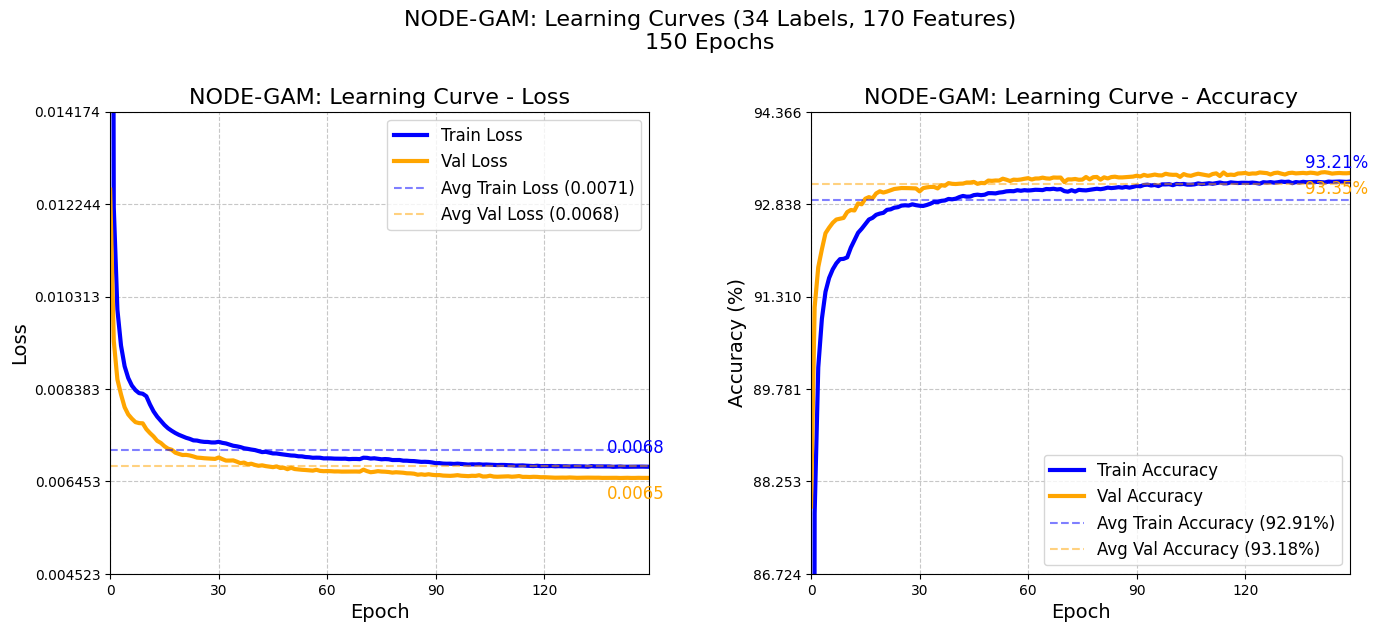

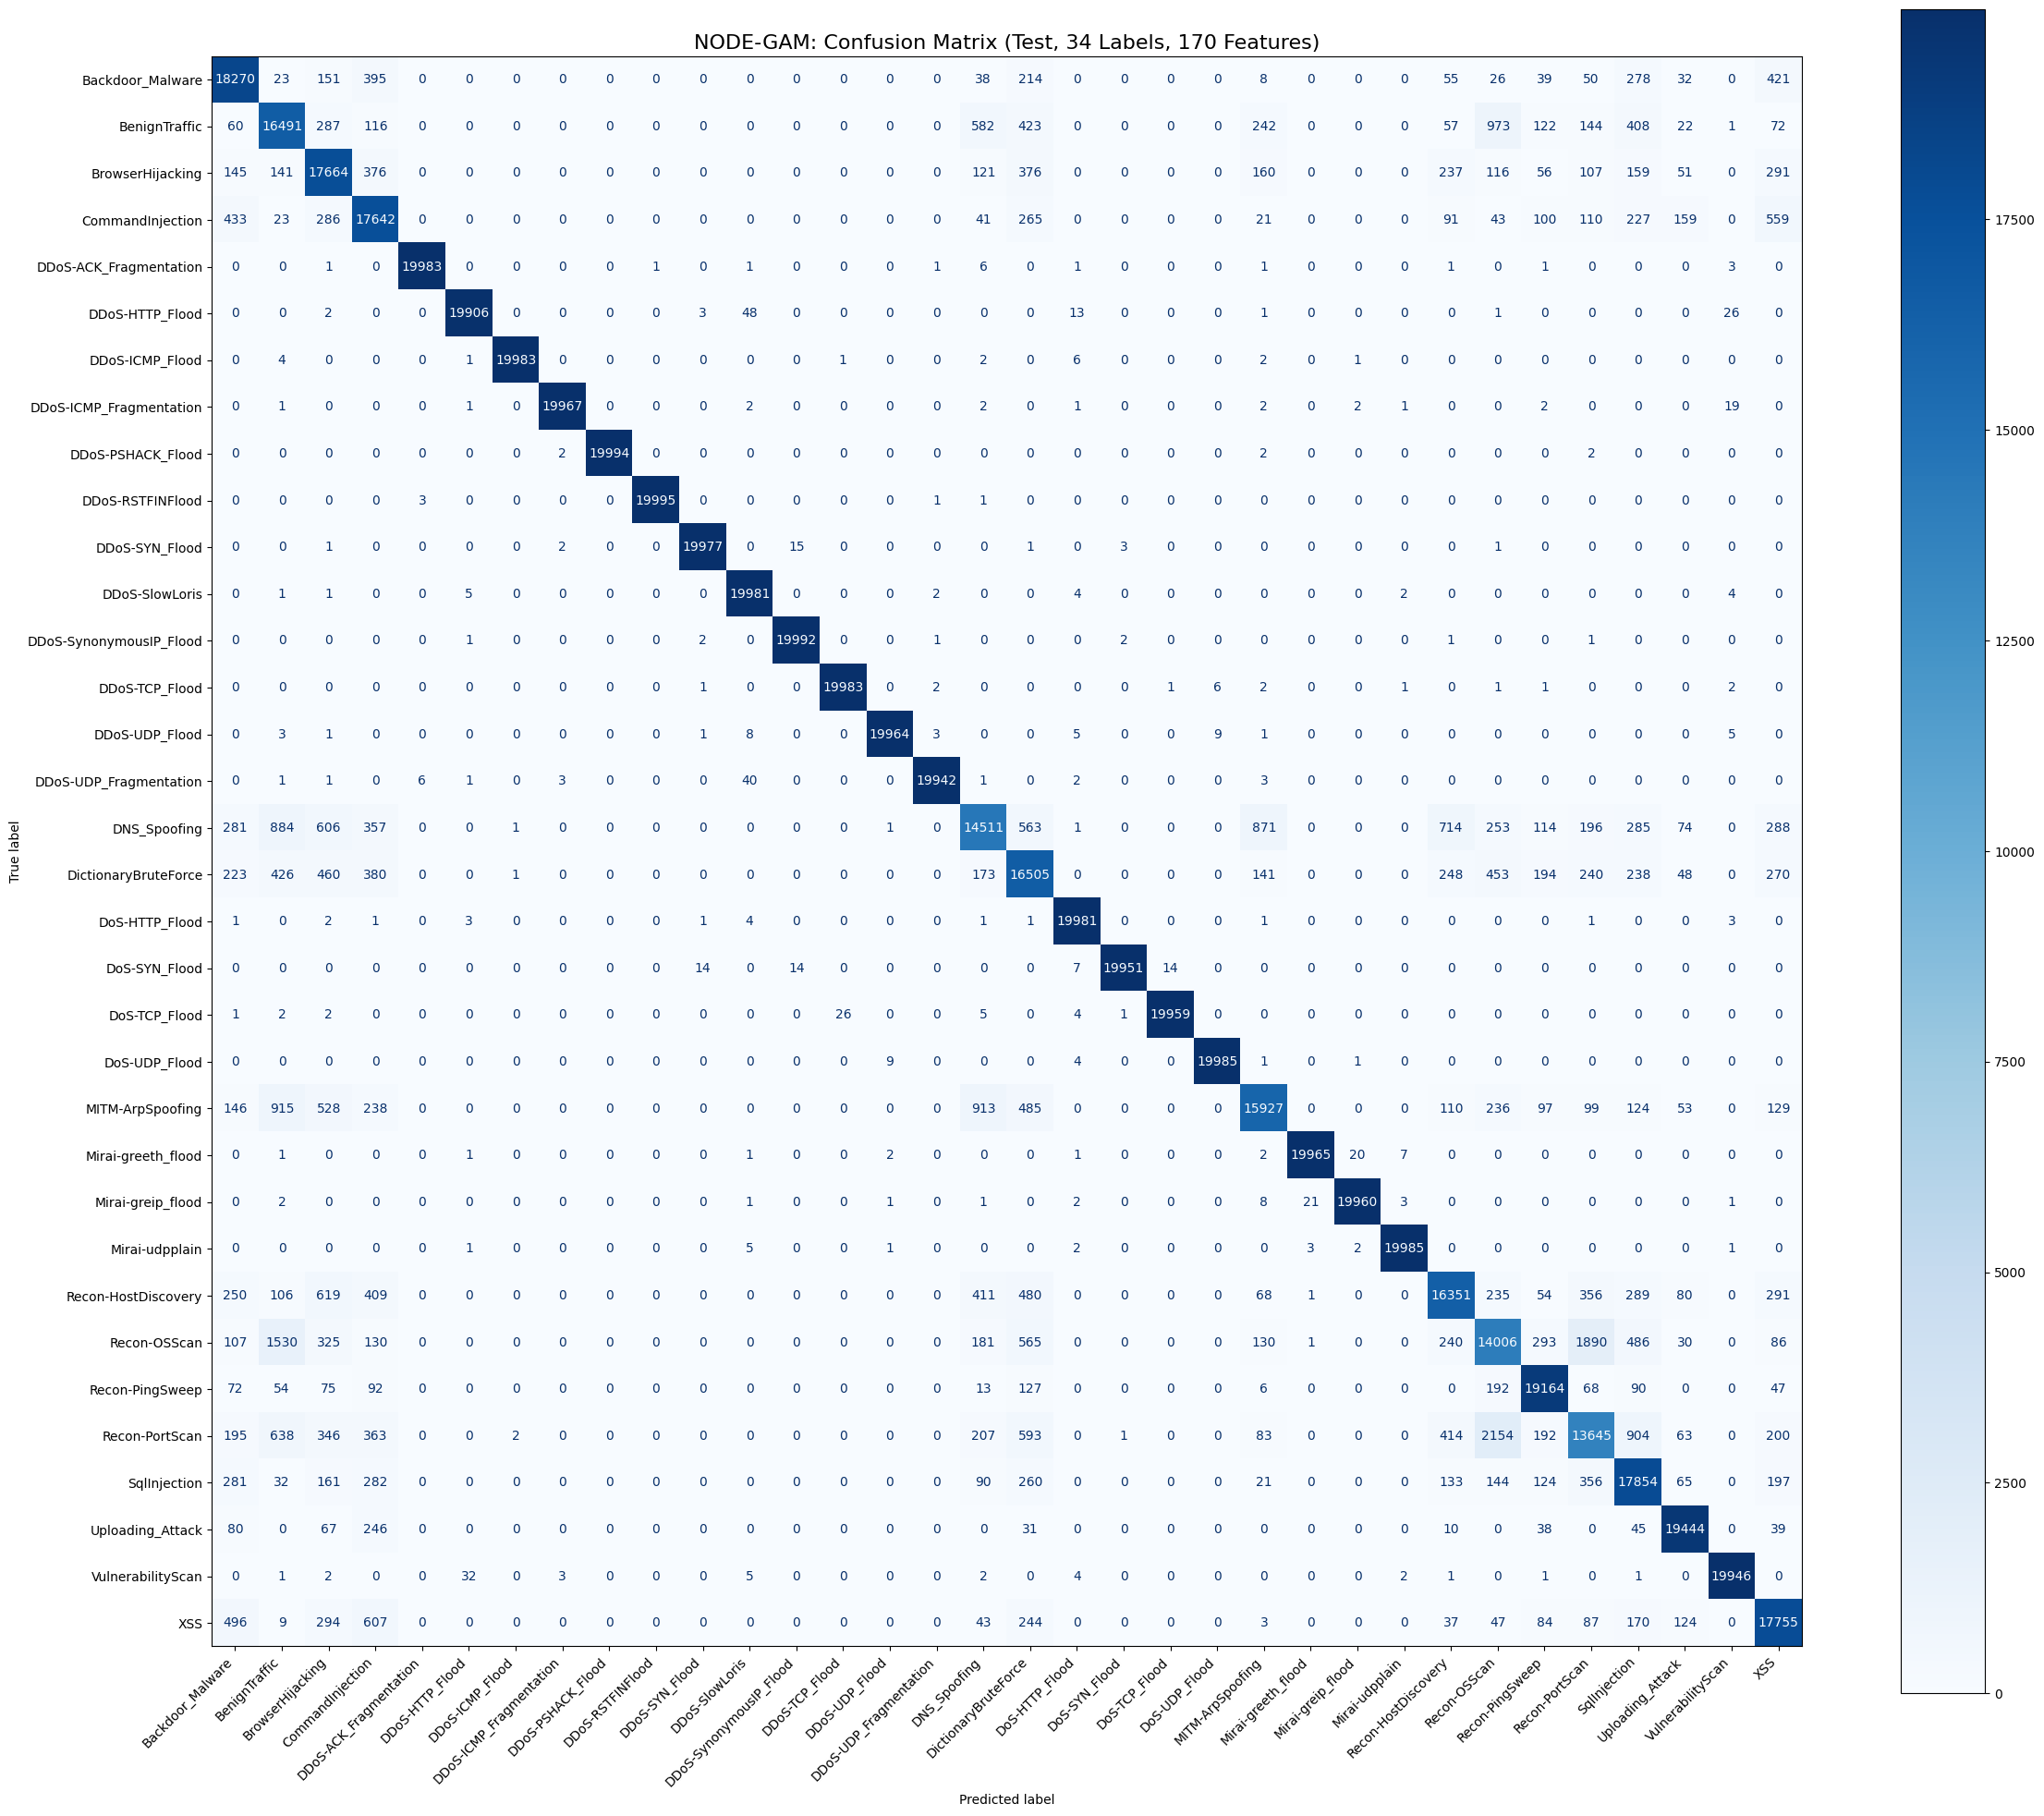

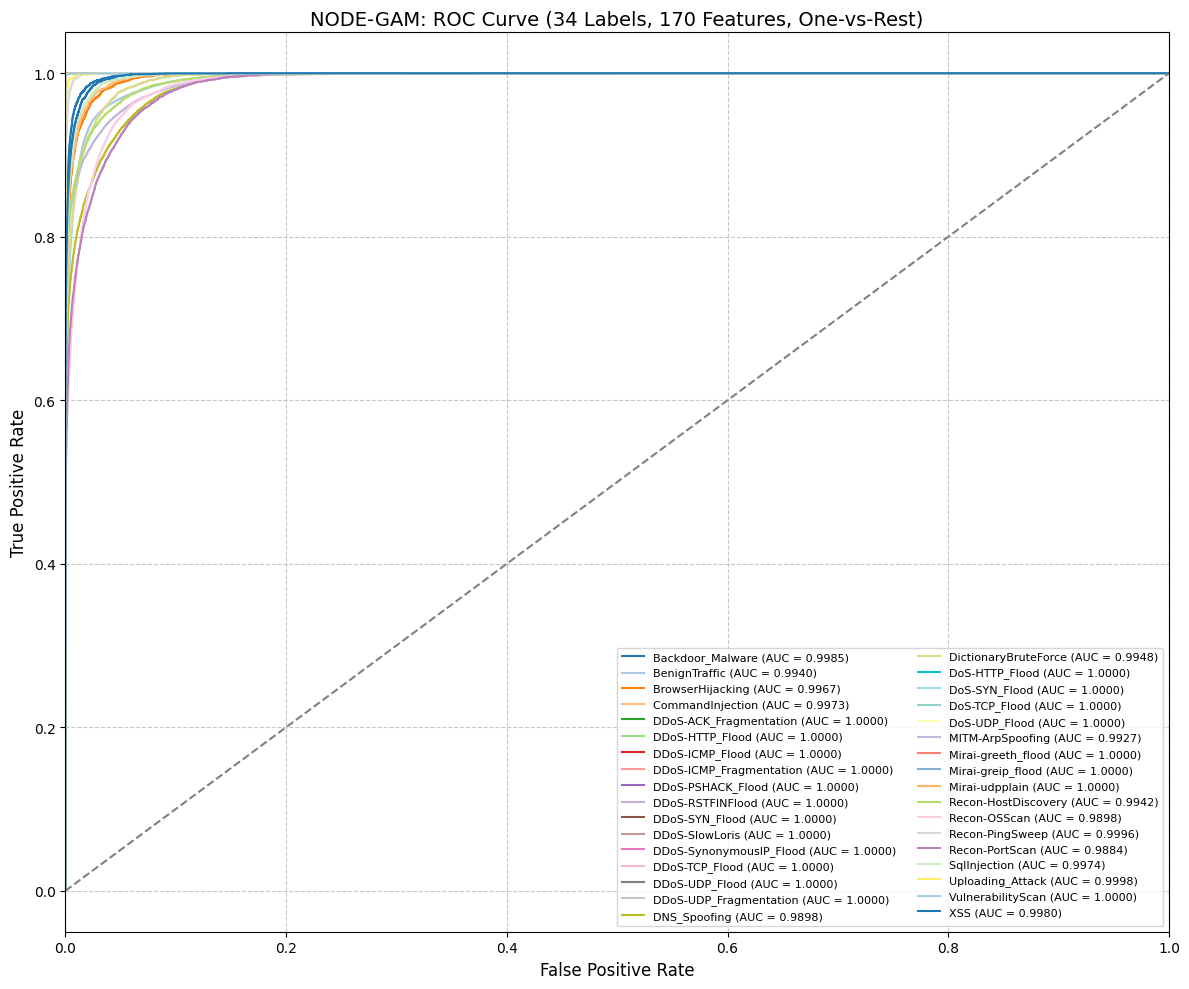

📈 NODE-GAM Macro-average ROC-AUC Score (34 Labels): 0.9980
Shape of test_features: (680000, 170)


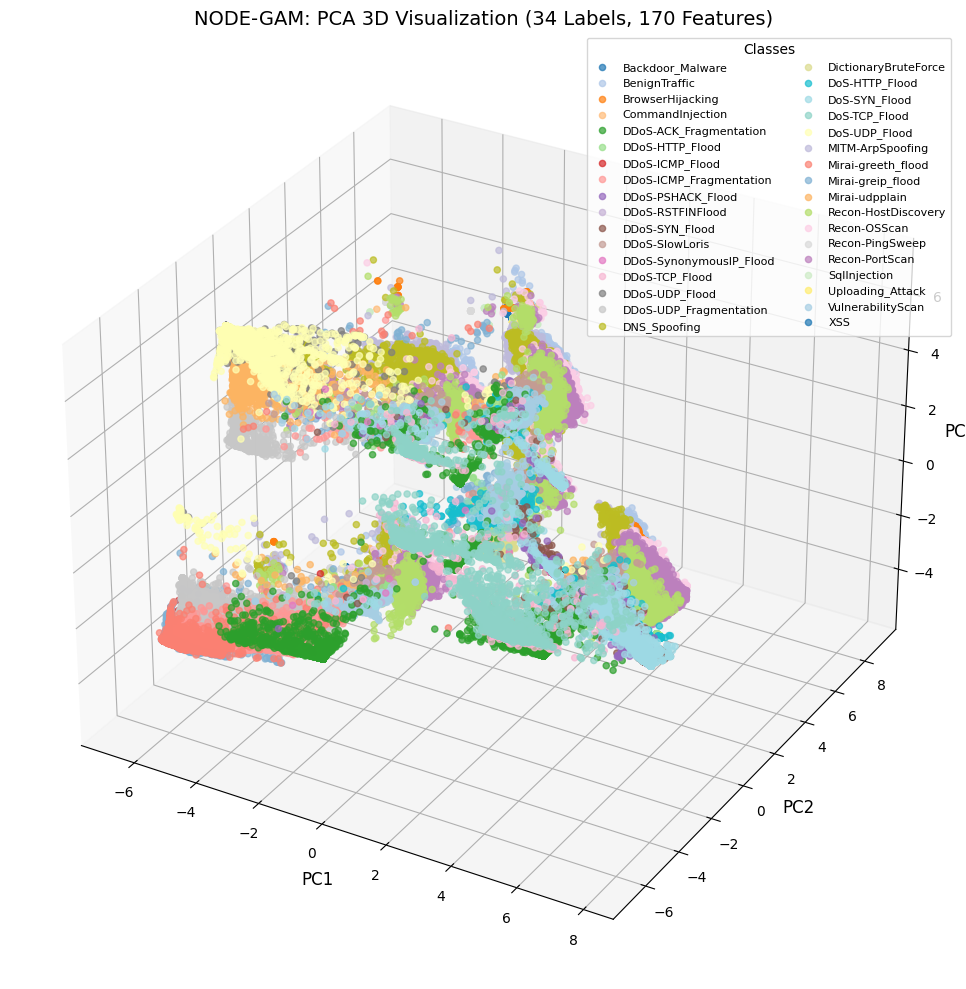

Shape of feature_importance: (170,)


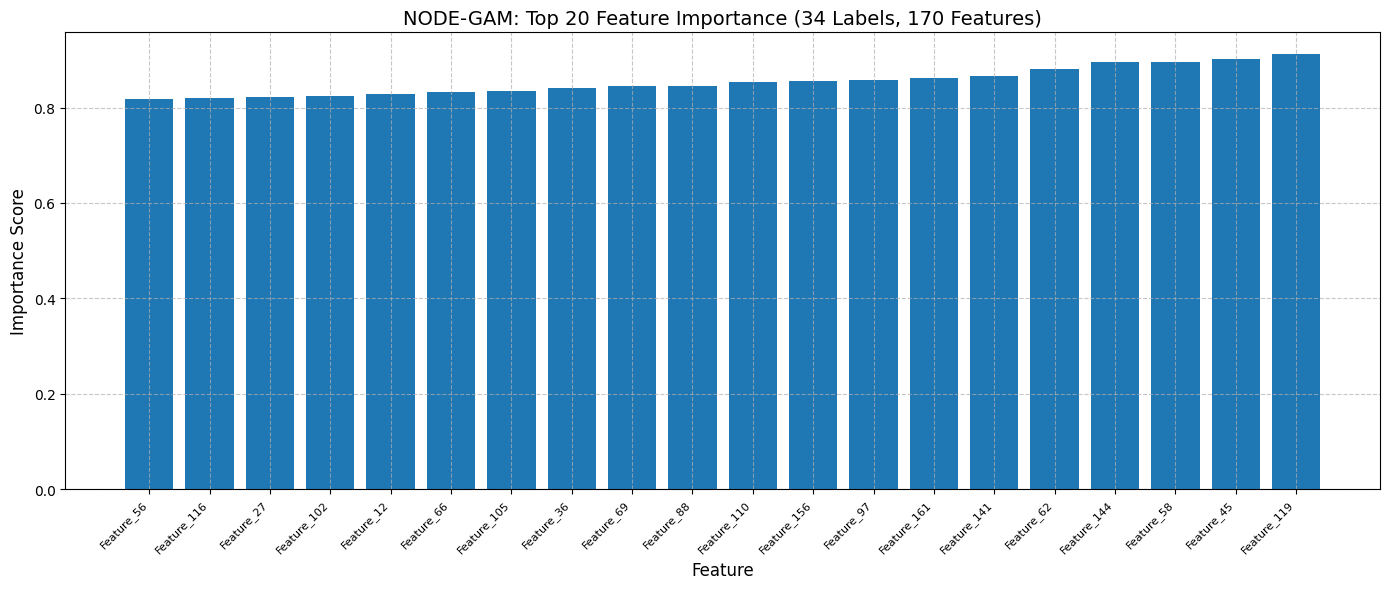

⏱️ NODE-GAM Thời gian huấn luyện trung bình mỗi epoch: 168.03 giây

📊 NODE-GAM Giá trị trung bình (150 epoch):
Train Loss trung bình: 0.0074
Val Loss trung bình: 0.0068
Train Accuracy trung bình: 92.66%
Val Accuracy trung bình: 93.14%


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors
import os

# Thư mục lưu dữ liệu
results_dir = "results"
output_dir = "processed_data"

# Ánh xạ nhãn cho bài toán 34 nhãn
label_map = {
    0: 'Backdoor_Malware',
    1: 'BenignTraffic',
    2: 'BrowserHijacking',
    3: 'CommandInjection',
    4: 'DDoS-ACK_Fragmentation',
    5: 'DDoS-HTTP_Flood',
    6: 'DDoS-ICMP_Flood',
    7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-PSHACK_Flood',
    9: 'DDoS-RSTFINFlood',
    10: 'DDoS-SYN_Flood',
    11: 'DDoS-SlowLoris',
    12: 'DDoS-SynonymousIP_Flood',
    13: 'DDoS-TCP_Flood',
    14: 'DDoS-UDP_Flood',
    15: 'DDoS-UDP_Fragmentation',
    16: 'DNS_Spoofing',
    17: 'DictionaryBruteForce',
    18: 'DoS-HTTP_Flood',
    19: 'DoS-SYN_Flood',
    20: 'DoS-TCP_Flood',
    21: 'DoS-UDP_Flood',
    22: 'MITM-ArpSpoofing',
    23: 'Mirai-greeth_flood',
    24: 'Mirai-greip_flood',
    25: 'Mirai-udpplain',
    26: 'Recon-HostDiscovery',
    27: 'Recon-OSScan',
    28: 'Recon-PingSweep',
    29: 'Recon-PortScan',
    30: 'SqlInjection',
    31: 'Uploading_Attack',
    32: 'VulnerabilityScan',
    33: 'XSS'
}
class_names = [label_map[i] for i in range(len(label_map))]

# Tạo bảng màu với 34 màu khác nhau
colors = plt.cm.tab20(np.linspace(0, 1, 20))
colors2 = plt.cm.Set3(np.linspace(0, 1, 12))
colors3 = plt.cm.Paired(np.linspace(0, 1, 12))
colors_combined = np.vstack((colors[:20], colors2[:12], colors3[:2]))
colors_list = [mcolors.to_hex(color) for color in colors_combined]

# Tải dữ liệu
try:
    train_losses = np.load(f"{results_dir}/train_losses_34labels_170features_nodegam.npy")
    val_losses = np.load(f"{results_dir}/val_losses_34labels_170features_nodegam.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_34labels_170features_nodegam.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_34labels_170features_nodegam.npy")
    epoch_times = np.load(f"{results_dir}/epoch_times_34labels_170features_nodegam.npy")
    test_labels = np.load(f"{results_dir}/test_labels_34labels_170features_nodegam.npy")
    test_probs = np.load(f"{results_dir}/test_probs_34labels_170features_nodegam.npy")
    test_features = np.load(f"{results_dir}/test_features_34labels_170features_nodegam.npy")
    cm = np.load(f"{results_dir}/confusion_matrix_test_34labels_170features_nodegam.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_34labels_170features_nodegam.npy")
    print("✅ Đã tải dữ liệu cho NODE-GAM (34 nhãn, 170 đặc trưng)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape và giá trị
expected_epochs = 150
if train_losses.shape != (expected_epochs,) or val_losses.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_losses hoặc val_losses không đúng: {train_losses.shape}, {val_losses.shape}")
if train_accuracies.shape != (expected_epochs,) or val_accuracies.shape != (expected_epochs,):
    raise ValueError(f"Shape của train_accuracies hoặc val_accuracies không đúng: {train_accuracies.shape}, {val_accuracies.shape}")
if np.any(train_losses < 0) or np.any(val_losses < 0) or np.any(np.isnan(train_losses)) or np.any(np.isnan(val_losses)):
    raise ValueError("train_losses hoặc val_losses chứa giá trị âm hoặc NaN")
if np.any(train_accuracies < 0) or np.any(train_accuracies > 100) or np.any(val_accuracies < 0) or np.any(val_accuracies > 100):
    raise ValueError("train_accuracies hoặc val_accuracies chứa giá trị ngoài khoảng [0, 100]")
if test_probs.shape[1] != 34 or np.any(test_probs < 0) or np.any(test_probs > 1):
    raise ValueError(f"test_probs phải có shape (n_samples, 34) và giá trị trong [0, 1], nhưng có shape {test_probs.shape}")
if cm.shape != (34, 34):
    raise ValueError(f"Confusion matrix phải có shape (34, 34), nhưng có shape {cm.shape}")

# Kiểm tra số mẫu đồng bộ
n_samples = len(test_labels)
if test_features.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_features ({test_features.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_features = test_features[:n_samples]
if test_probs.shape[0] != n_samples:
    print(f"⚠️ Số mẫu trong test_probs ({test_probs.shape[0]}) không khớp với test_labels ({n_samples}). Cắt bớt để đồng bộ.")
    test_probs = test_probs[:n_samples]

# 1️⃣ & 2️⃣ Learning Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
epochs = np.arange(150)

# Loss
ax1.plot(epochs, train_losses, label="Train Loss", linestyle="-", color="blue", linewidth=3.0)
ax1.plot(epochs, val_losses, label="Val Loss", linestyle="-", color="orange", linewidth=3.0)
ax1.set_xlabel("Epoch", fontsize=14)
ax1.set_ylabel("Loss", fontsize=14)
ax1.set_title("NODE-GAM: Learning Curve - Loss", fontsize=16)
ax1.legend(loc="upper right", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.7)
ax1.set_xlim(0, 149)
ax1.set_xticks(np.arange(0, 150, 30))
loss_min = min(train_losses[1:].min(), val_losses[1:].min())
loss_max = max(train_losses[1:].max(), val_losses[1:].max())
ax1.set_ylim(loss_min - 0.002, loss_max + 0.002)
ax1.set_yticks(np.linspace(loss_min - 0.002, loss_max + 0.002, 6))
avg_train_loss = np.mean(train_losses[1:])
avg_val_loss = np.mean(val_losses[1:])
ax1.axhline(y=avg_train_loss, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Loss ({avg_train_loss:.4f})")
ax1.axhline(y=avg_val_loss, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Loss ({avg_val_loss:.4f})")
ax1.annotate(f"{train_losses[-1]:.4f}", (149, train_losses[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax1.annotate(f"{val_losses[-1]:.4f}", (149, val_losses[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)

# Accuracy
ax2.plot(epochs, train_accuracies, label="Train Accuracy", linestyle="-", color="blue", linewidth=3.0)
ax2.plot(epochs, val_accuracies, label="Val Accuracy", linestyle="-", color="orange", linewidth=3.0)
ax2.set_xlabel("Epoch", fontsize=14)
ax2.set_ylabel("Accuracy (%)", fontsize=14)
ax2.set_title("NODE-GAM: Learning Curve - Accuracy", fontsize=16)
ax2.legend(loc="lower right", fontsize=12)
ax2.grid(True, linestyle="--", alpha=0.7)
ax2.set_xlim(0, 149)
ax2.set_xticks(np.arange(0, 150, 30))
acc_min = min(train_accuracies[1:].min(), val_accuracies[1:].min())
acc_max = max(train_accuracies[1:].max(), val_accuracies[1:].max())
ax2.set_ylim(acc_min - 1, acc_max + 1)
ax2.set_yticks(np.linspace(acc_min - 1, acc_max + 1, 6))
avg_train_accuracy = np.mean(train_accuracies[1:])
avg_val_accuracy = np.mean(val_accuracies[1:])
ax2.axhline(y=avg_train_accuracy, color="blue", linestyle="--", alpha=0.5, label=f"Avg Train Accuracy ({avg_train_accuracy:.2f}%)")
ax2.axhline(y=avg_val_accuracy, color="orange", linestyle="--", alpha=0.5, label=f"Avg Val Accuracy ({avg_val_accuracy:.2f}%)")
ax2.annotate(f"{train_accuracies[-1]:.2f}%", (149, train_accuracies[-1]), textcoords="offset points", xytext=(-10, 10), ha="center", color="blue", fontsize=12)
ax2.annotate(f"{val_accuracies[-1]:.2f}%", (149, val_accuracies[-1]), textcoords="offset points", xytext=(-10, -15), ha="center", color="orange", fontsize=12)
ax2.legend(loc="lower right", fontsize=12)

plt.suptitle("NODE-GAM: Learning Curves (34 Labels, 170 Features)\n150 Epochs", fontsize=16, y=1.05)
plt.subplots_adjust(wspace=0.3)
plt.savefig(f"{results_dir}/learning_curves_nodegam_34labels_170features.png", bbox_inches="tight")
plt.show()

# 3️⃣ Confusion Matrix
fig, ax = plt.subplots(figsize=(24, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
for text in disp.text_.ravel():
    text.set_fontsize(10)
plt.title("NODE-GAM: Confusion Matrix (Test, 34 Labels, 170 Features)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(f"{results_dir}/confusion_matrix_nodegam_34labels_170features.png")
plt.show()

# 4️⃣ ROC-AUC
plt.figure(figsize=(12, 10))
for i in range(34):
    binary_labels = (test_labels == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_labels, test_probs[:, i])
    roc_auc = roc_auc_score(binary_labels, test_probs[:, i])
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.4f})", color=colors_list[i])
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("NODE-GAM: ROC Curve (34 Labels, 170 Features, One-vs-Rest)", fontsize=14)
plt.legend(loc="lower right", fontsize=8, ncol=2)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig(f"{results_dir}/roc_curve_nodegam_34labels_170features.png", bbox_inches="tight")
plt.show()

macro_roc_auc = roc_auc_score(test_labels, test_probs, average="macro", multi_class="ovr")
print(f"📈 NODE-GAM Macro-average ROC-AUC Score (34 Labels): {macro_roc_auc:.4f}")

# 5️⃣ PCA 3D
print(f"Shape of test_features: {test_features.shape}")
n_samples, n_features = test_features.shape

if n_samples < 3:
    print(f"Warning: Only {n_samples} samples available. Skipping PCA 3D.")
else:
    pca = PCA(n_components=3)
    try:
        pca_result = pca.fit_transform(test_features)
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        for label in range(34):
            idx = test_labels == label
            ax.scatter(pca_result[idx, 0], pca_result[idx, 1], pca_result[idx, 2], 
                       label=label_map[label], alpha=0.7, color=colors_list[label])
        ax.set_xlabel("PC1", fontsize=12)
        ax.set_ylabel("PC2", fontsize=12)
        ax.set_zlabel("PC3", fontsize=12)
        ax.set_title("NODE-GAM: PCA 3D Visualization (34 Labels, 170 Features)", fontsize=14)
        ax.legend(title="Classes", loc="best", fontsize=8, ncol=2)
        plt.tight_layout()
        plt.savefig(f"{results_dir}/pca_3d_nodegam_34labels_170features.png")
        plt.show()
    except ValueError as e:
        print(f"PCA failed: {e}")
        print("Consider increasing the number of samples or features.")

# 6️⃣ Feature Importance
print(f"Shape of feature_importance: {feature_importance.shape}")
if len(feature_importance.shape) == 2:
    avg_importance = np.mean(feature_importance, axis=0)
else:
    avg_importance = feature_importance

input_dim = 170
selected_features = [f"Feature_{i+1}" for i in range(170)]
feature_labels = selected_features

top_k = 20
top_indices = np.argsort(avg_importance)[-top_k:]
top_importance = avg_importance[top_indices]
top_labels = [feature_labels[i] for i in top_indices]

plt.figure(figsize=(14, 6))
plt.bar(range(len(top_importance)), top_importance, tick_label=top_labels)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("NODE-GAM: Top 20 Feature Importance (34 Labels, 170 Features)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(f"{results_dir}/feature_importance_nodegam_34labels_170features.png")
plt.show()

# 7️⃣ Thời gian huấn luyện
avg_time = np.mean(epoch_times)
print(f"⏱️ NODE-GAM Thời gian huấn luyện trung bình mỗi epoch: {avg_time:.2f} giây")

# 8️⃣ Giá trị trung bình
avg_train_loss = np.mean(train_losses)
avg_val_loss = np.mean(val_losses)
avg_train_accuracy = np.mean(train_accuracies)
avg_val_accuracy = np.mean(val_accuracies)

print("\n📊 NODE-GAM Giá trị trung bình (150 epoch):")
print(f"Train Loss trung bình: {avg_train_loss:.4f}")
print(f"Val Loss trung bình: {avg_val_loss:.4f}")
print(f"Train Accuracy trung bình: {avg_train_accuracy:.2f}%")
print(f"Val Accuracy trung bình: {avg_val_accuracy:.2f}%")

# **CODE TẢI KẾT QUẢ**

In [12]:
import os
import zipfile
from IPython.display import FileLink

# Đường dẫn đến các thư mục
processed_data_dir = "/kaggle/working/processed_data"
results_dir = "/kaggle/working/results"

# Tạo file ZIP cho thư mục processed_data
# processed_zip = "/kaggle/working/processed_data.zip"
# with zipfile.ZipFile(processed_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
#     for root, dirs, files in os.walk(processed_data_dir):
#         for file in files:
#             file_path = os.path.join(root, file)
#             # Thêm file vào ZIP với đường dẫn tương đối
#             zipf.write(file_path, os.path.relpath(file_path, "/kaggle/working"))

# Tạo file ZIP cho thư mục results
results_zip = "/kaggle/working/results.zip"
with zipfile.ZipFile(results_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(results_dir):
        for file in files:
            file_path = os.path.join(root, file)
            # Thêm file vào ZIP với đường dẫn tương đối
            zipf.write(file_path, os.path.relpath(file_path, "/kaggle/working"))

# Hiển thị liên kết tải xuống
# print("Tải xuống processed_data.zip:")
# display(FileLink("processed_data.zip"))

print("Tải xuống results.zip:")
display(FileLink("results.zip"))

Tải xuống results.zip:


/kaggle/working/results.zip